In [46]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Load the data
df = pd.read_csv('DL_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [48]:
print(df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [49]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
50   49ers  2020       DL         6.755802       1402.398565        39.0   
70   49ers  2021       DL        18.465753        741.861341        34.0   
123  49ers  2022       DL        19.298751        752.319057        51.0   
12   Bears  2019       DL        12.348565         83.494332        29.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%      0.812500    0.216  ...   
50     60.632050      5.40%      0.375000    0.025  ...   
70     70.883348     19.50%      0.588235    0.081  ...   
123    64.292499     27.60%      0.764706    0.196  ...   
12     68.035738     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
50                       353.500695       

In [50]:
team_data = df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x31af485d0>>


In [51]:
import numpy as np

sequences = []
targets = []
teams = []

# Iterate over each team and its respective data
for team, group in team_data:
    teams.append(team)
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['win-loss-pct', 'Value_cap_space', 'weighted_avg_total_pressures', 'weighted_avg_hurries', 'weighted_avg_grades_pass_rush_defense', 
                'Current_AV', 'weighted_avg_sacks', 'weighted_avg_snap_counts_pass_rush']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [52]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[8.12500000e-01 1.59032944e+01 4.17954217e+01 2.83387952e+01
   7.08843373e+01 5.30000000e+01 6.44722892e+00 3.55822410e+02]
  [3.75000000e-01 6.75580222e+00 2.44880019e+01 1.72625327e+01
   6.10913994e+01 3.90000000e+01 3.32881920e+00 2.97716322e+02]
  [5.88235294e-01 1.84657534e+01 3.71651943e+01 2.46322880e+01
   7.38876988e+01 3.40000000e+01 6.31515018e+00 3.36845186e+02]]

 [[5.00000000e-01 1.23485654e+01 3.01658302e+01 2.13287327e+01
   6.45789837e+01 2.90000000e+01 3.68925136e+00 3.25060017e+02]
  [5.00000000e-01 1.11705348e+01 3.13790340e+01 2.11560852e+01
   7.13628981e+01 1.80000000e+01 4.36975322e+00 3.16013710e+02]
  [3.52941176e-01 2.09917808e+01 2.27491266e+01 1.37853712e+01
   6.68228821e+01 2.20000000e+01 5.94737991e+00 2.39416812e+02]]

 [[1.25000000e-01 1.52231668e+01 3.54996676e+01 2.38967427e+01
   6.65152670e+01 3.90000000e+01 5.03922003e+00 3.26440727e+02]
  [2.50000000e-01 4.15741675e+00 2.06452387e+01 1.26749820e+01
   6.14210842e+01 3.70000000e+01 1.74574238e

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [55]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.1315 - val_loss: 0.0100
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0779 - val_loss: 0.0040
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0781 - val_loss: 0.0246
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0434 - val_loss: 0.0371
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0463 - val_loss: 0.0169
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0316 - val_loss: 0.0030
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0194 - val_loss: 0.0031
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0286 - val_loss: 0.0033
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0143 - val_loss: 0.0041
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - val_loss: 0.0047
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - val_loss: 0.0065
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149 - val_loss: 0.0082
Epoch 13/50
2

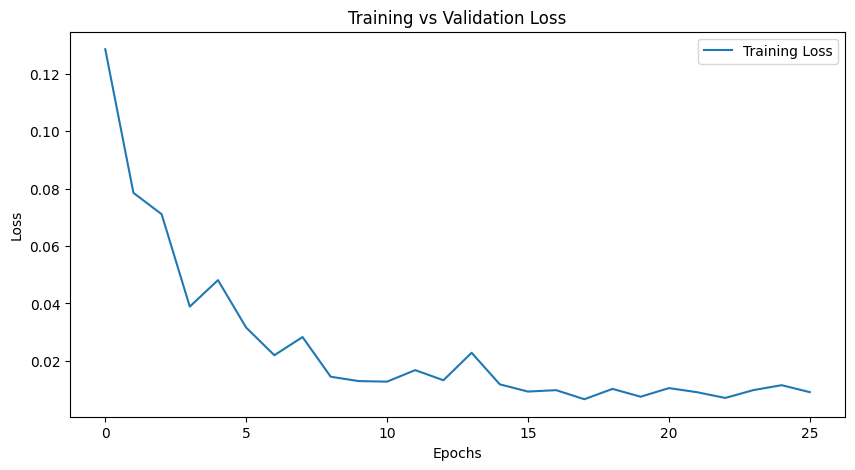

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
32
R² Score: -0.3302


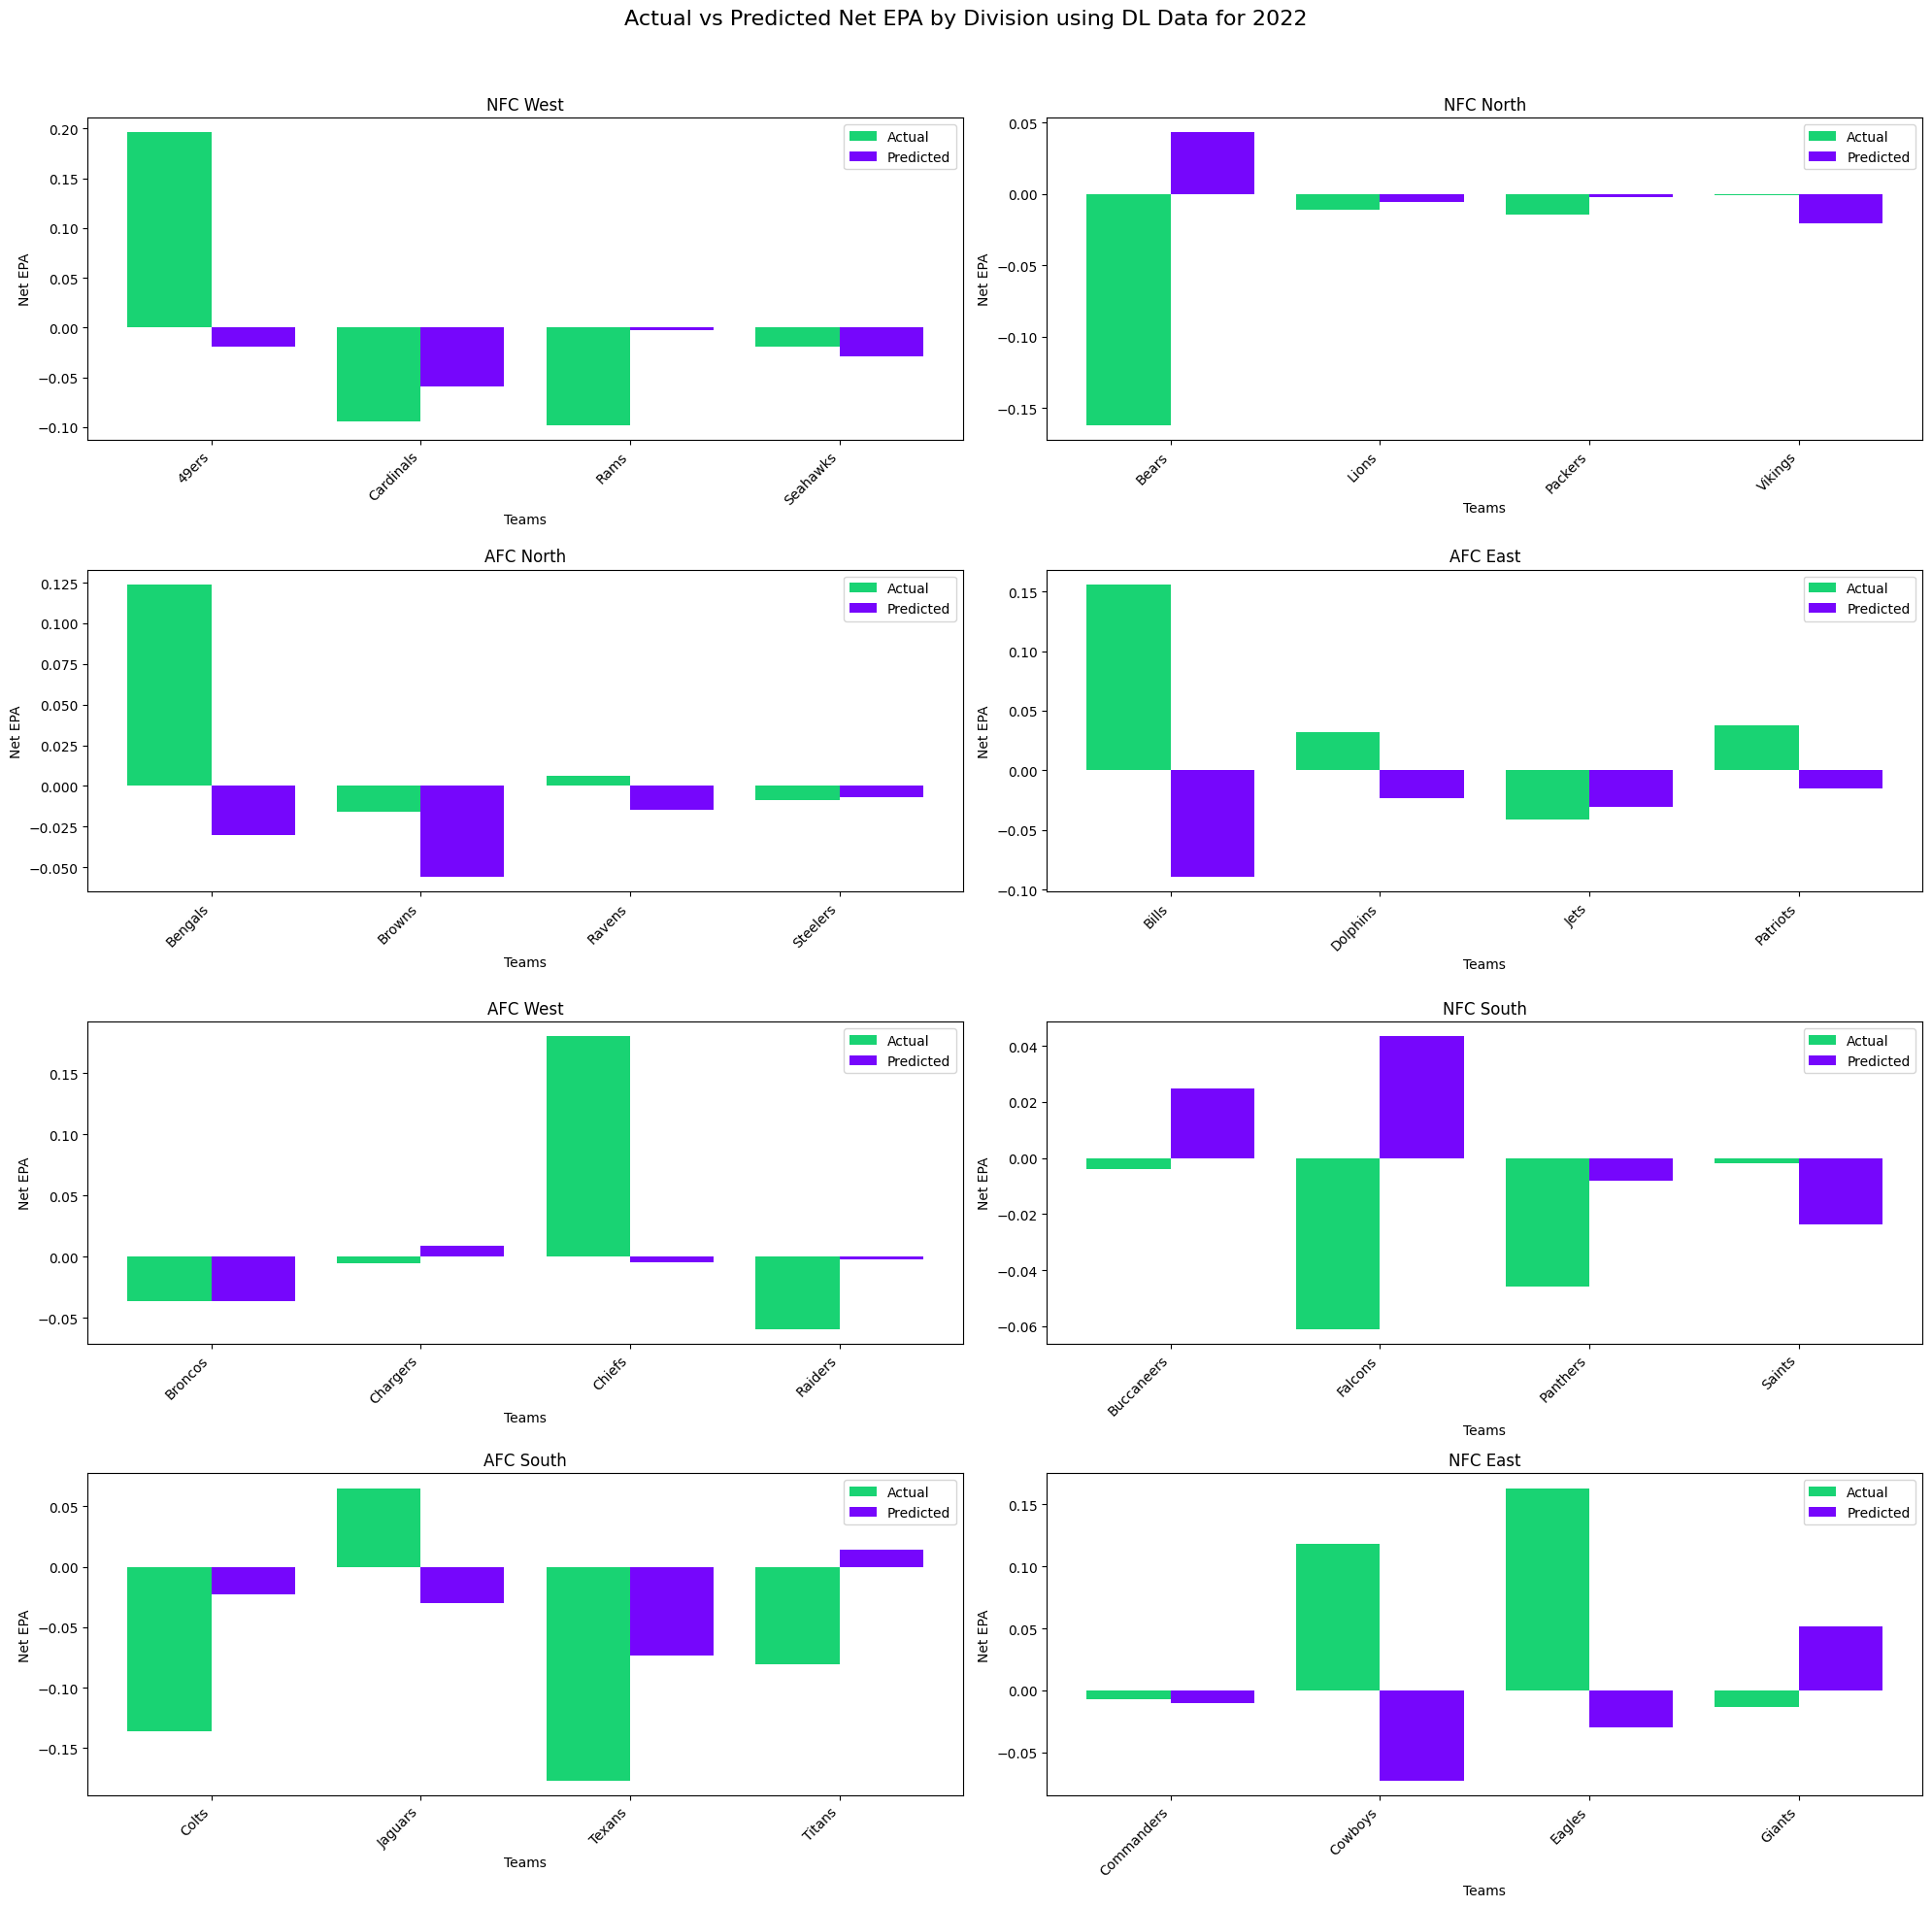

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0281 - val_loss: 0.0046
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0236 - val_loss: 0.0105
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0209 - val_loss: 0.0130
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170 - val_loss: 0.0070
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - val_loss: 0.0058
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0187 - val_loss: 0.0058
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136 - val_loss: 0.0070
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0084 - val_loss: 0.0045
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145 - val_loss: 0.0040
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - val_loss: 0.0087
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - val_loss: 0.0146
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - val_loss: 0.009

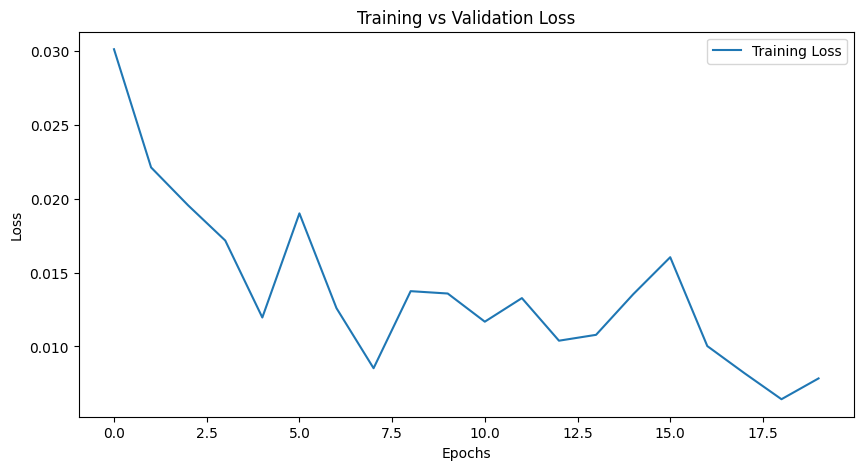

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.2803


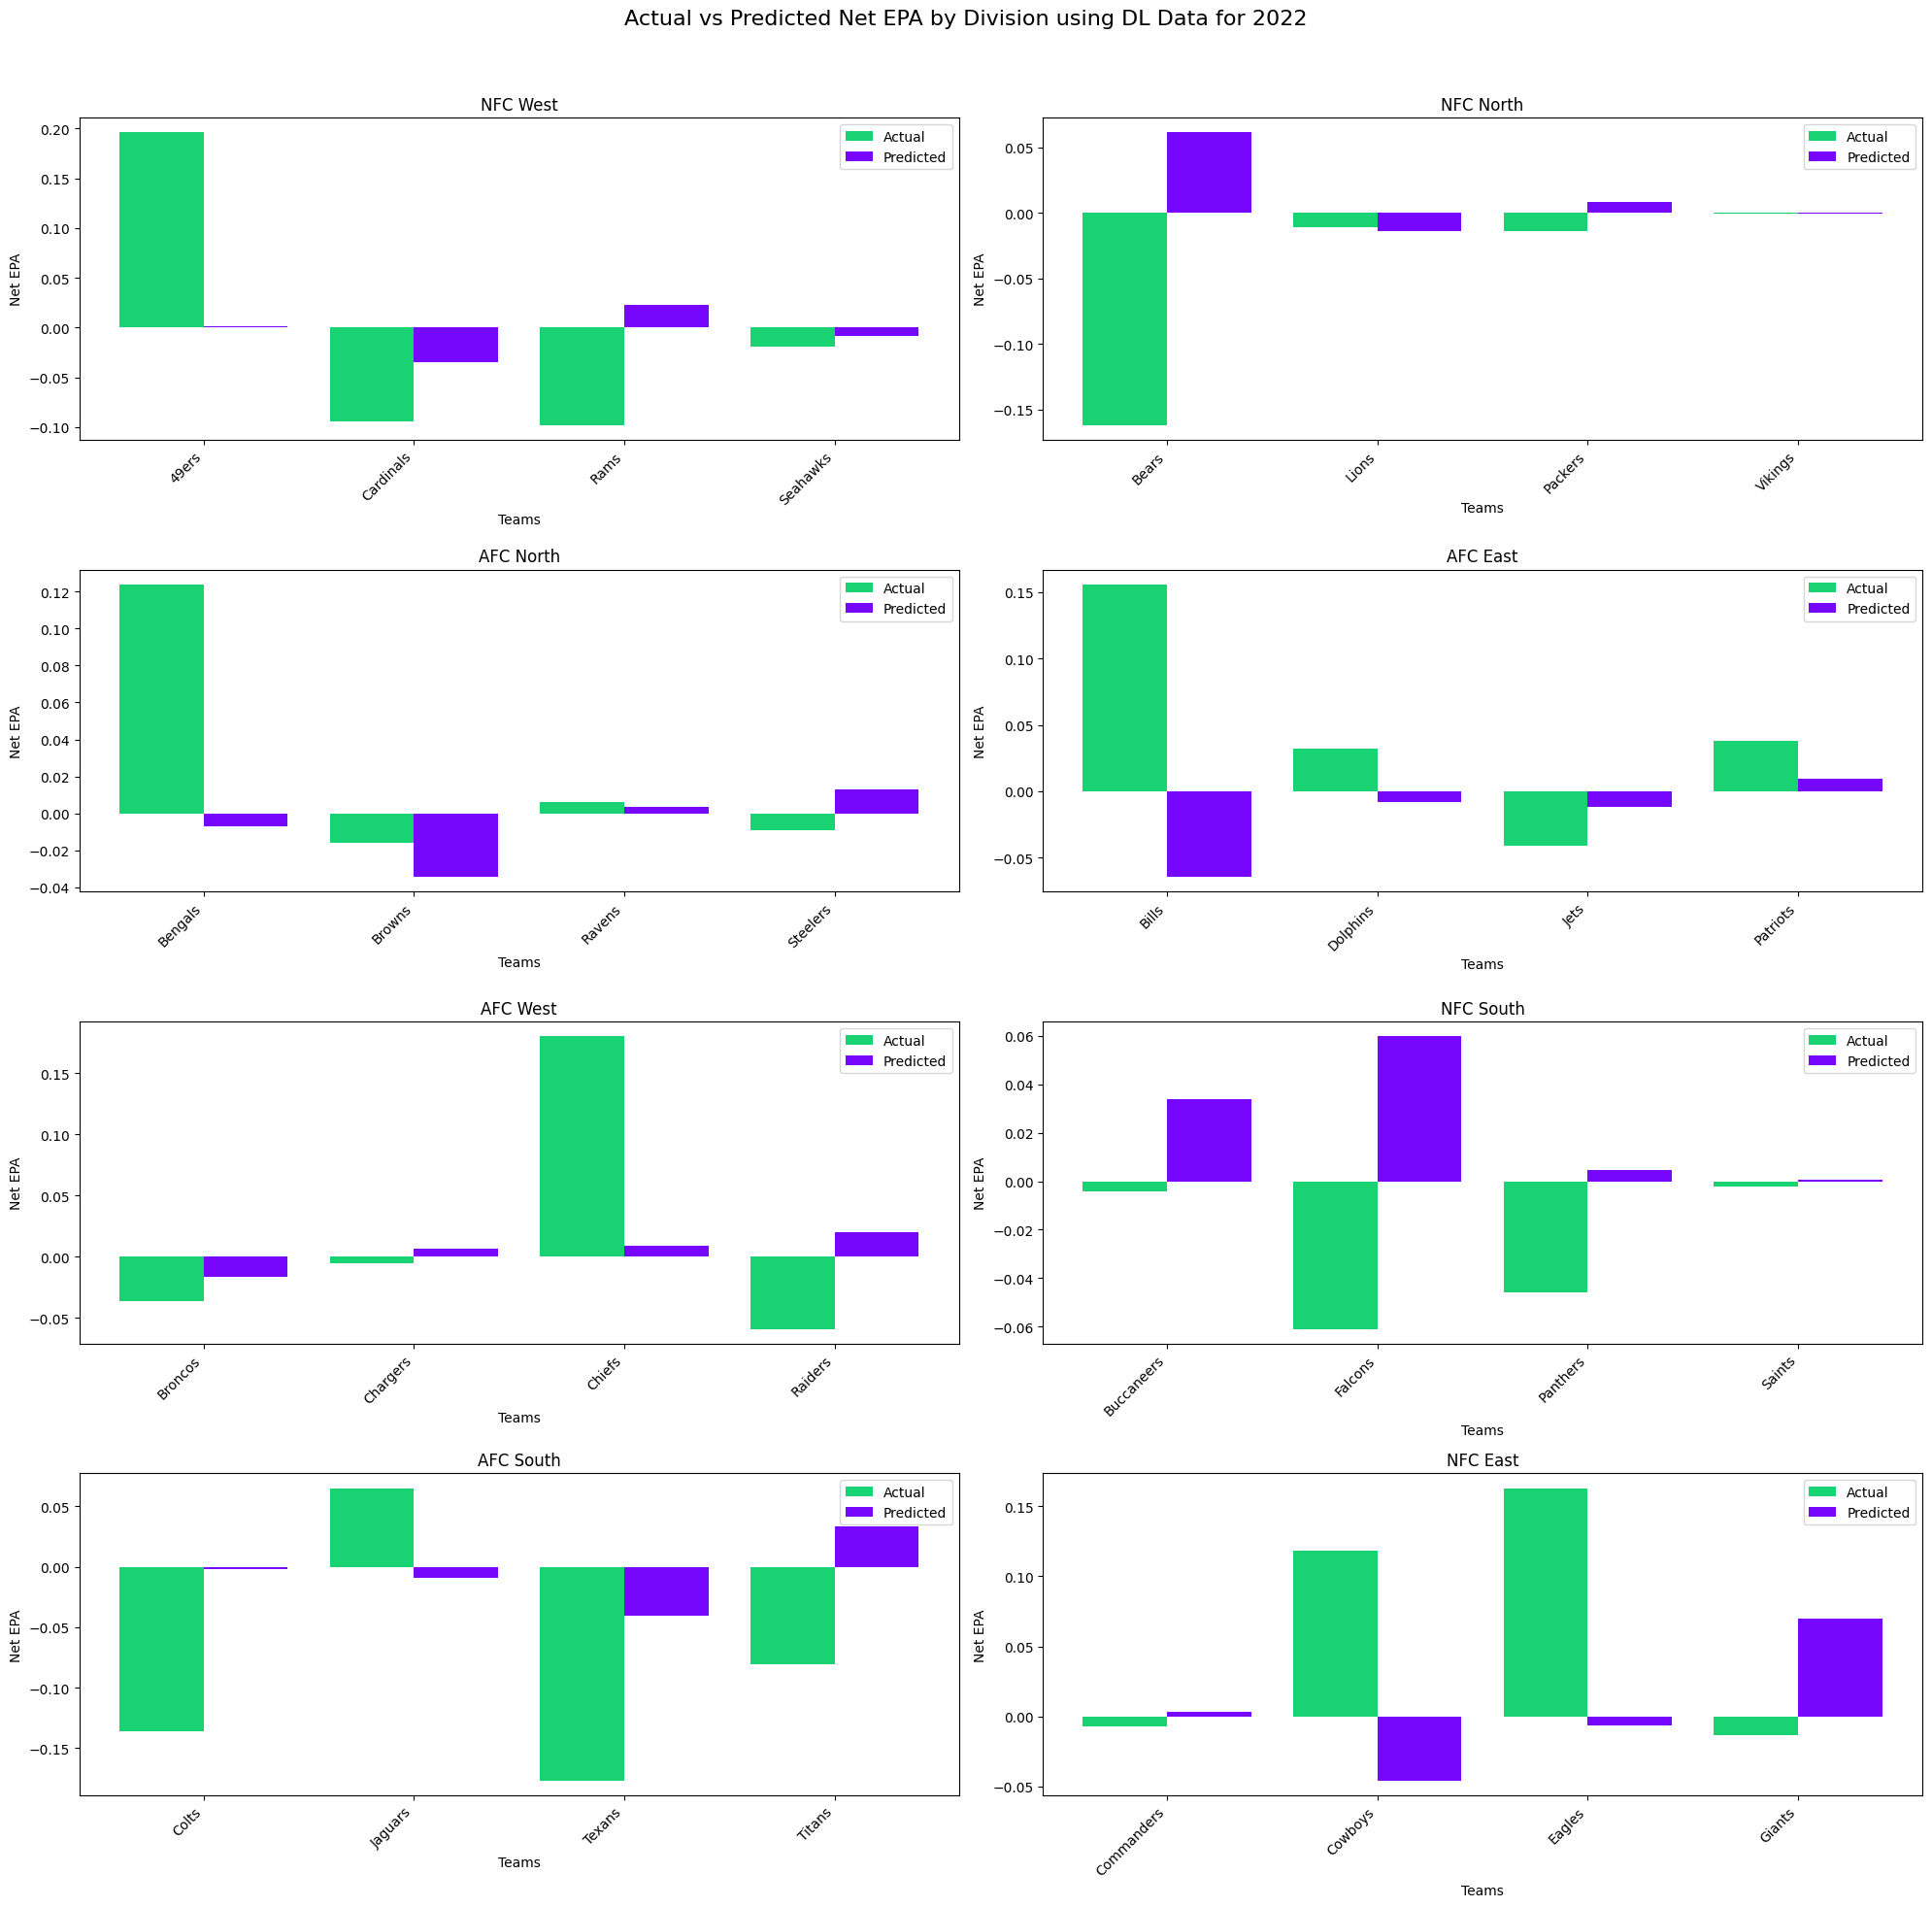

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0337 - val_loss: 0.0039
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0181 - val_loss: 0.0056
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158 - val_loss: 0.0092
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0086
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0193 - val_loss: 0.0064
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - val_loss: 0.0041
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - val_loss: 0.0044
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114 - val_loss: 0.0131
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - val_loss: 0.0109
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - val_loss: 0.0044
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - val_loss: 0.004

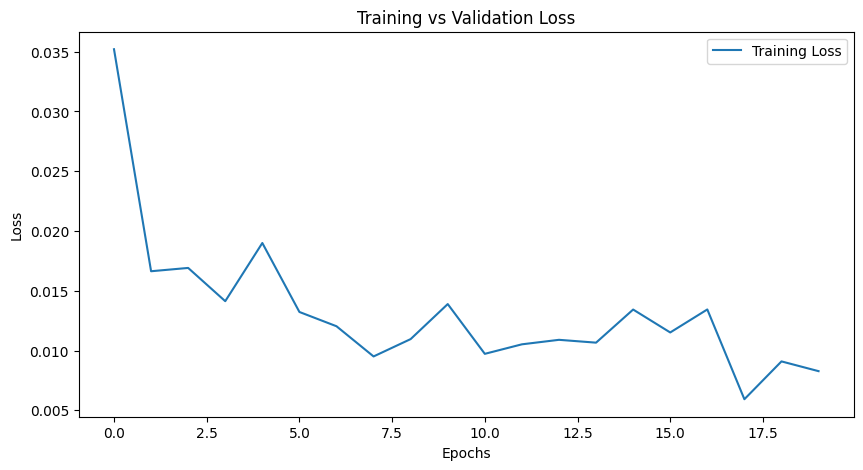

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: -0.1953


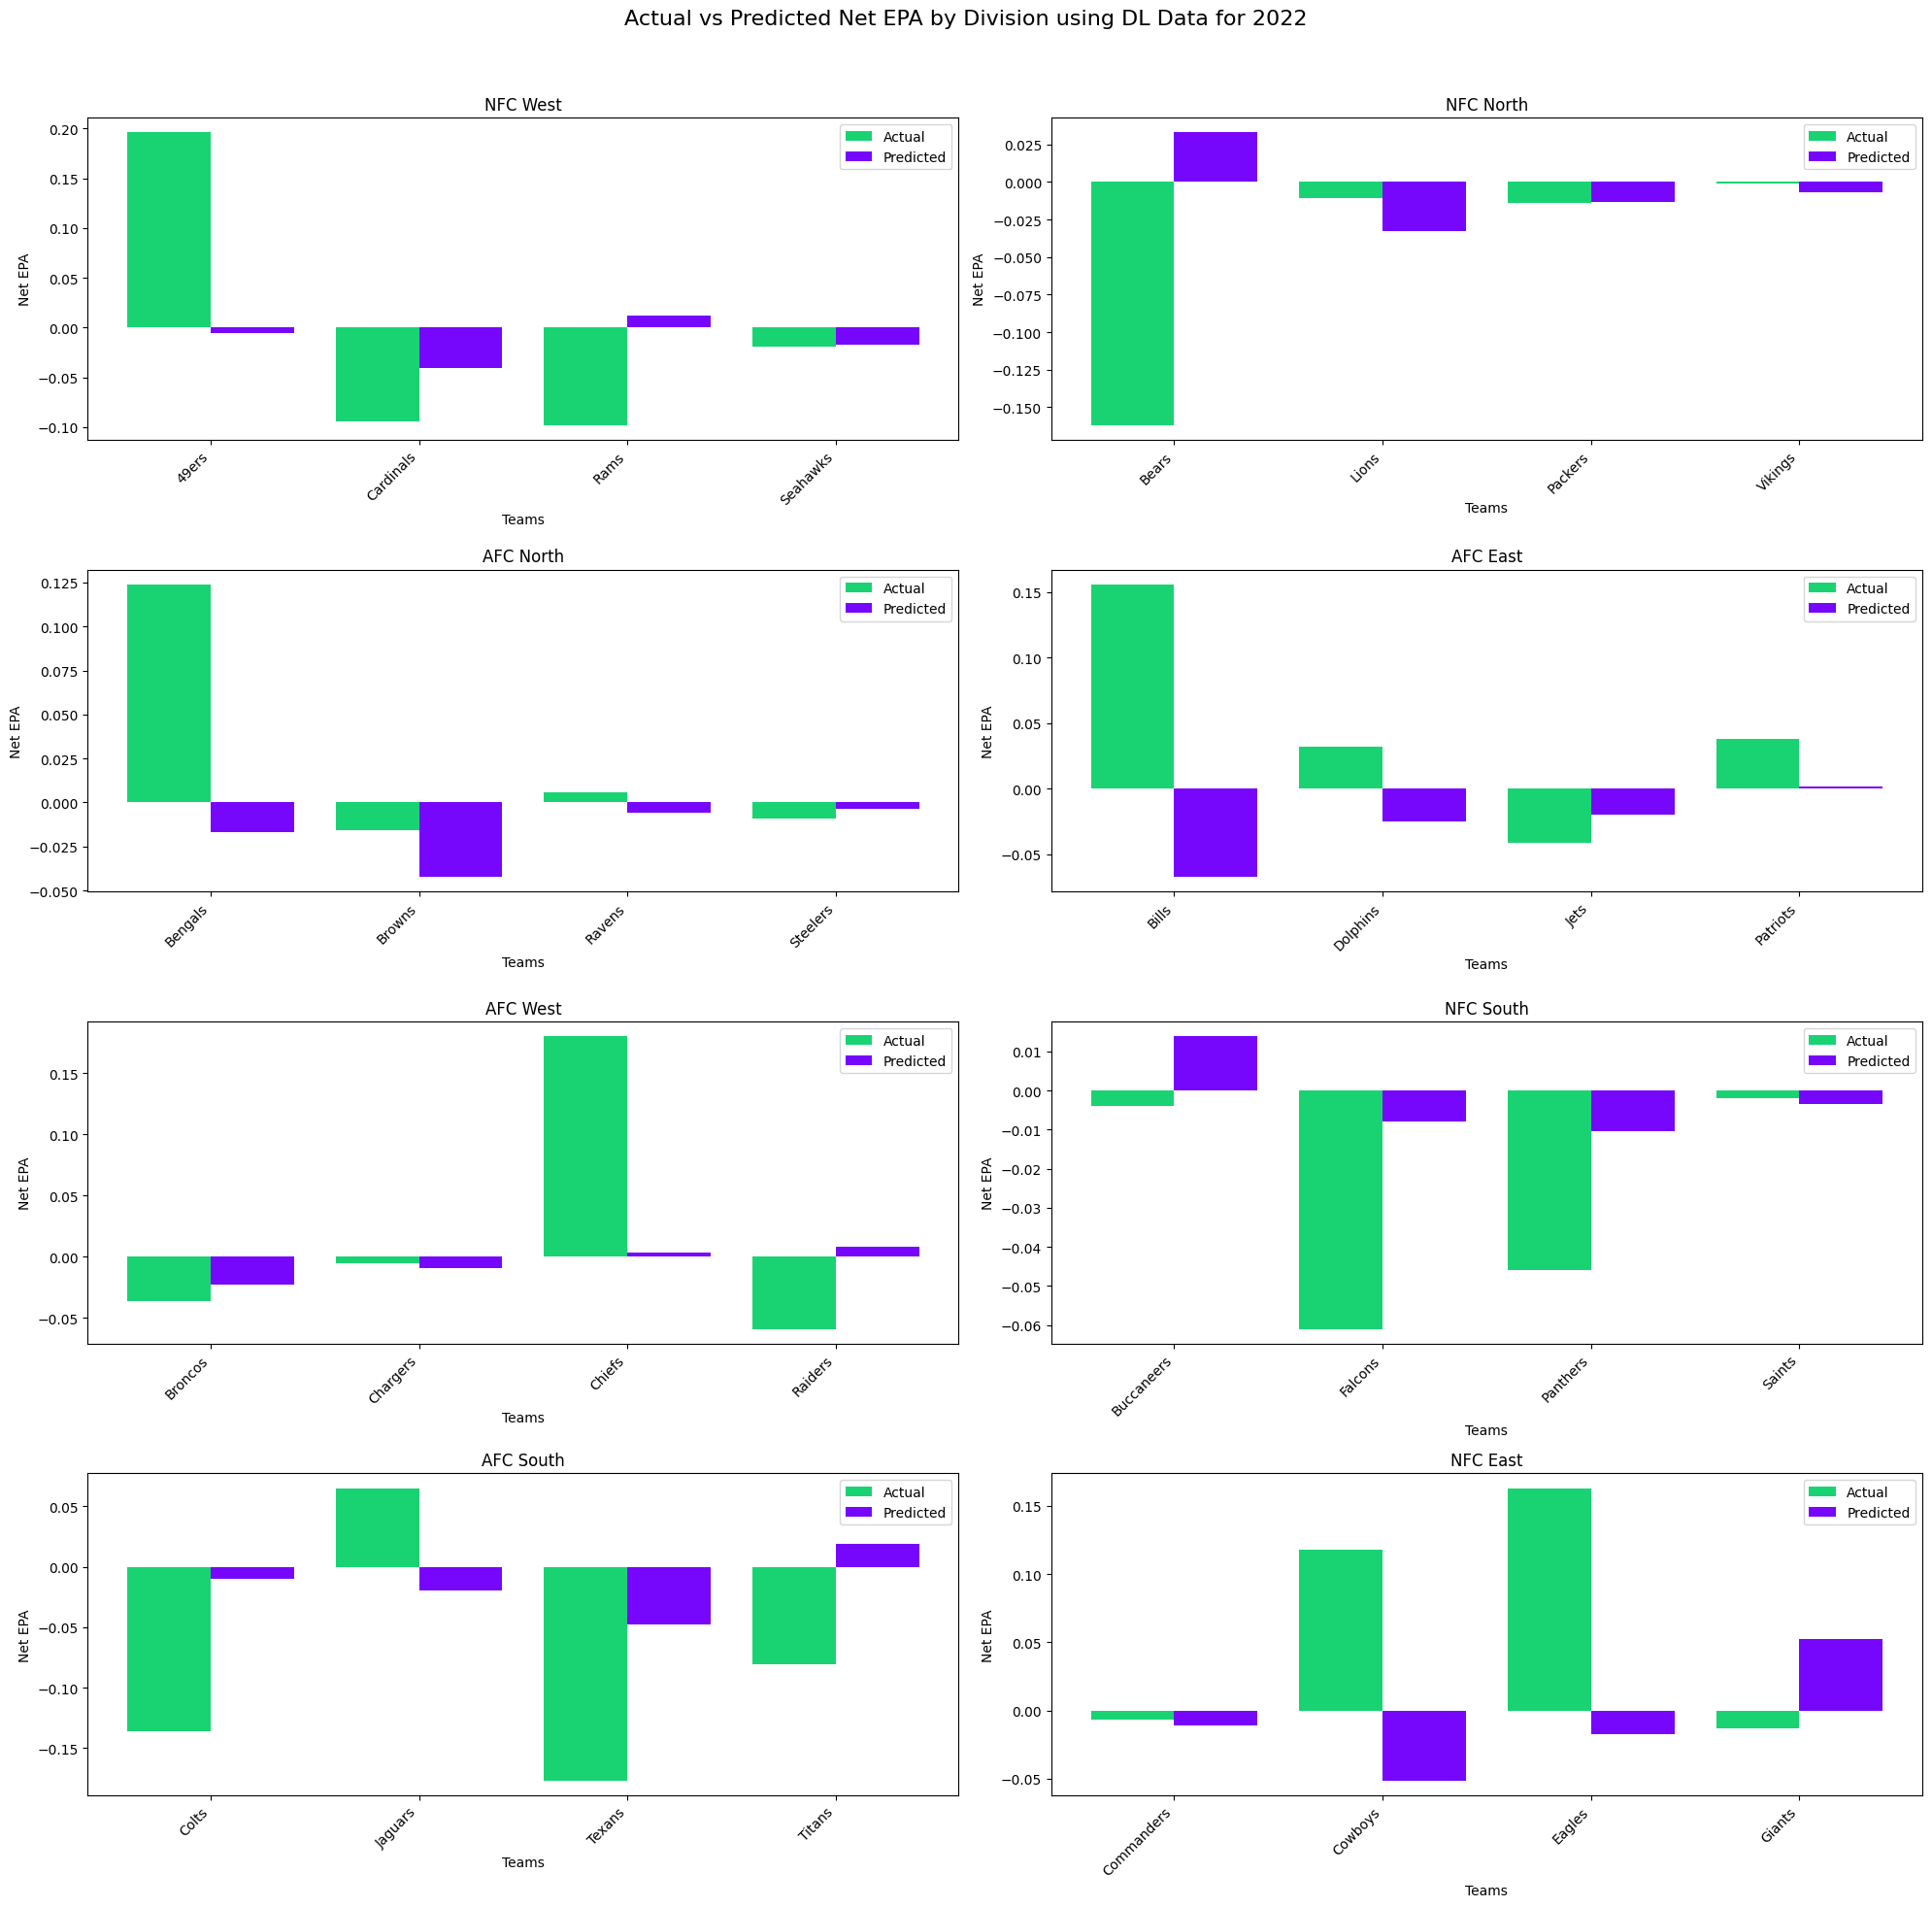

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0221 - val_loss: 0.0048
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0240 - val_loss: 0.0065
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - val_loss: 0.0120
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0191 - val_loss: 0.0082
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0055
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - val_loss: 0.0049
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - val_loss: 0.0050
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - val_loss: 0.0055
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - val_loss: 0.0066
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - val_loss: 0.0084
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - val_loss: 0.0098
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0121 - val_loss: 0.00

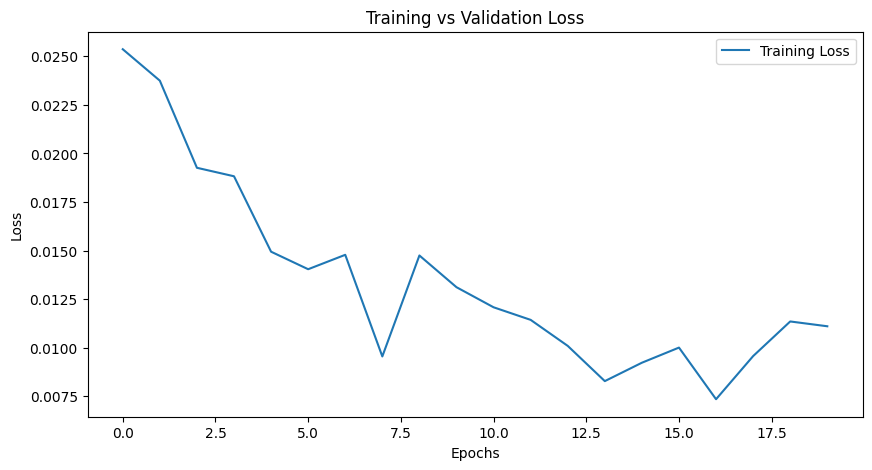

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.1112


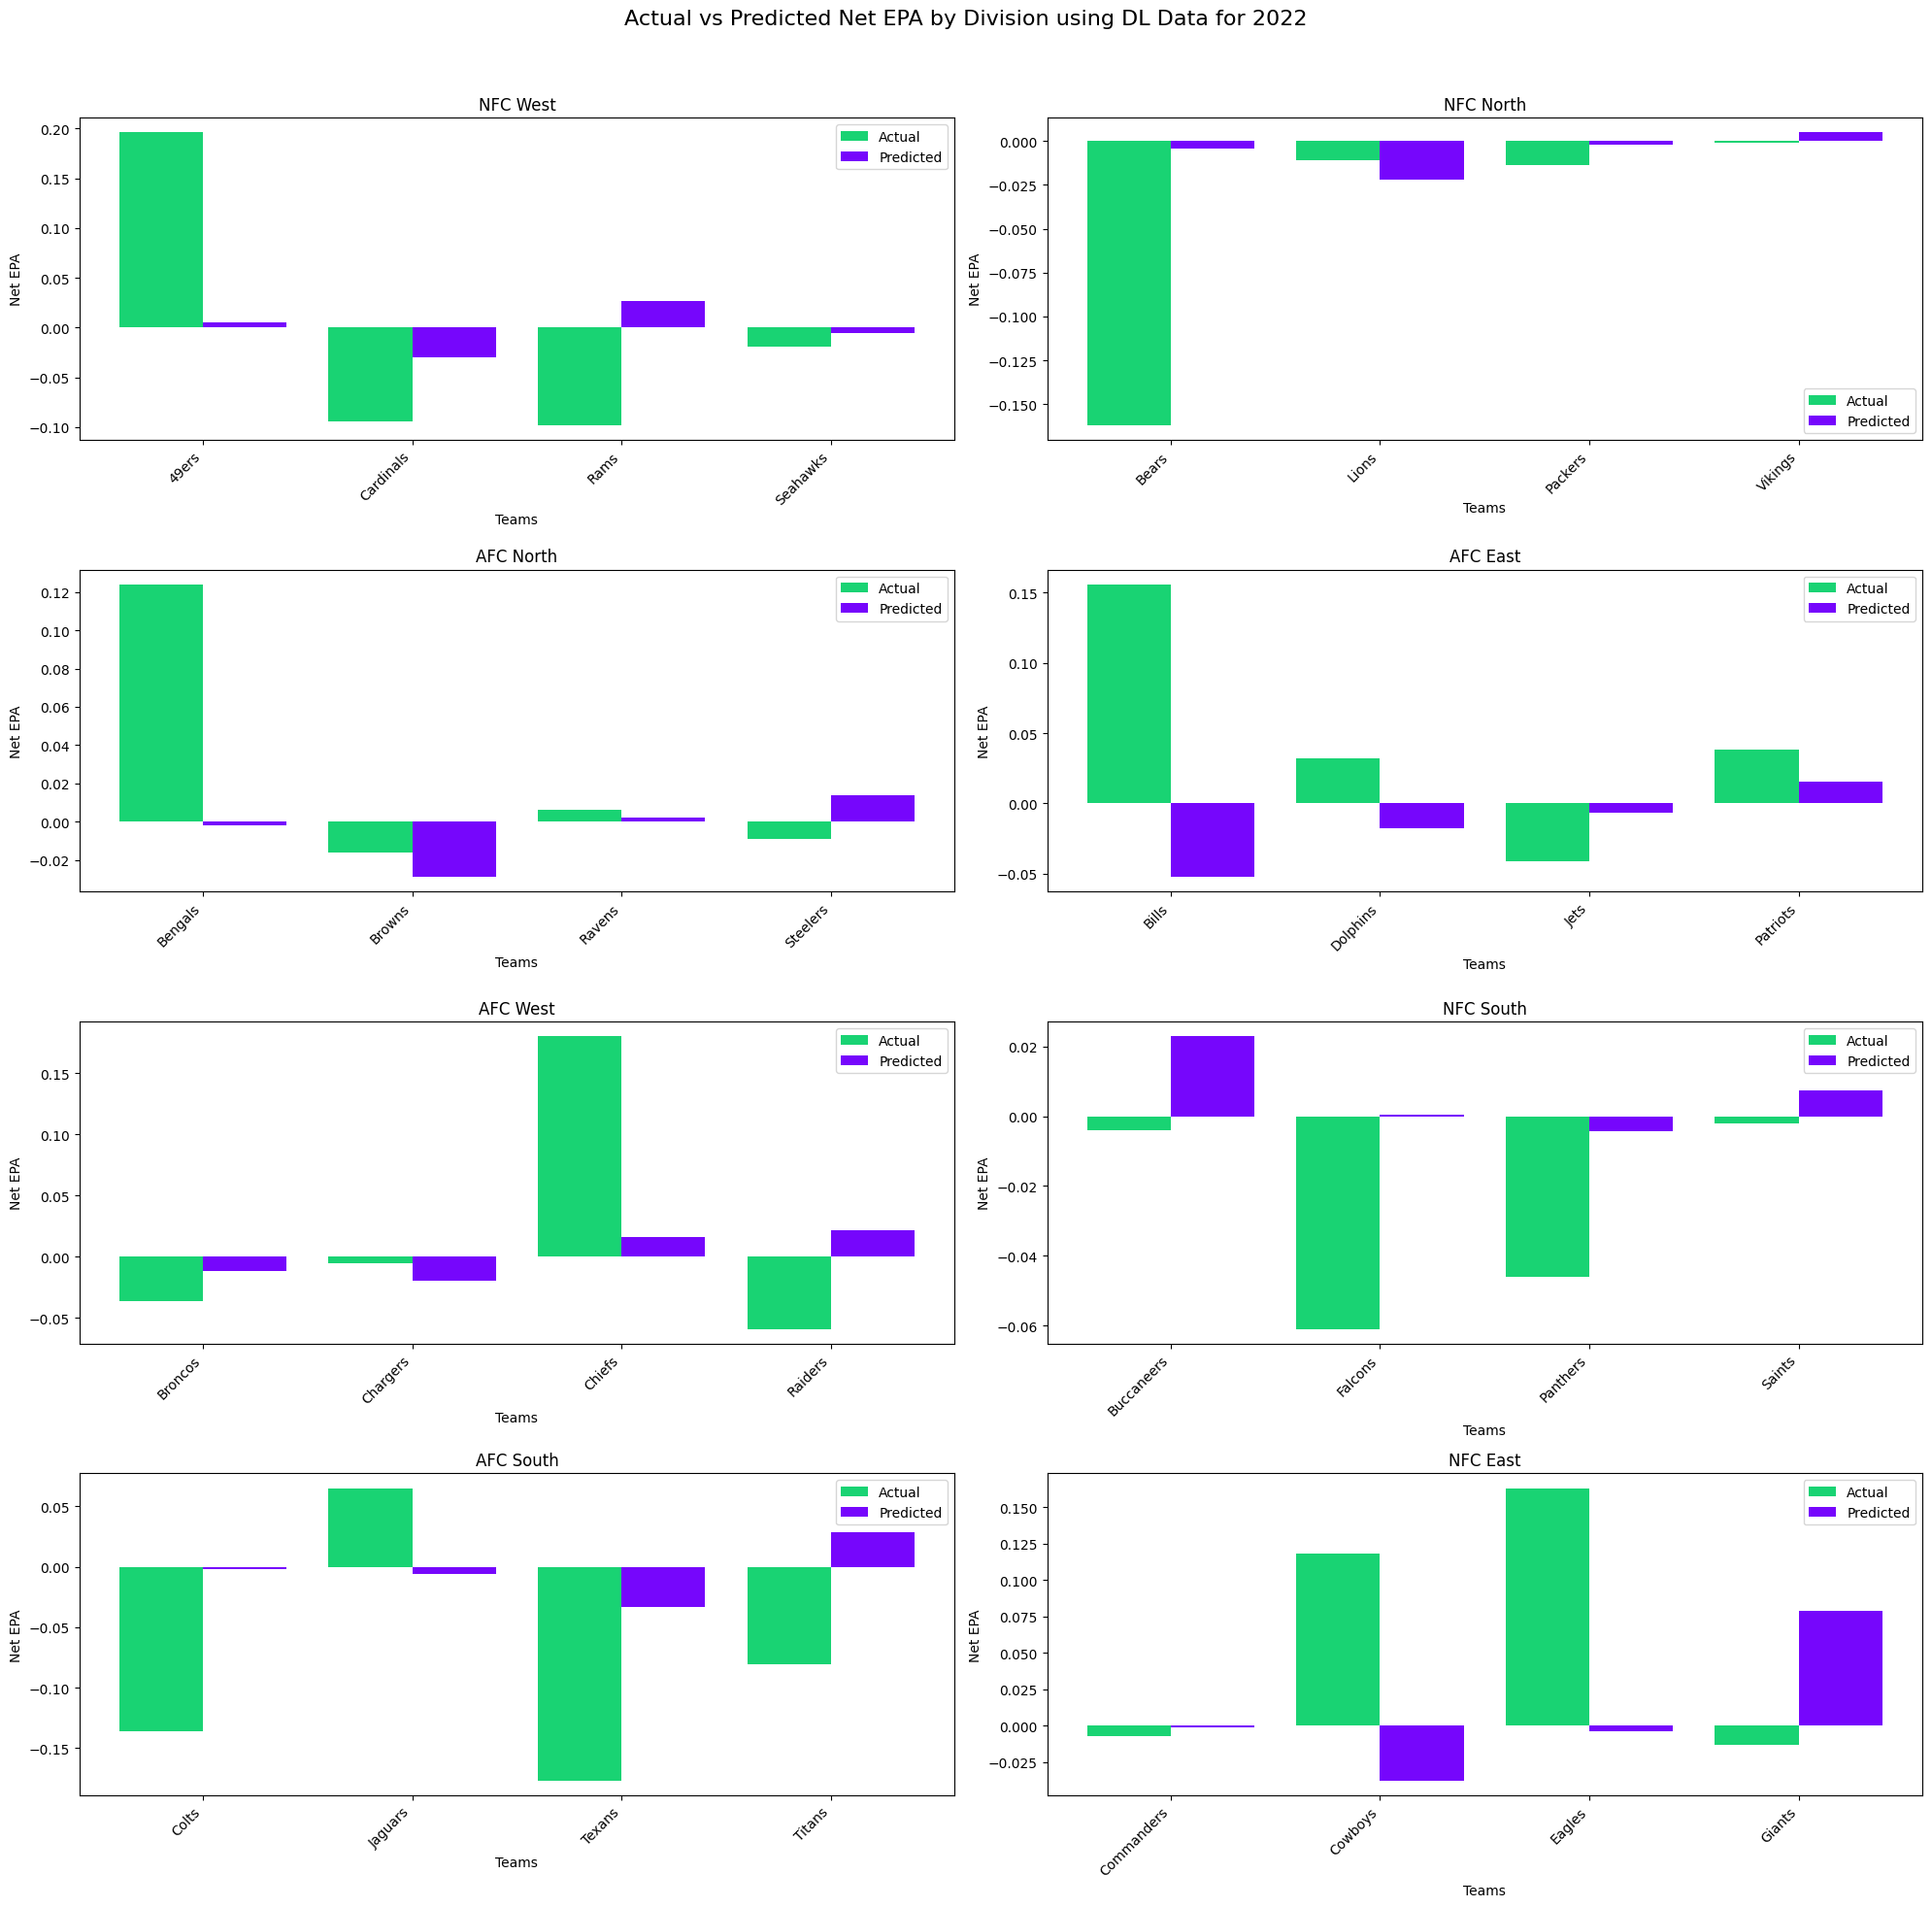

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0200 - val_loss: 0.0065
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - val_loss: 0.0101
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - val_loss: 0.0066
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0154 - val_loss: 0.0042
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - val_loss: 0.0057
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - val_loss: 0.0061
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - val_loss: 0.0074
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0134
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - val_loss: 0.0074
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143 - val_loss: 0.0066
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - val_loss: 0.01

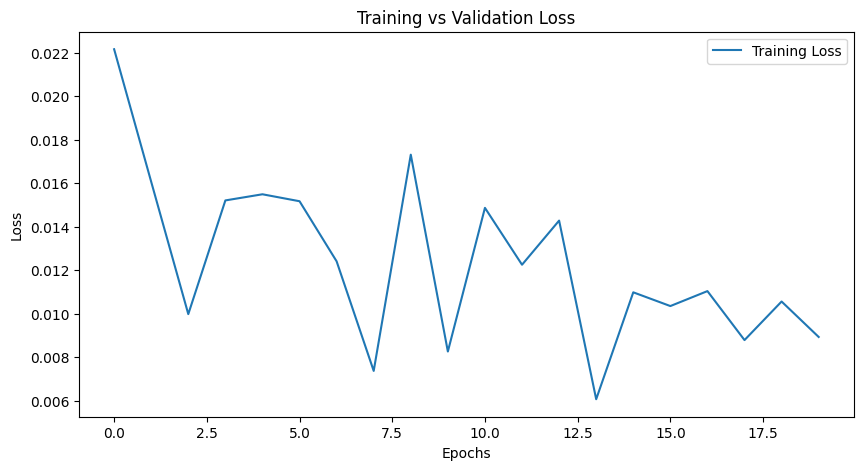

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.1175


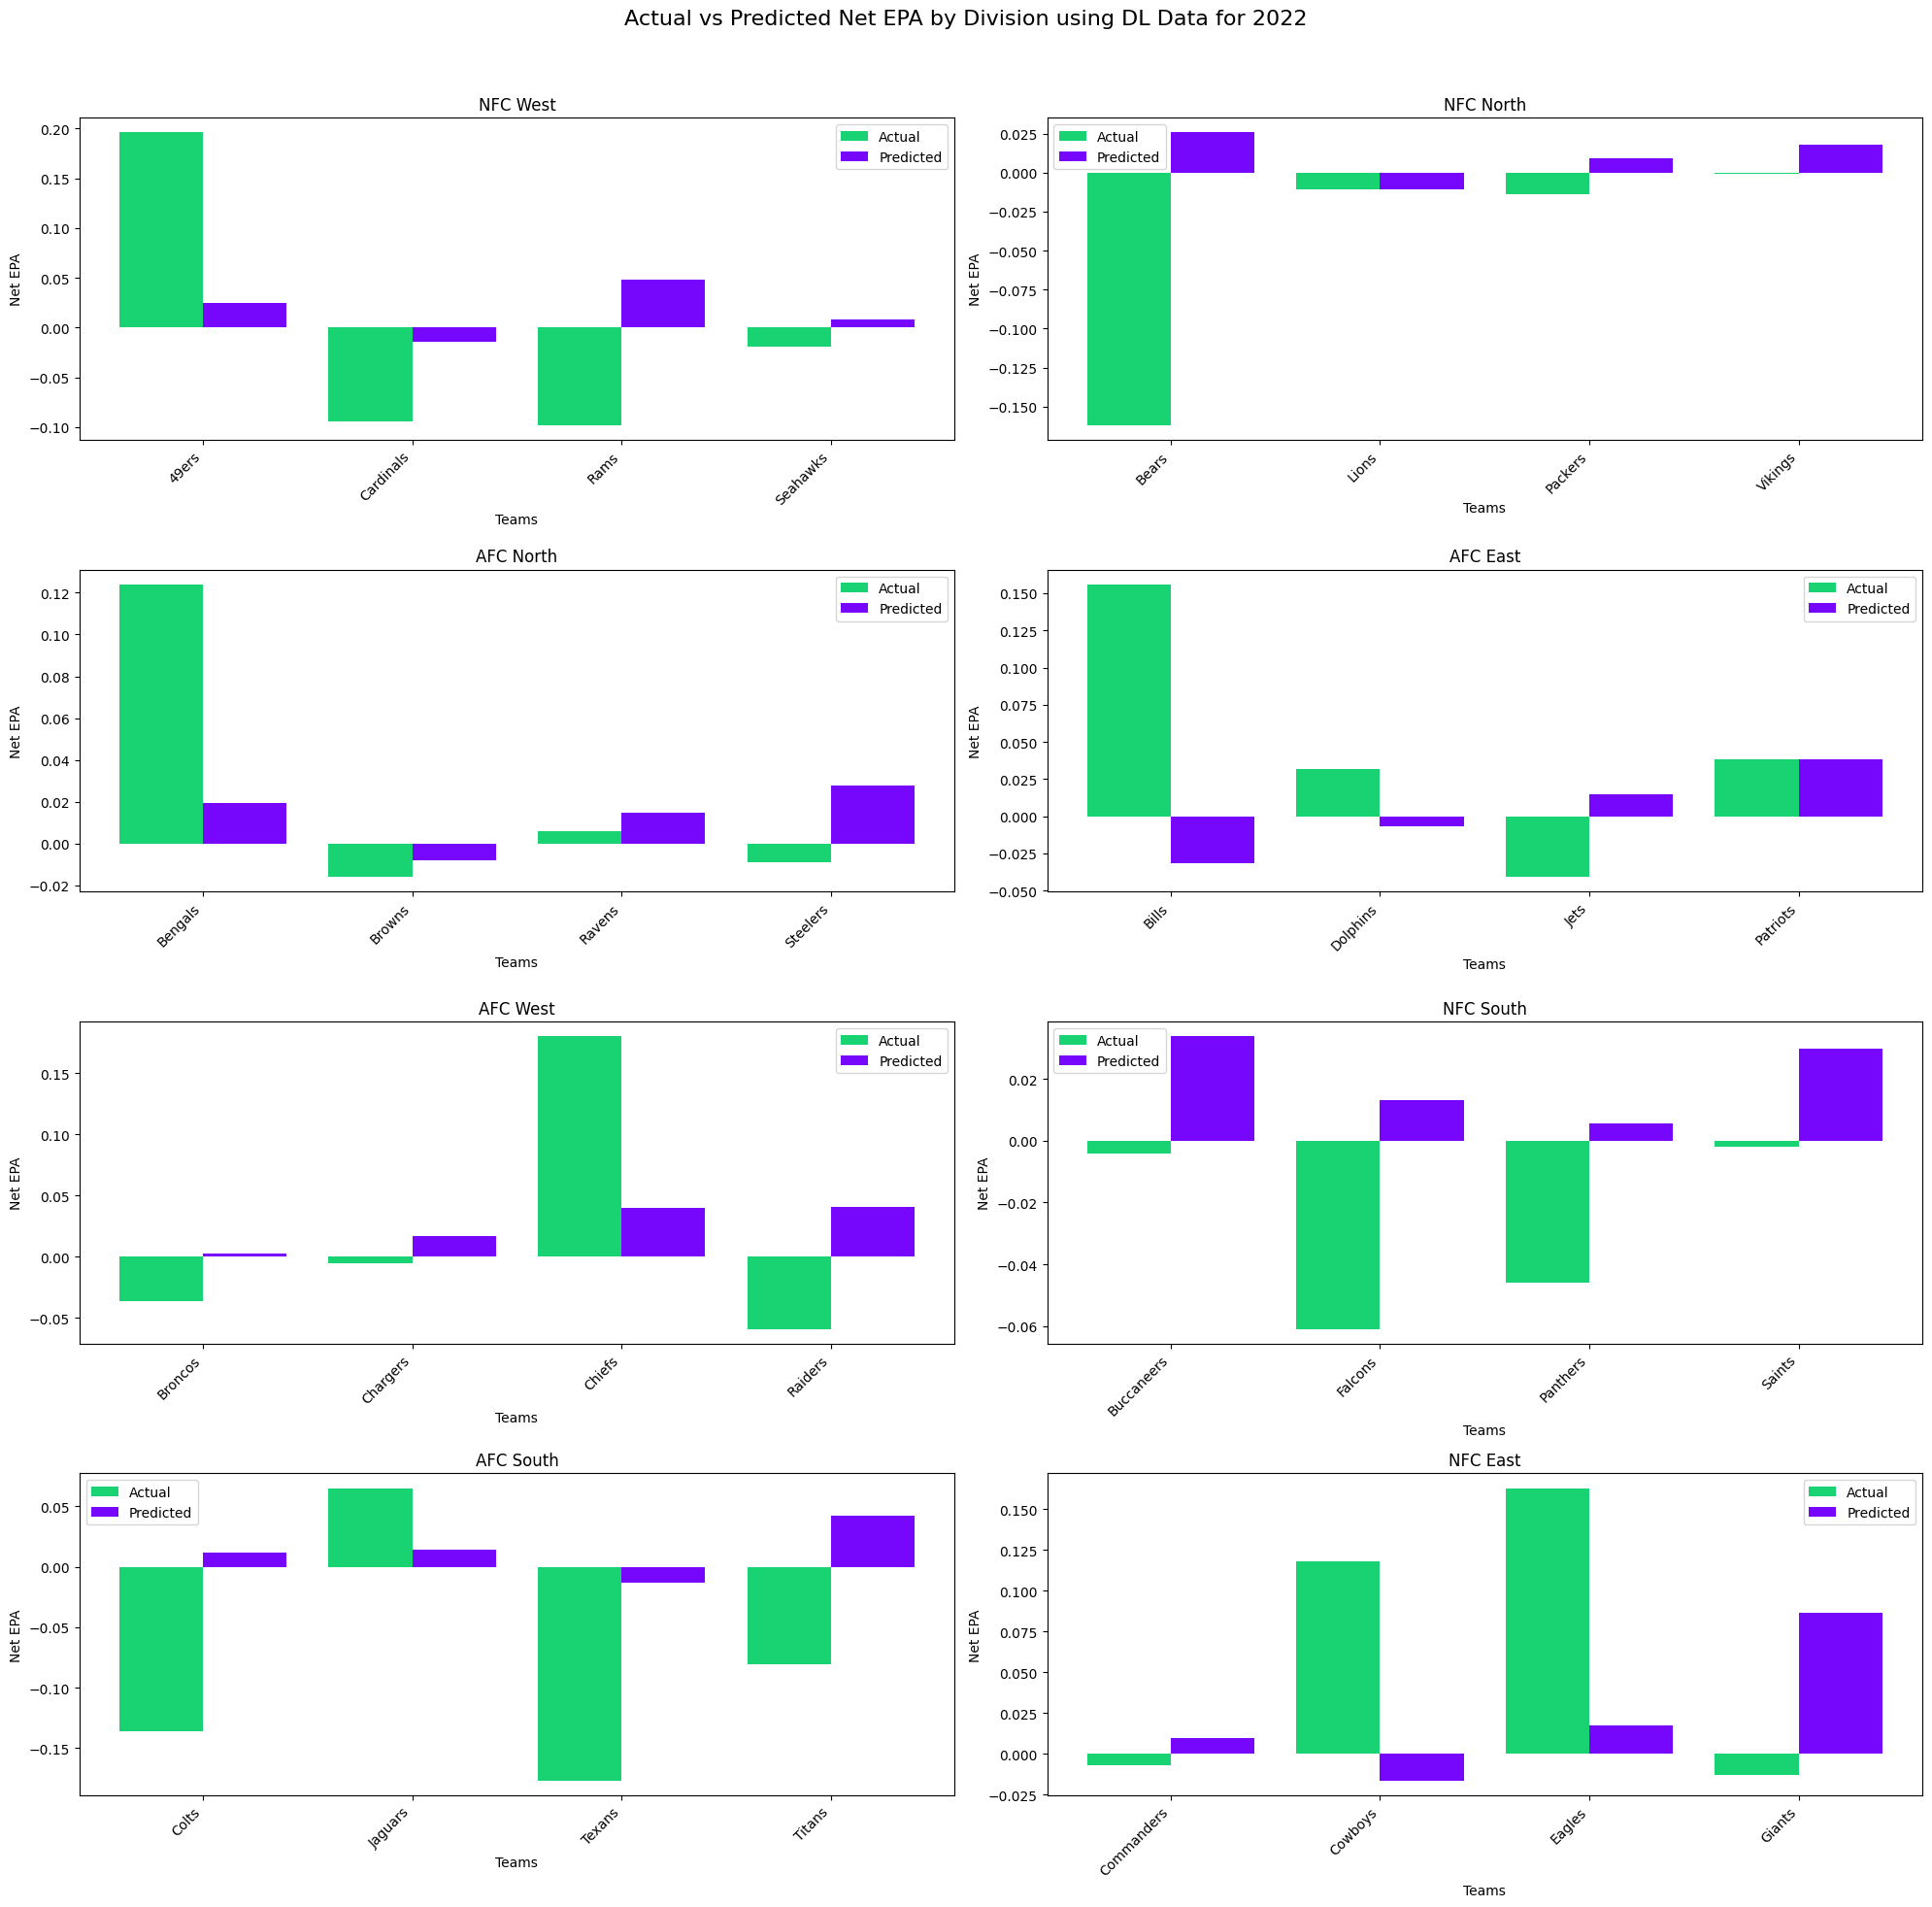

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0163 - val_loss: 0.0057
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - val_loss: 0.0043
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0101 - val_loss: 0.0036
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - val_loss: 0.0036
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - val_loss: 0.0048
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - val_loss: 0.0084
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - val_loss: 0.0110
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0113 - val_loss: 0.0061
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0109 - val_loss: 0.0066
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - val_loss: 0

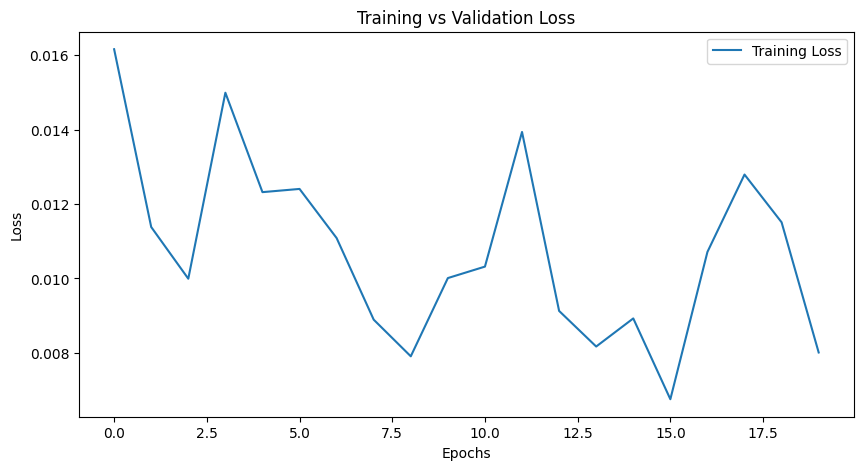

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: 0.0010


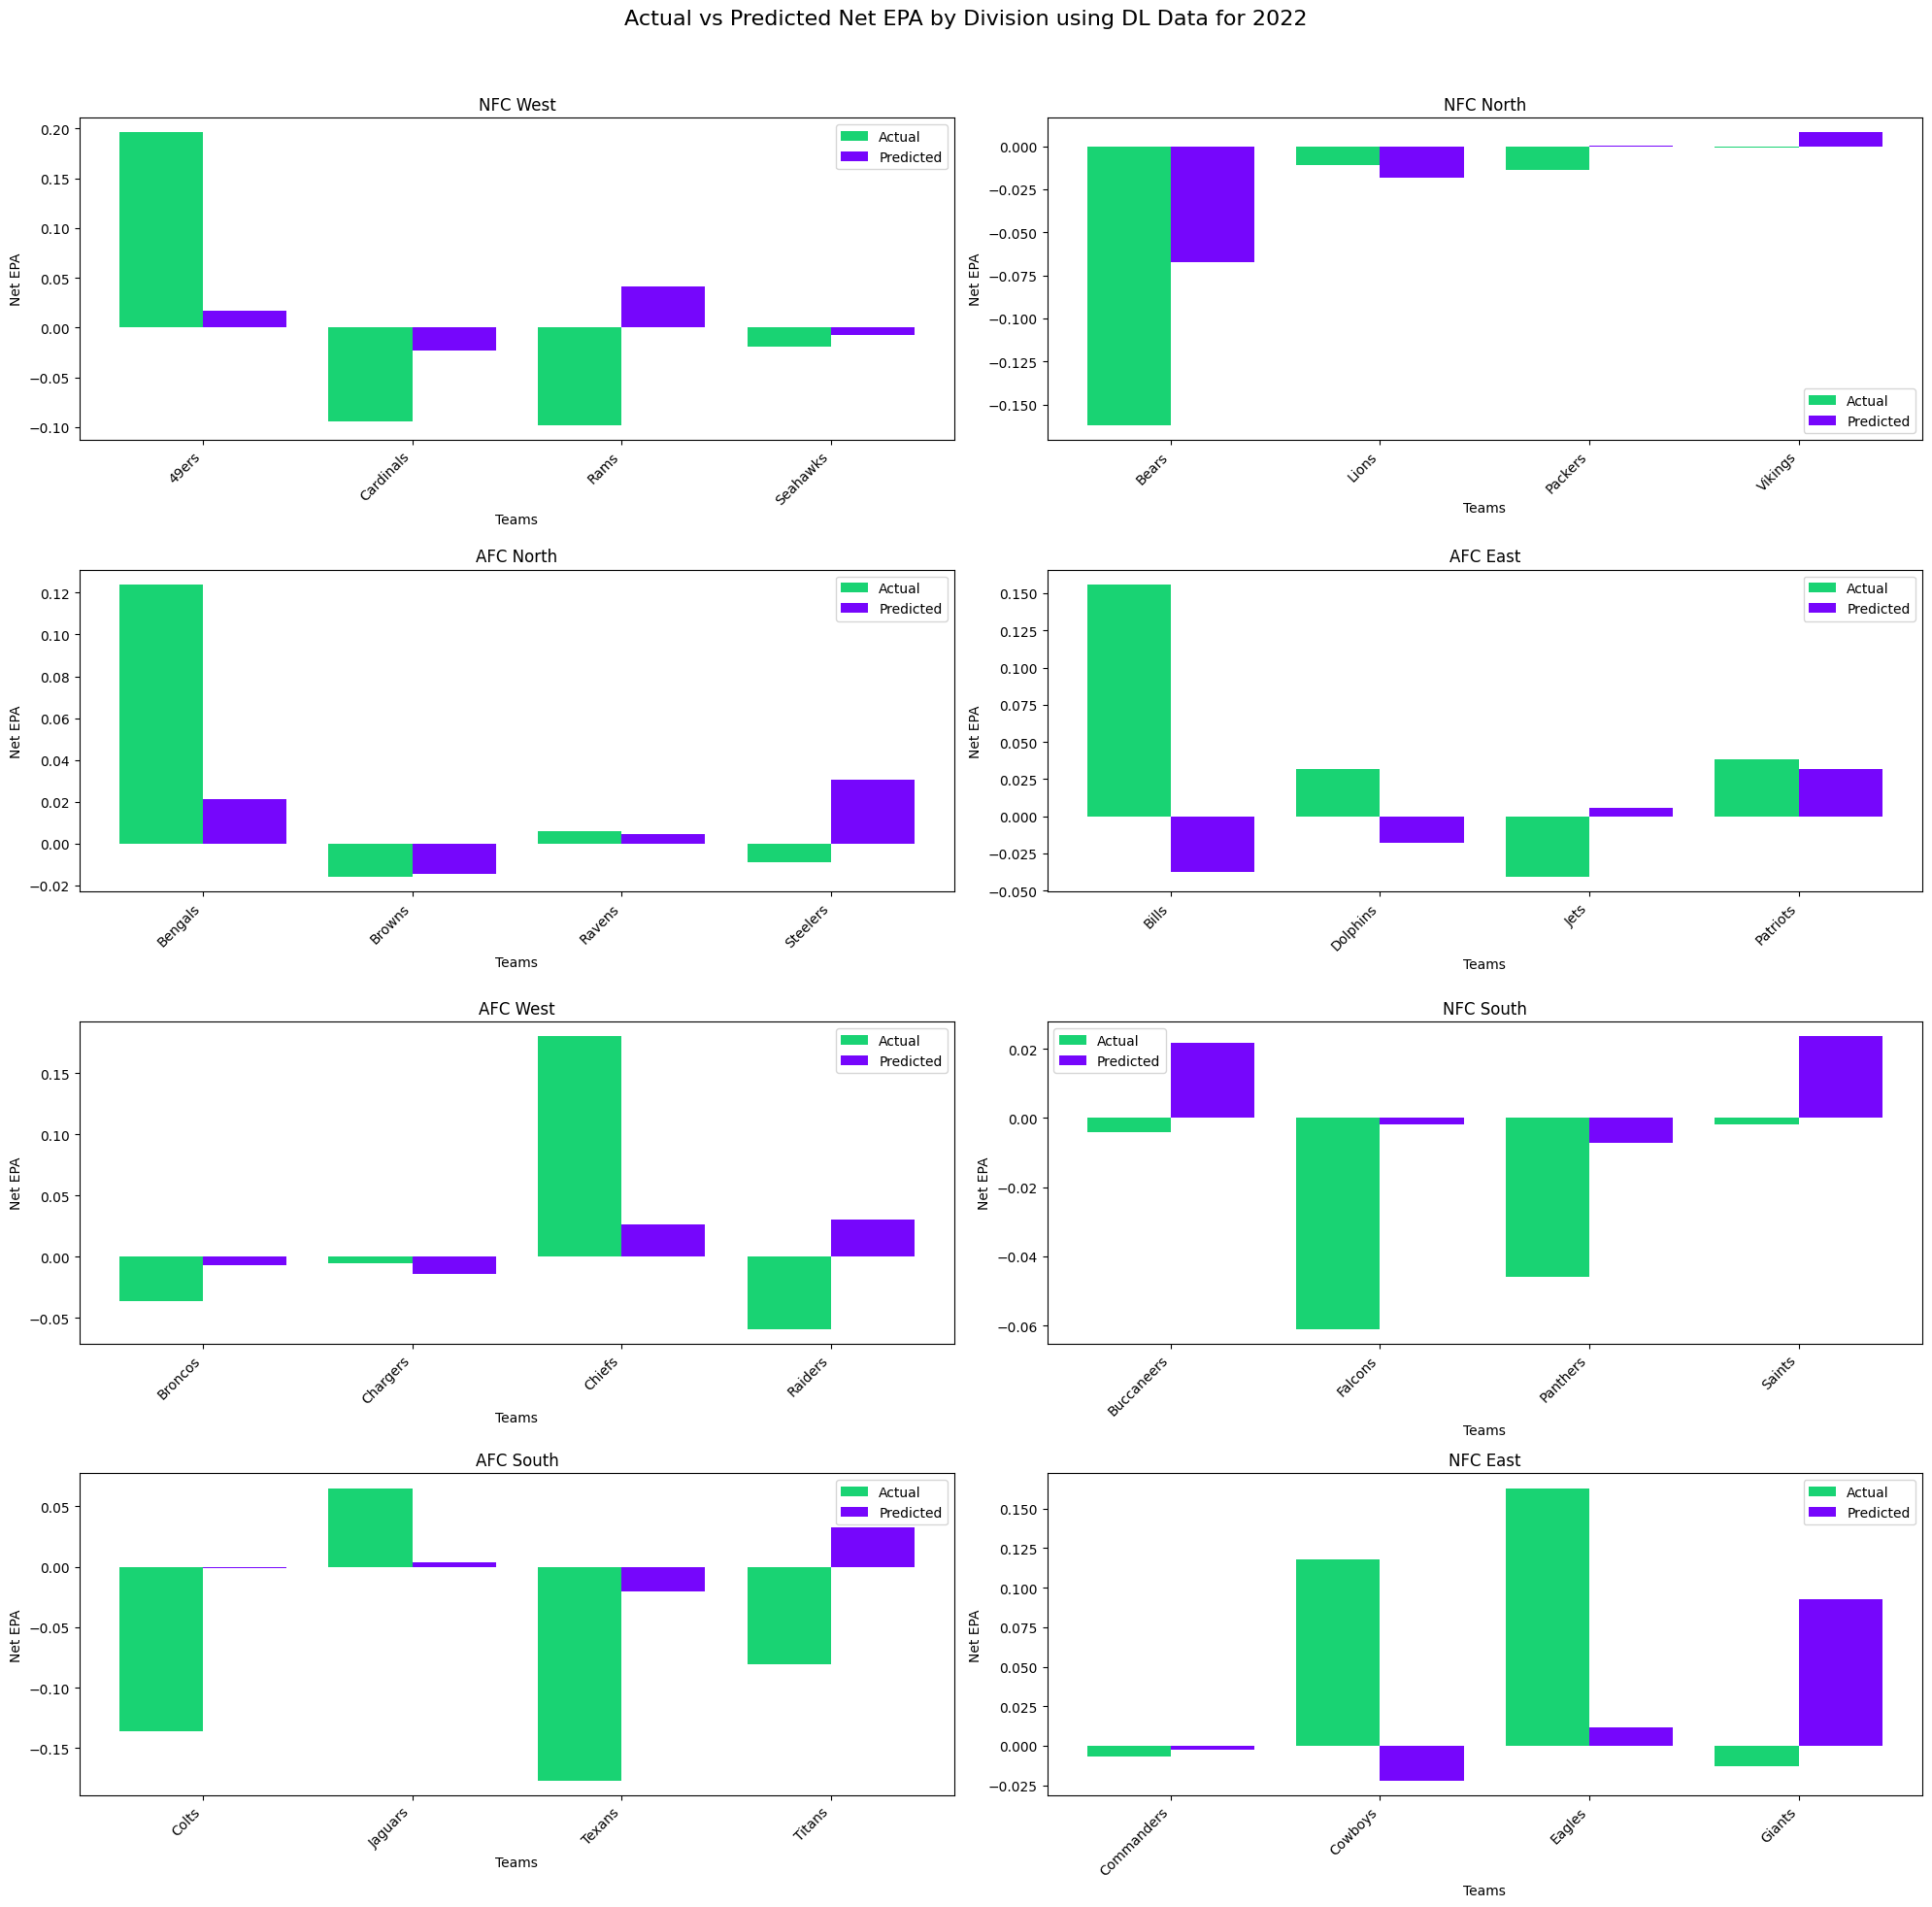

Epoch 1/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0193 - val_loss: 0.0054
Epoch 2/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - val_loss: 0.0105
Epoch 3/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 4/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0100 - val_loss: 0.0057
Epoch 5/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0057
Epoch 6/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0115 - val_loss: 0.0088
Epoch 7/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 8/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 9/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0059
Epoch 10/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0081
Epoch 11/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - val_loss: 0.0092
Epoch 12/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - val_loss: 0.0

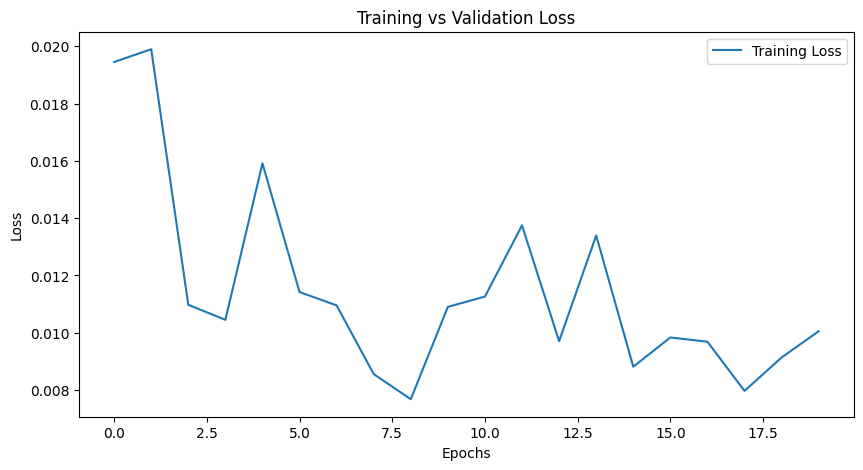

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: 0.0772


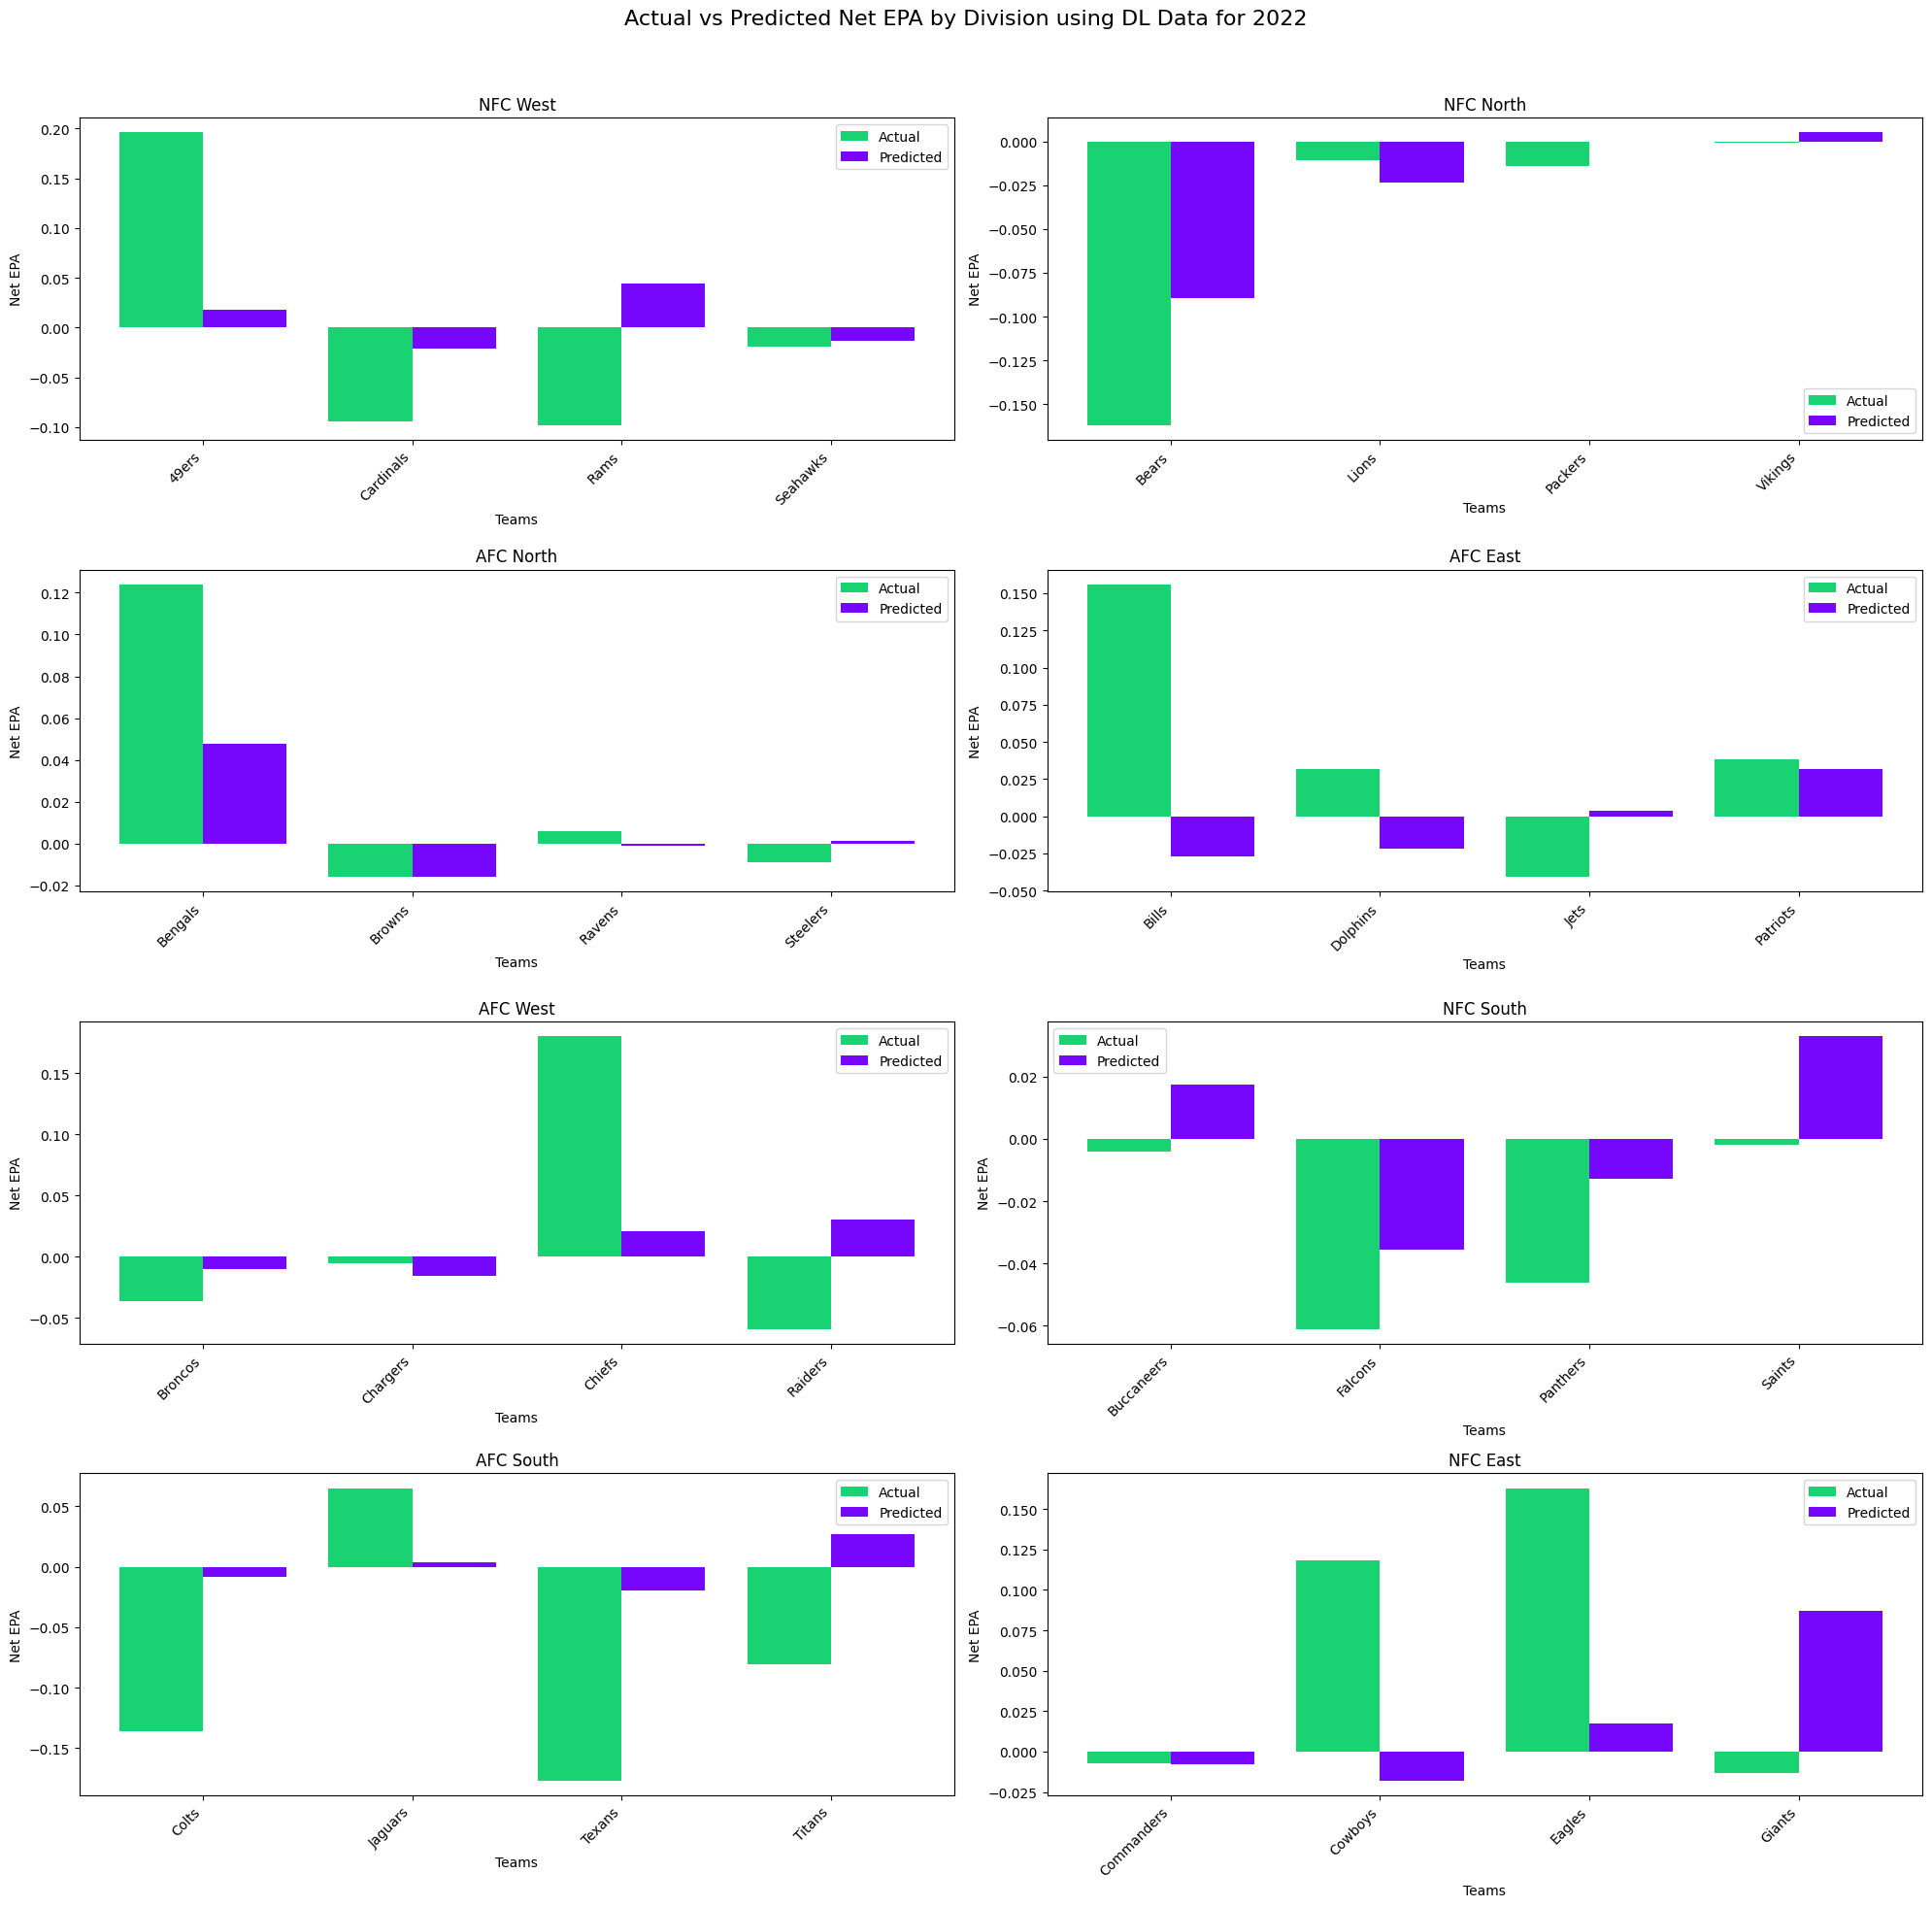

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0142 - val_loss: 0.0081
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0094
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0070
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0177 - val_loss: 0.0121
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0178
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - val_loss: 0.0145
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_loss: 0.0067
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - val_loss: 0.0067
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087 - val_loss: 0.0103
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0130
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089 - val_loss: 0.0090


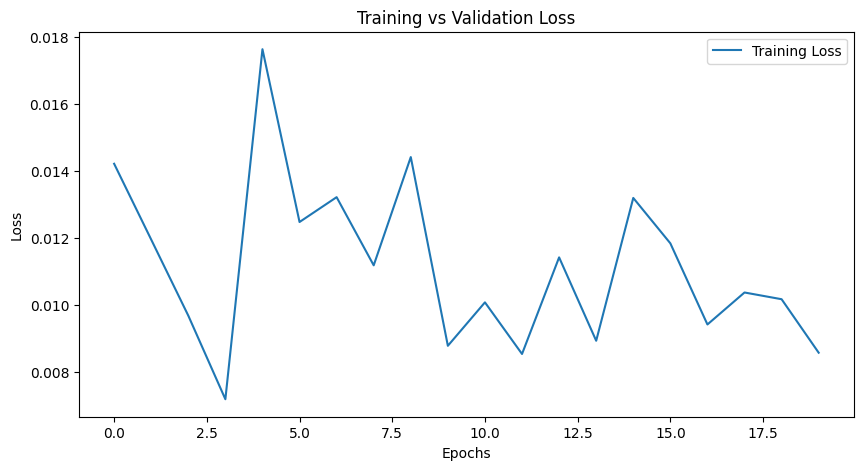

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: 0.0350


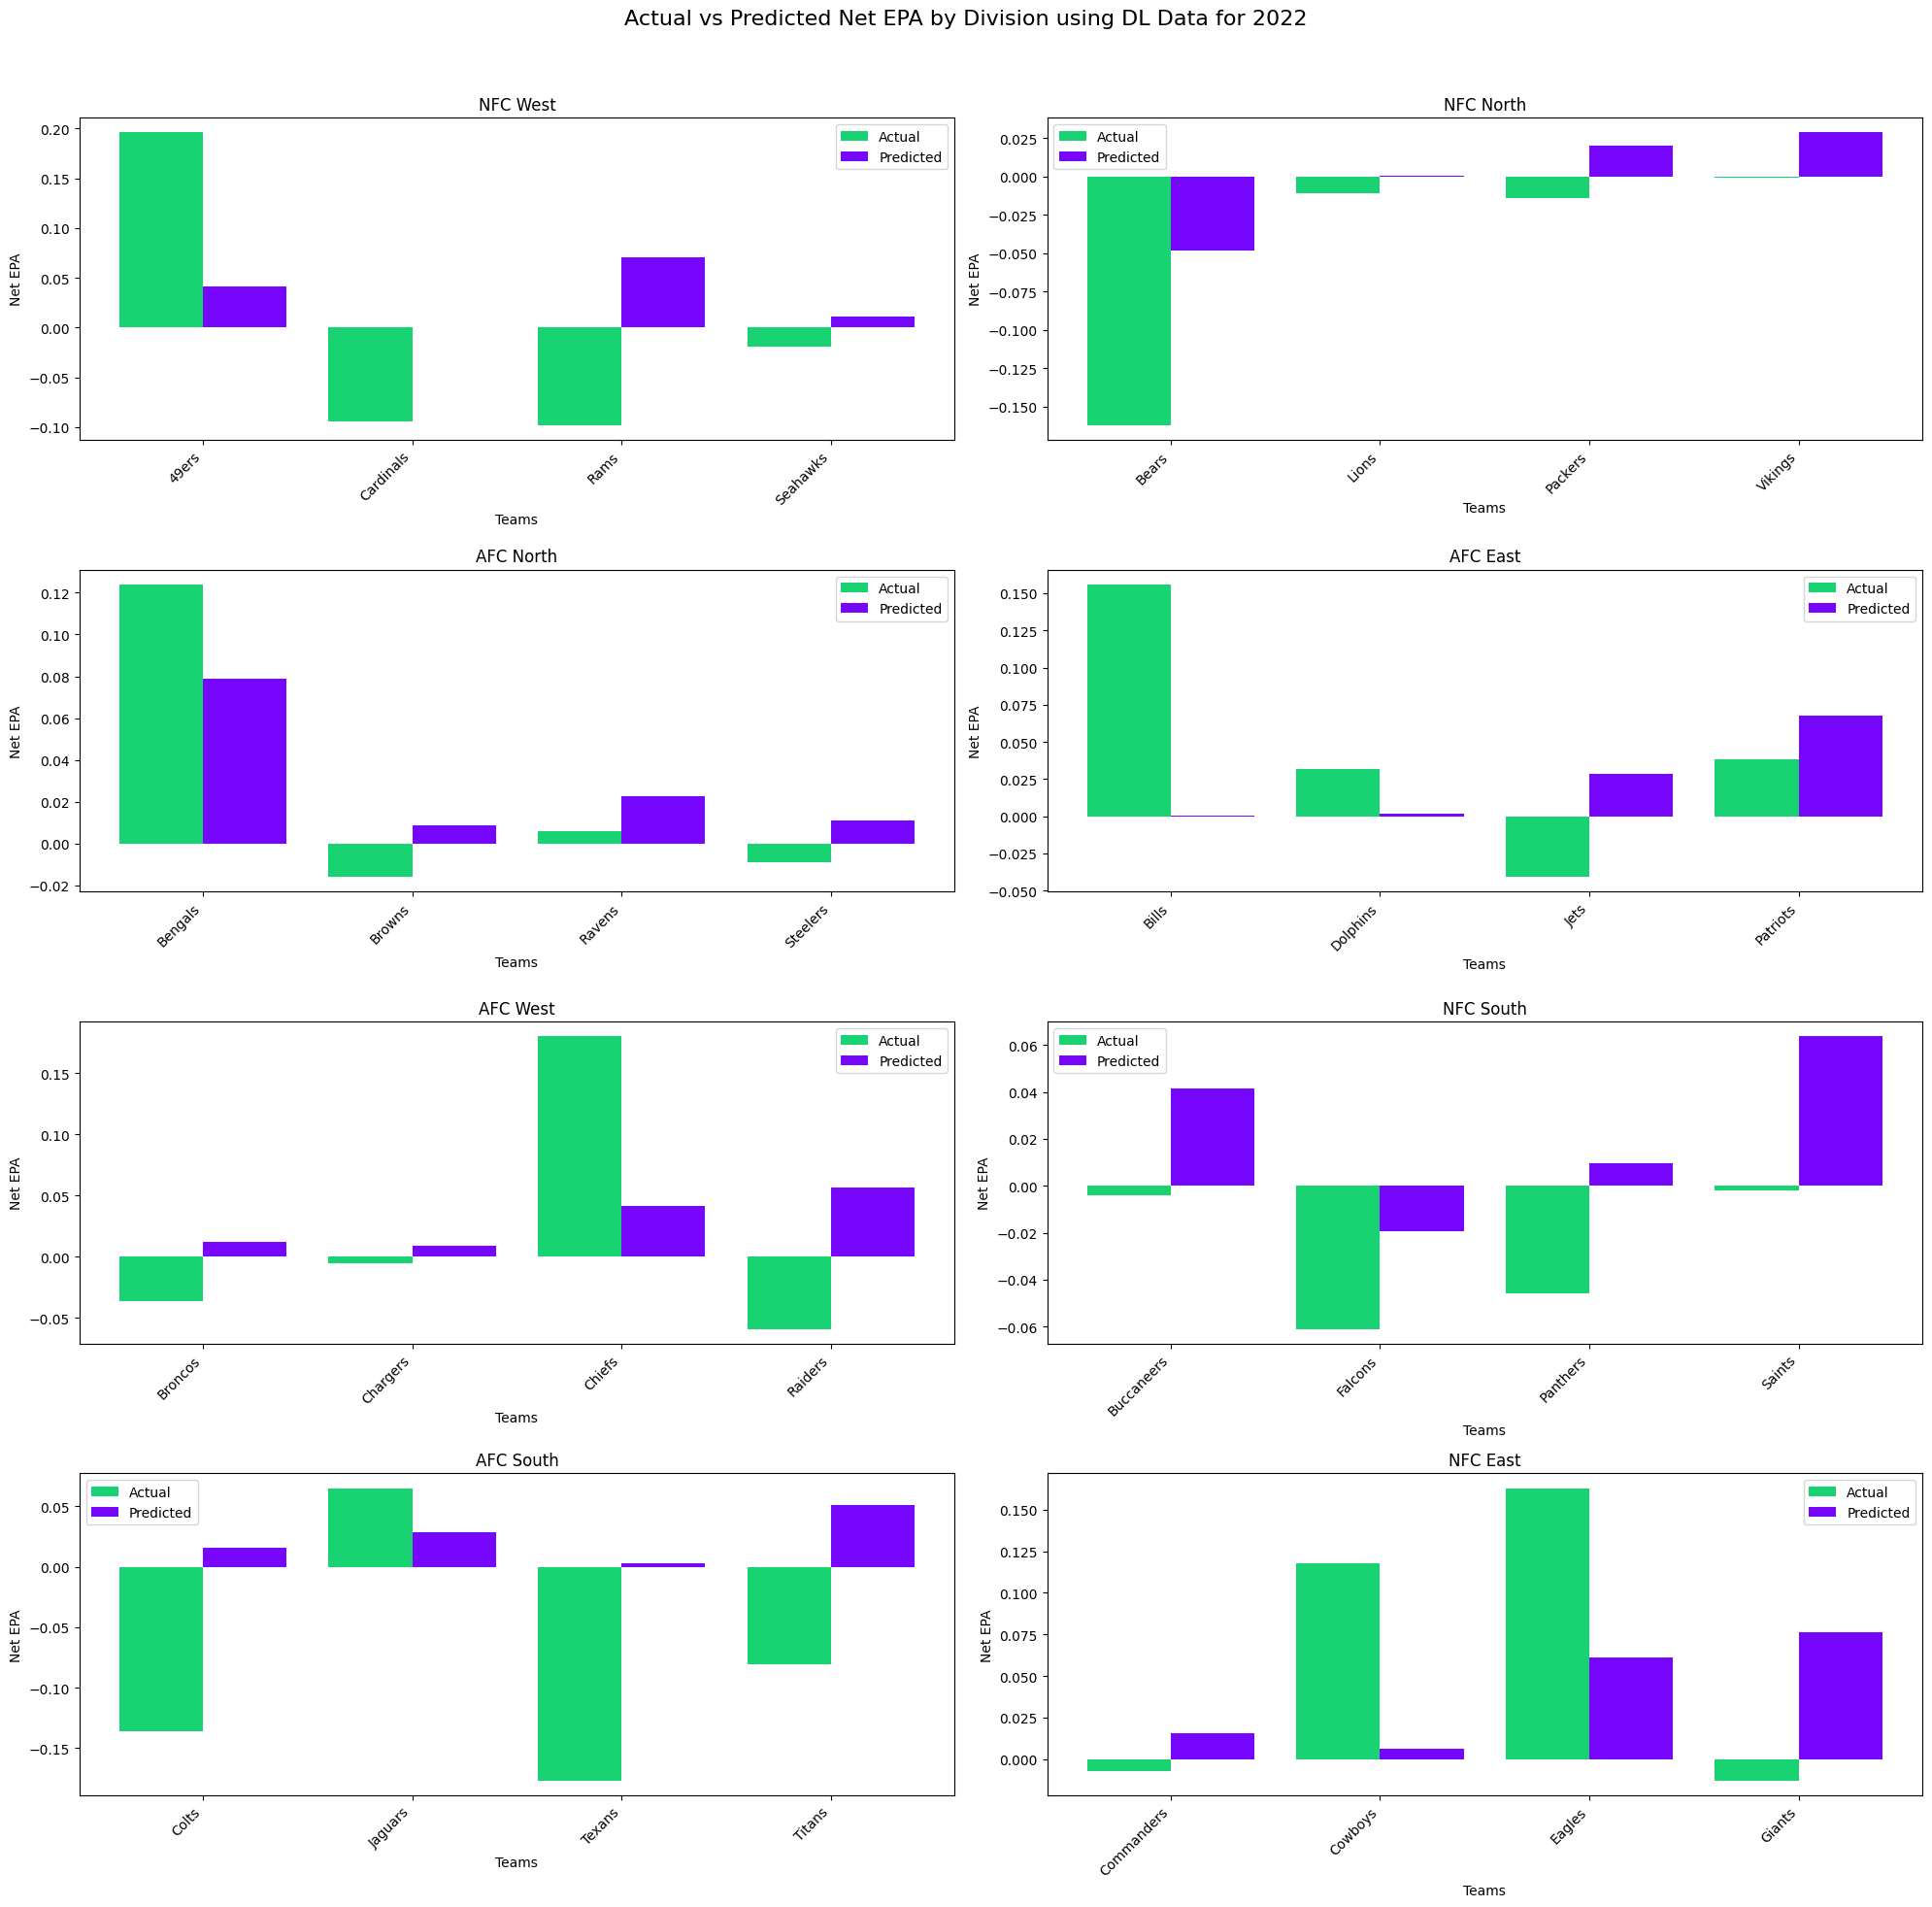

Epoch 1/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0171 - val_loss: 0.0064
Epoch 2/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - val_loss: 0.0056
Epoch 3/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 4/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0101 - val_loss: 0.0066
Epoch 5/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 - val_loss: 0.0066
Epoch 6/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 7/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 8/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_loss: 0.0071
Epoch 9/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0080
Epoch 10/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 11/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 12/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - val_loss: 0.0070


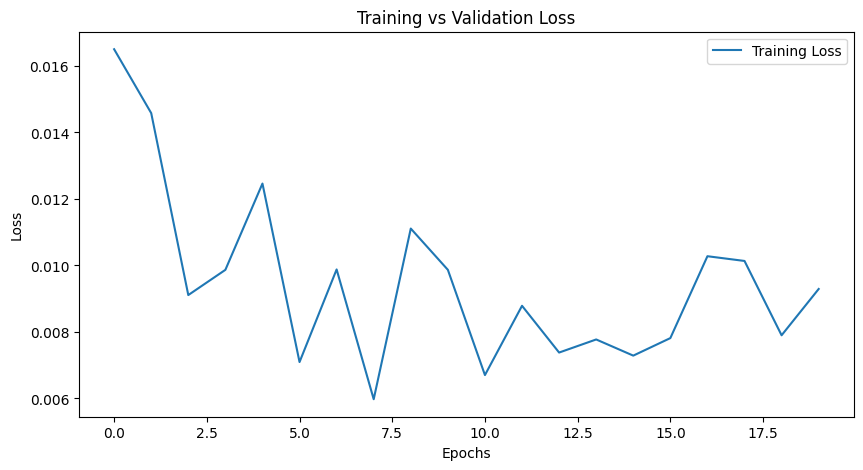

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32
R² Score: 0.1225


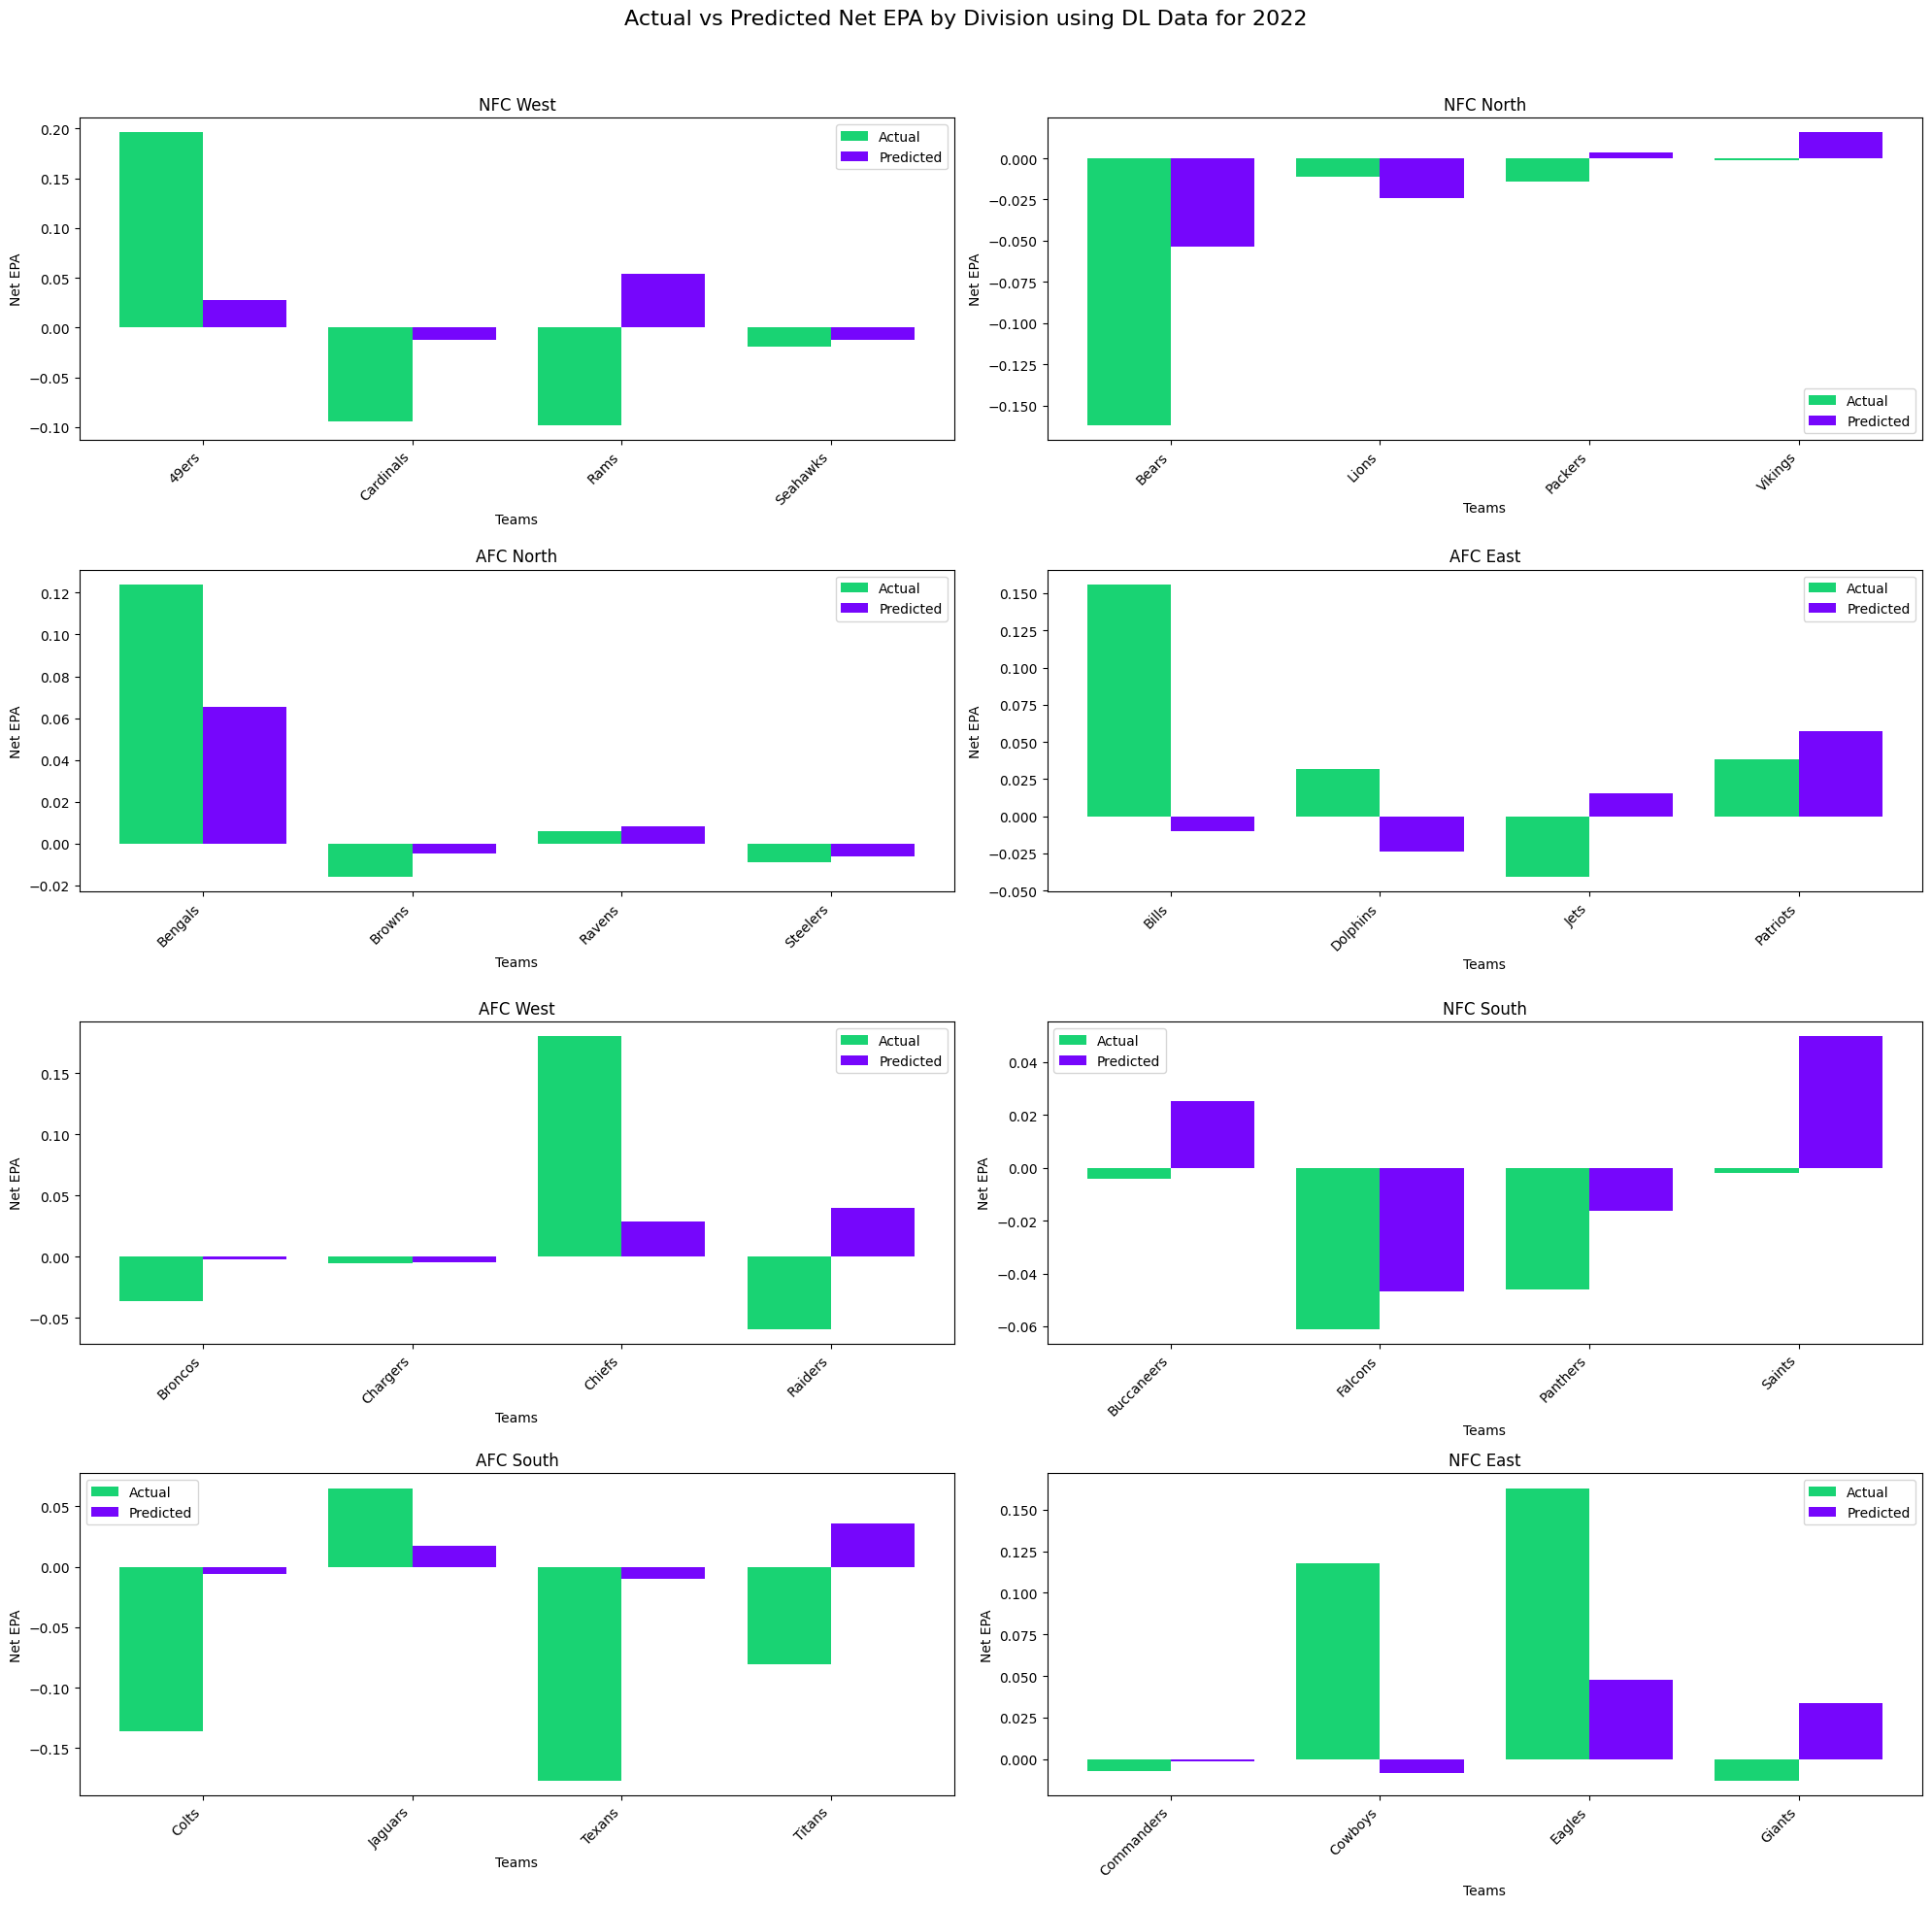

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0125 - val_loss: 0.0077
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0088 - val_loss: 0.0064
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0164 - val_loss: 0.0052
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - val_loss: 0.0142
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189 - val_loss: 0.0134
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - val_loss: 0.0069
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0078
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - val_loss: 0.0073
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0049
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0080


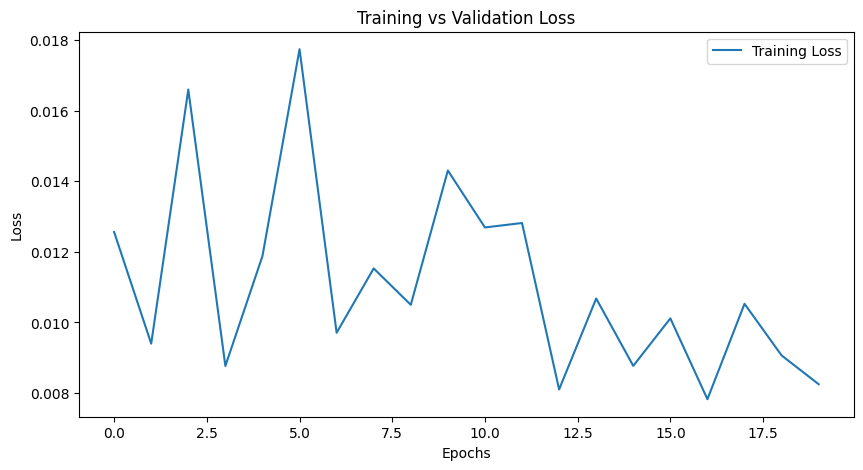

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32
R² Score: 0.0671


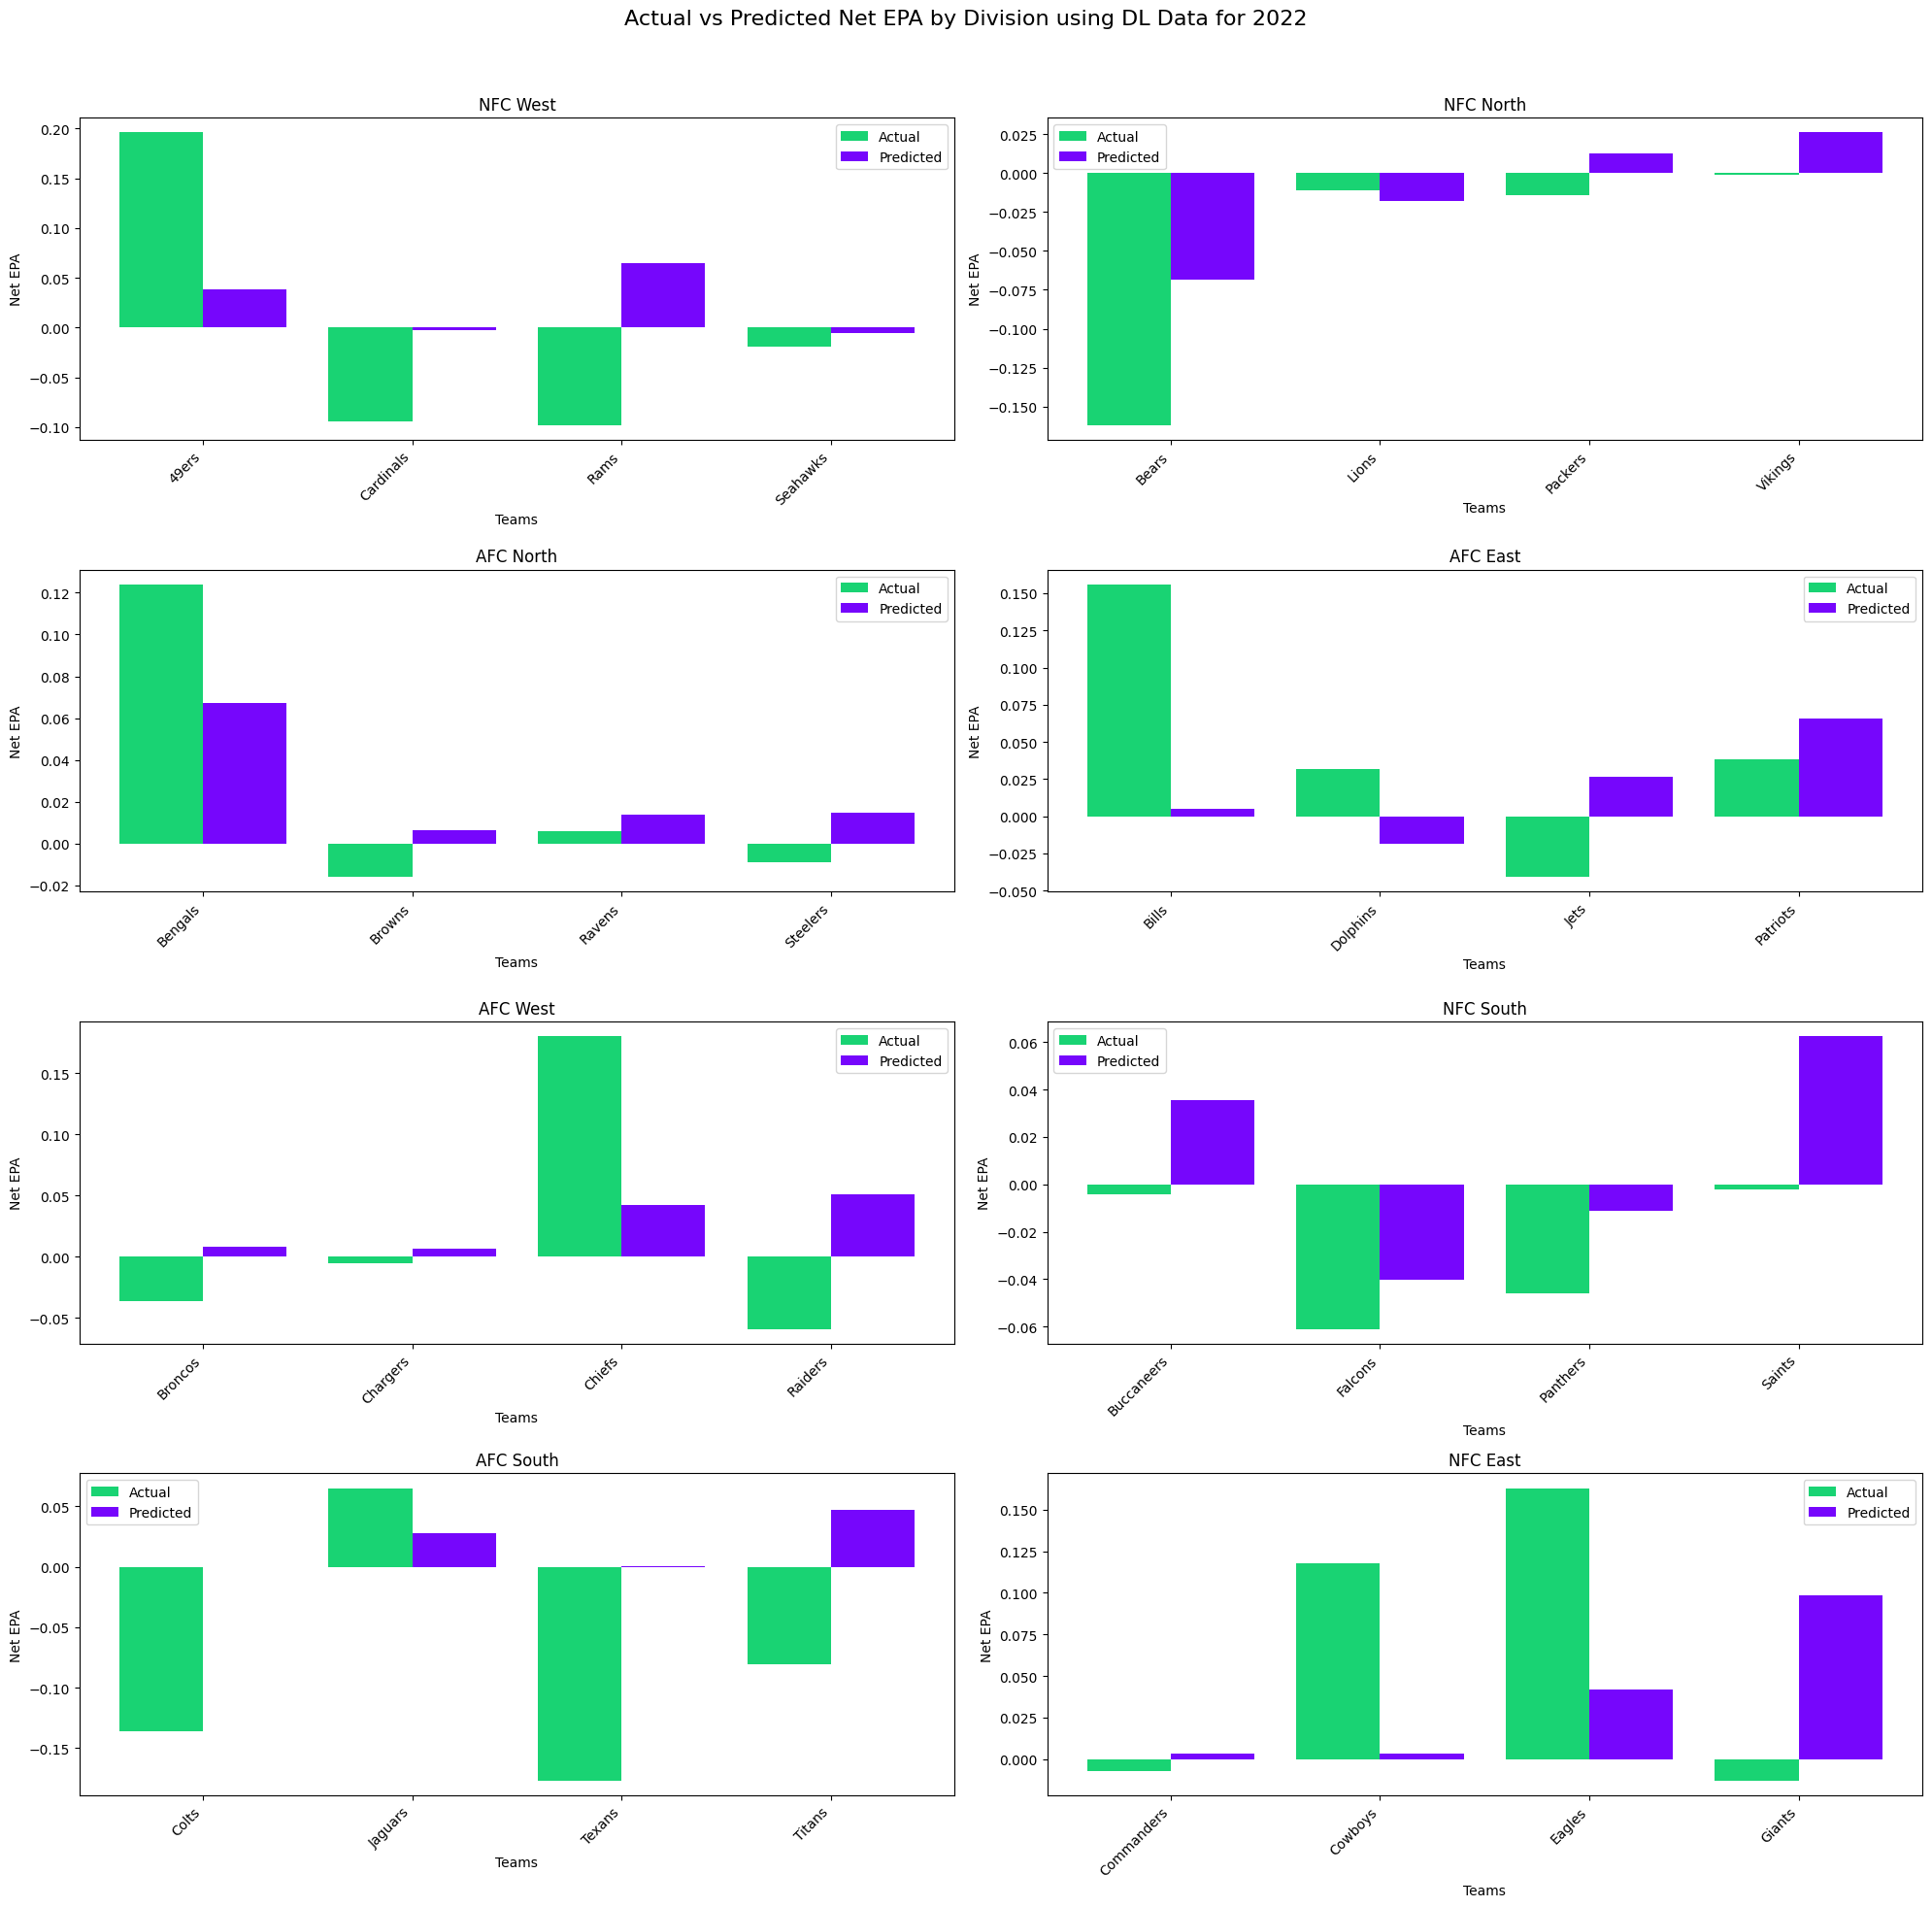

Epoch 1/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0127 - val_loss: 0.0061
Epoch 2/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - val_loss: 0.0052
Epoch 3/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - val_loss: 0.0058
Epoch 4/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 5/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 6/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - val_loss: 0.0056
Epoch 7/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0060
Epoch 8/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - val_loss: 0.0112
Epoch 9/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 10/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 11/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - val_loss: 0.0053
Epoch 12/550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - val_loss: 0.0133

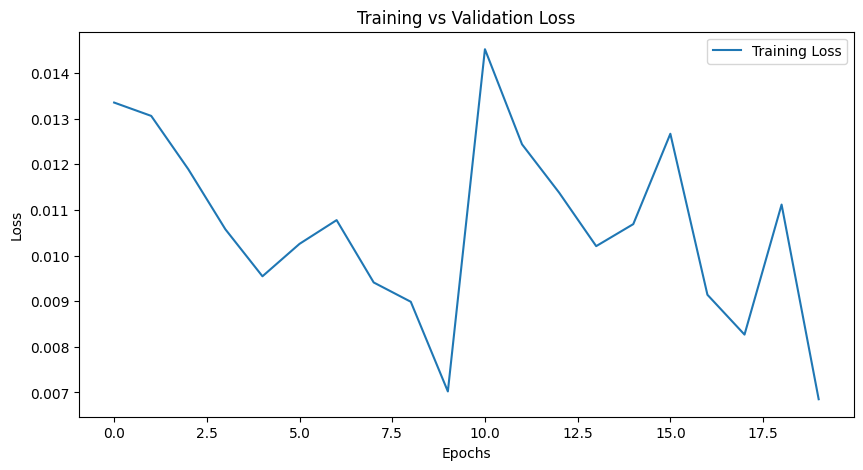

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: 0.1133


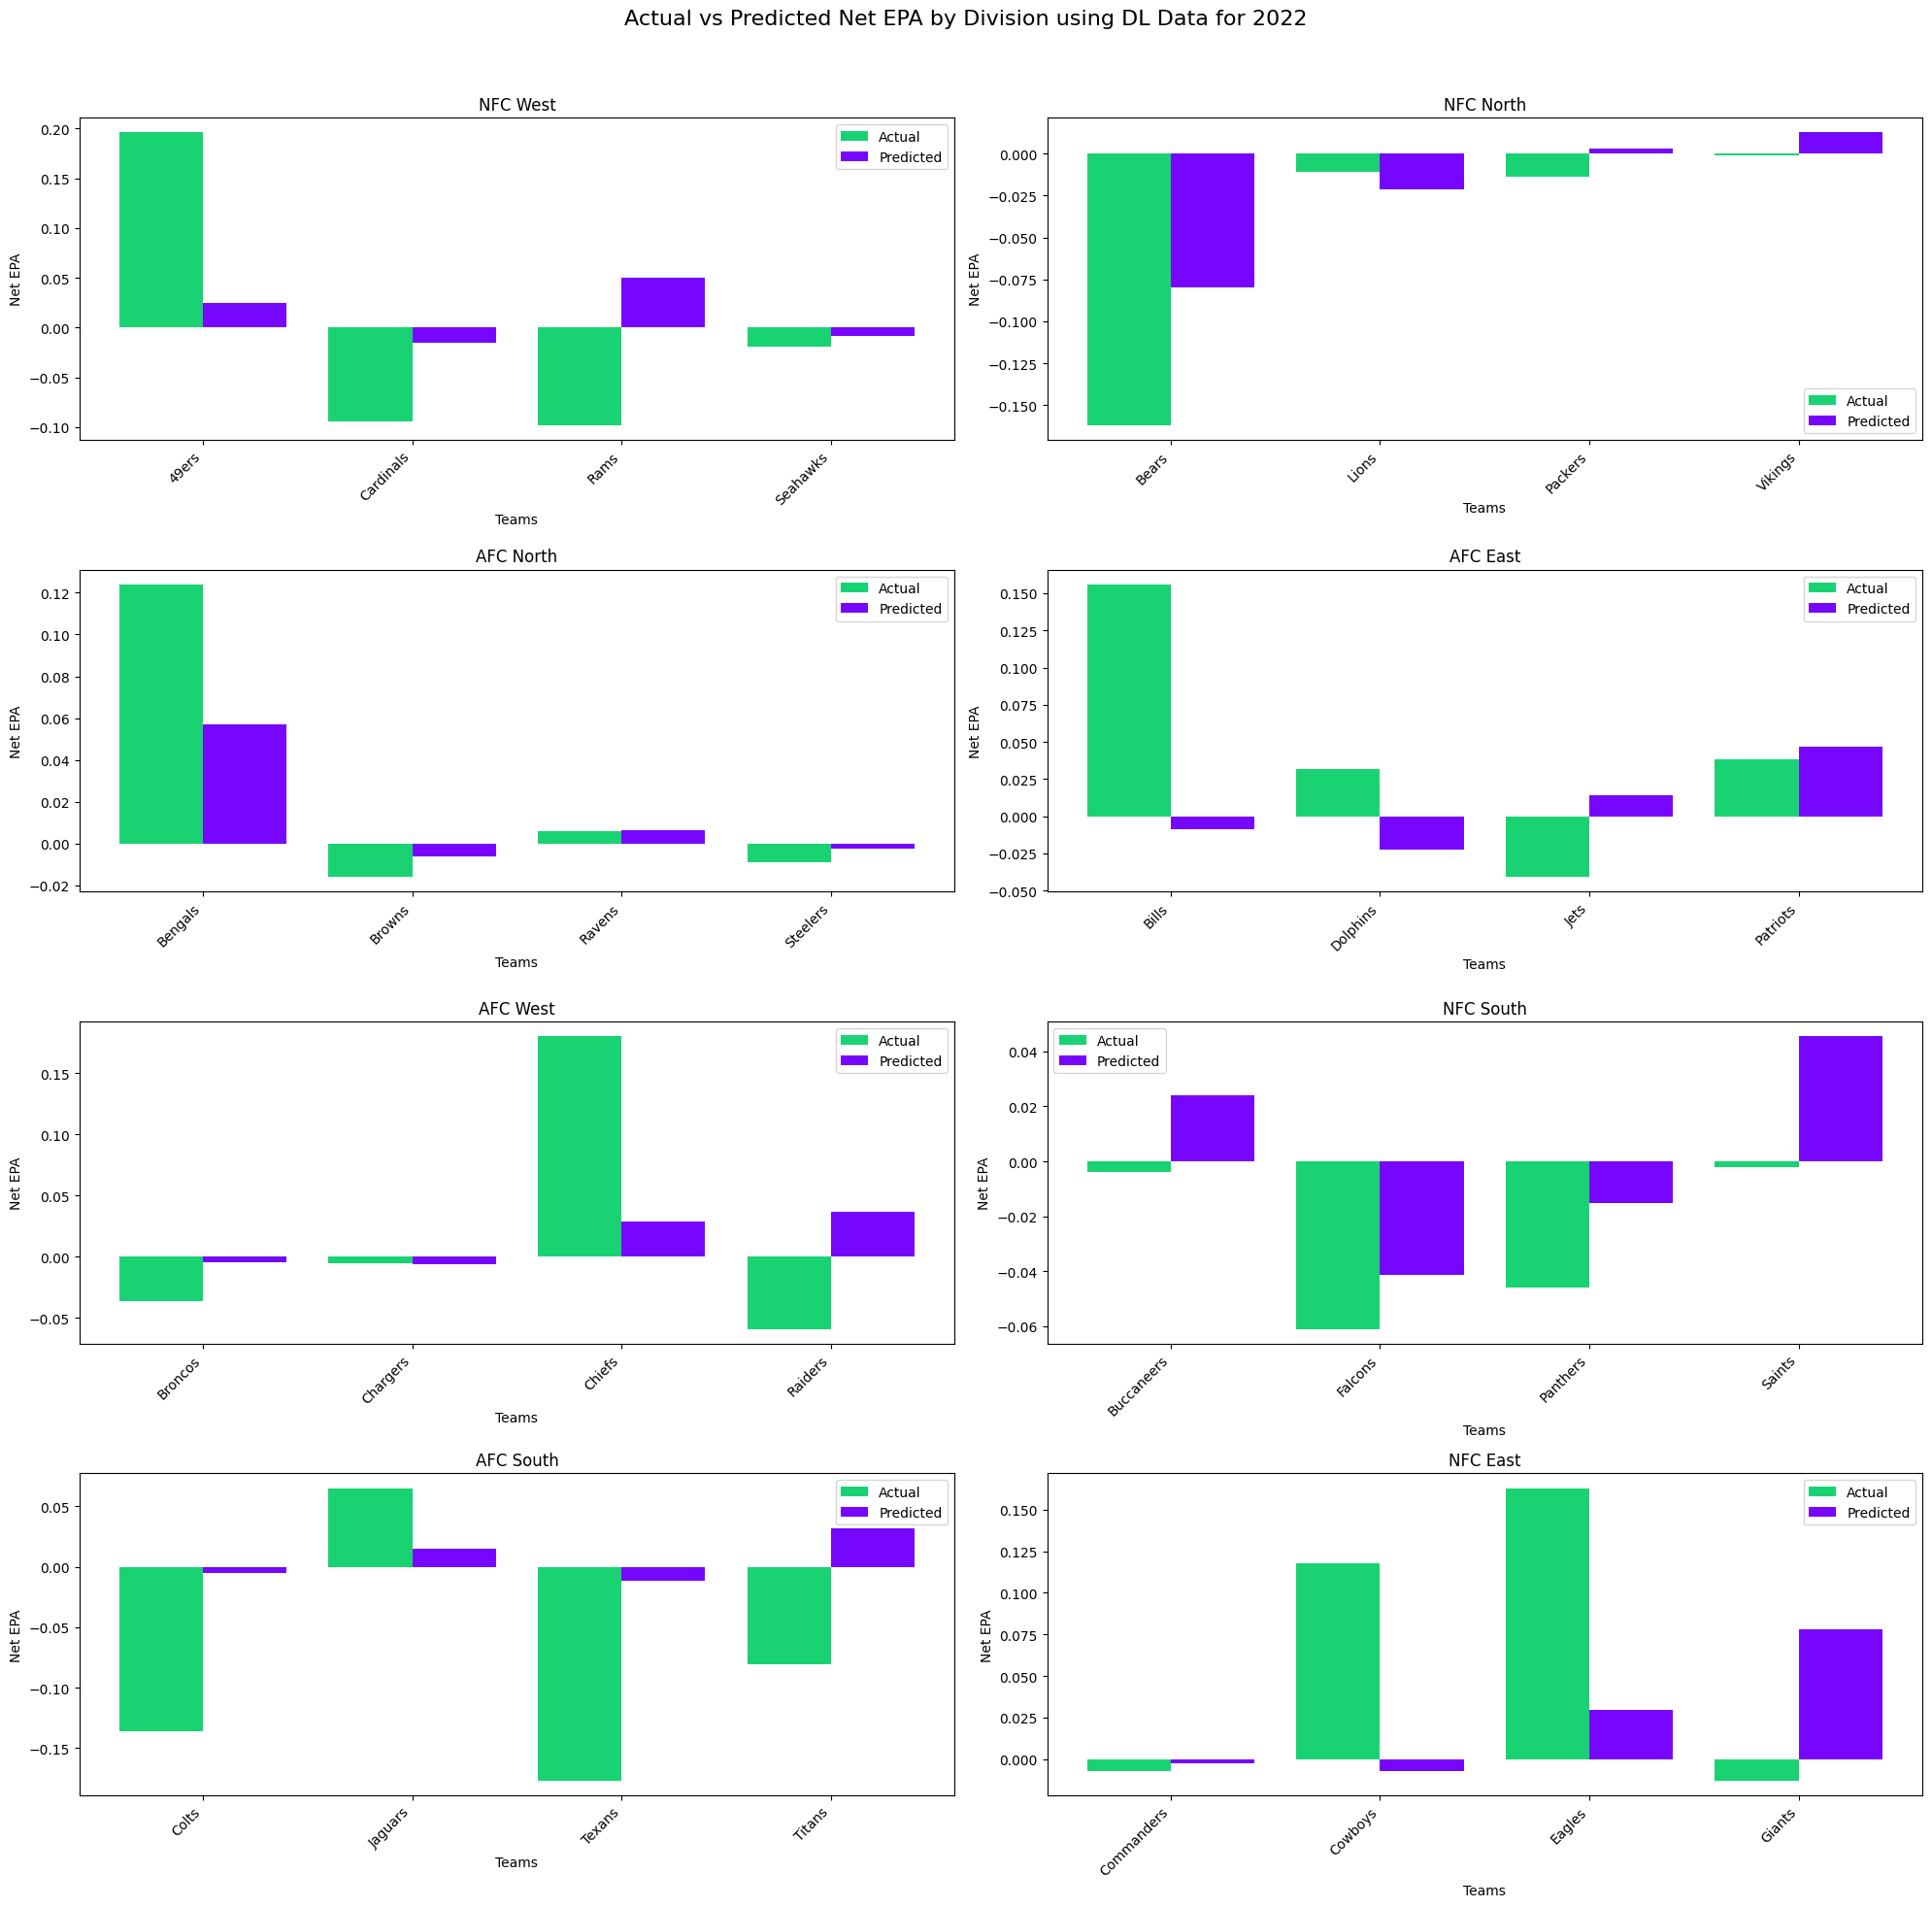

Epoch 1/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068 - val_loss: 0.0097
Epoch 2/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 3/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - val_loss: 0.0076
Epoch 4/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0108 - val_loss: 0.0064
Epoch 5/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105 - val_loss: 0.0072
Epoch 6/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 0.0101
Epoch 7/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - val_loss: 0.0110
Epoch 8/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - val_loss: 0.0098
Epoch 9/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0072
Epoch 10/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 11/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0101 - val_loss: 0.0079
Epoch 12/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0119 - val_loss: 0.010

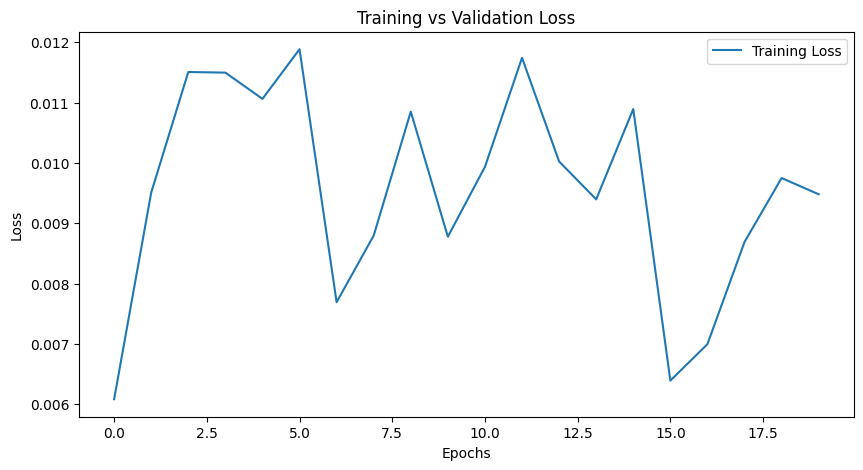

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32
R² Score: 0.0033


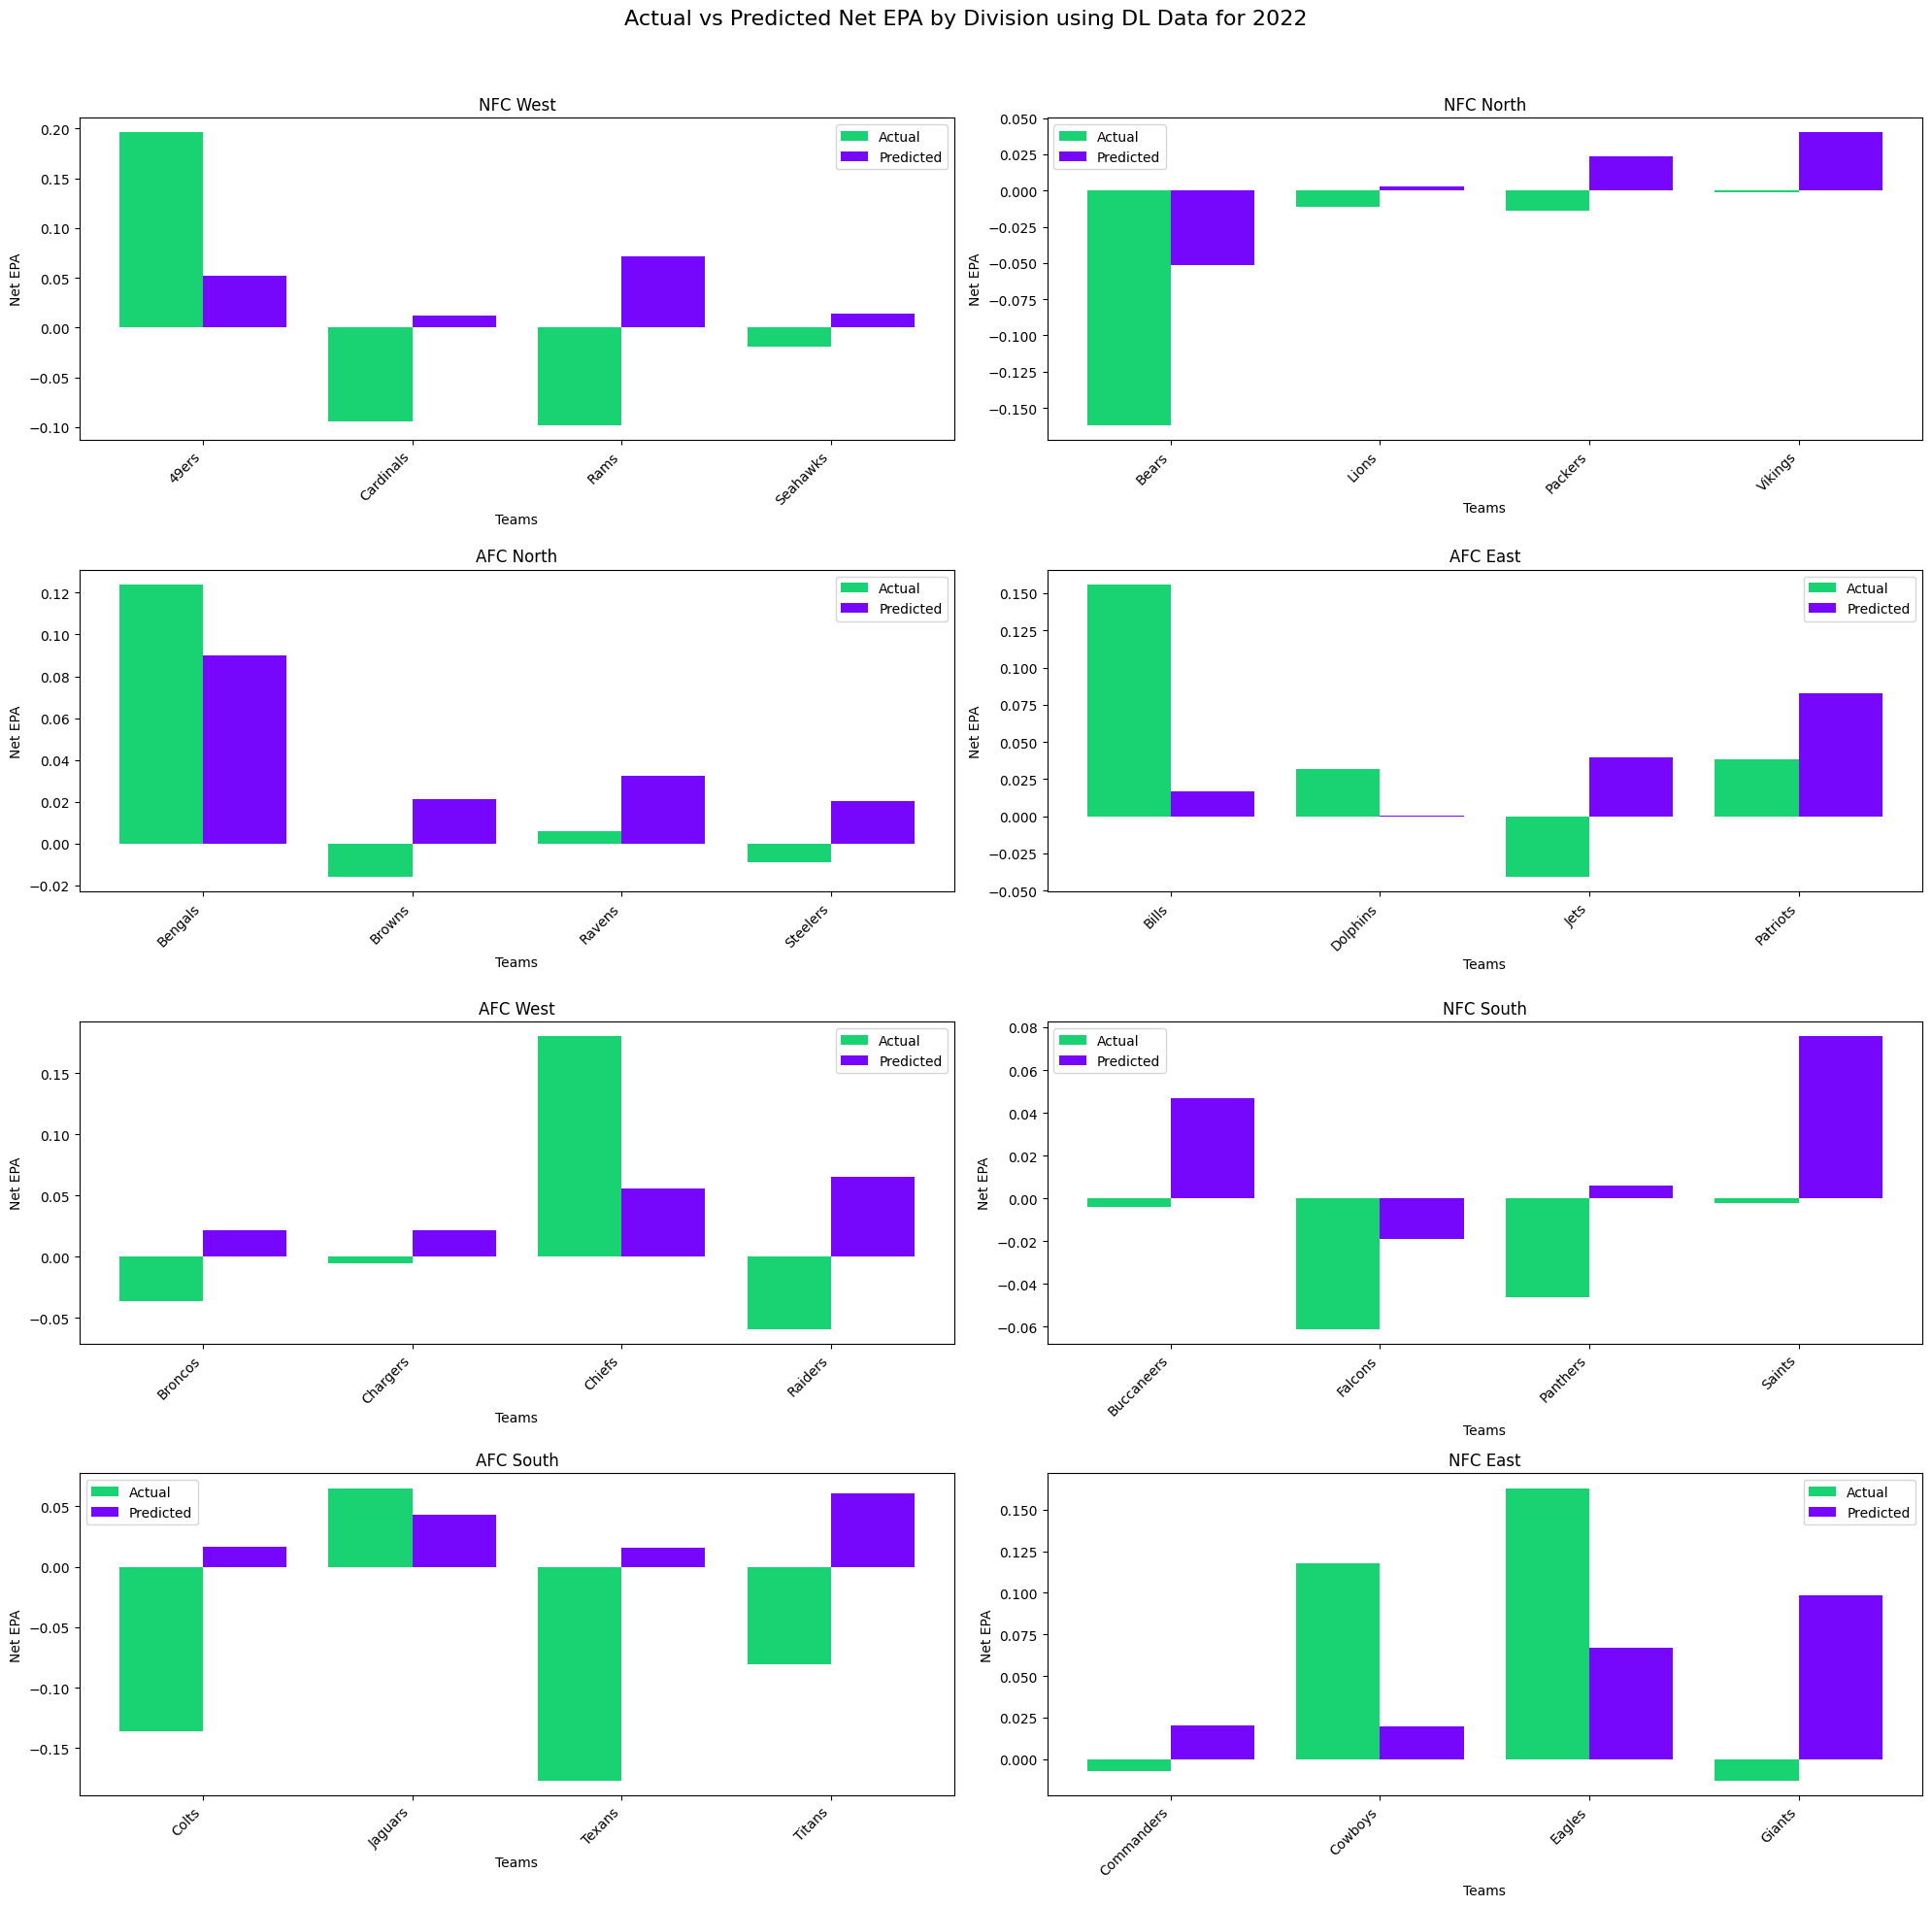

Epoch 1/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0115 - val_loss: 0.0069
Epoch 2/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - val_loss: 0.0049
Epoch 3/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - val_loss: 0.0052
Epoch 4/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - val_loss: 0.0087
Epoch 5/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - val_loss: 0.0122
Epoch 6/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 7/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0064
Epoch 8/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - val_loss: 0.0053
Epoch 9/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 10/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 11/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105 - val_loss: 0.0087
Epoch 12/650
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - val_loss: 0.0086

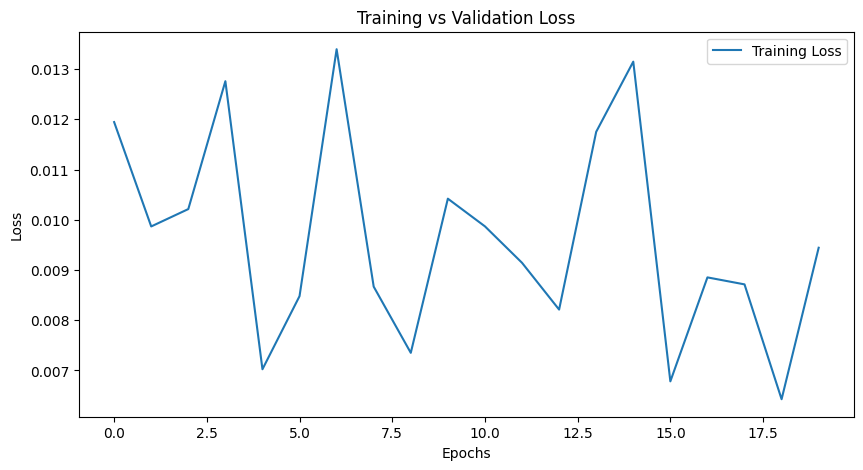

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32
R² Score: 0.1438


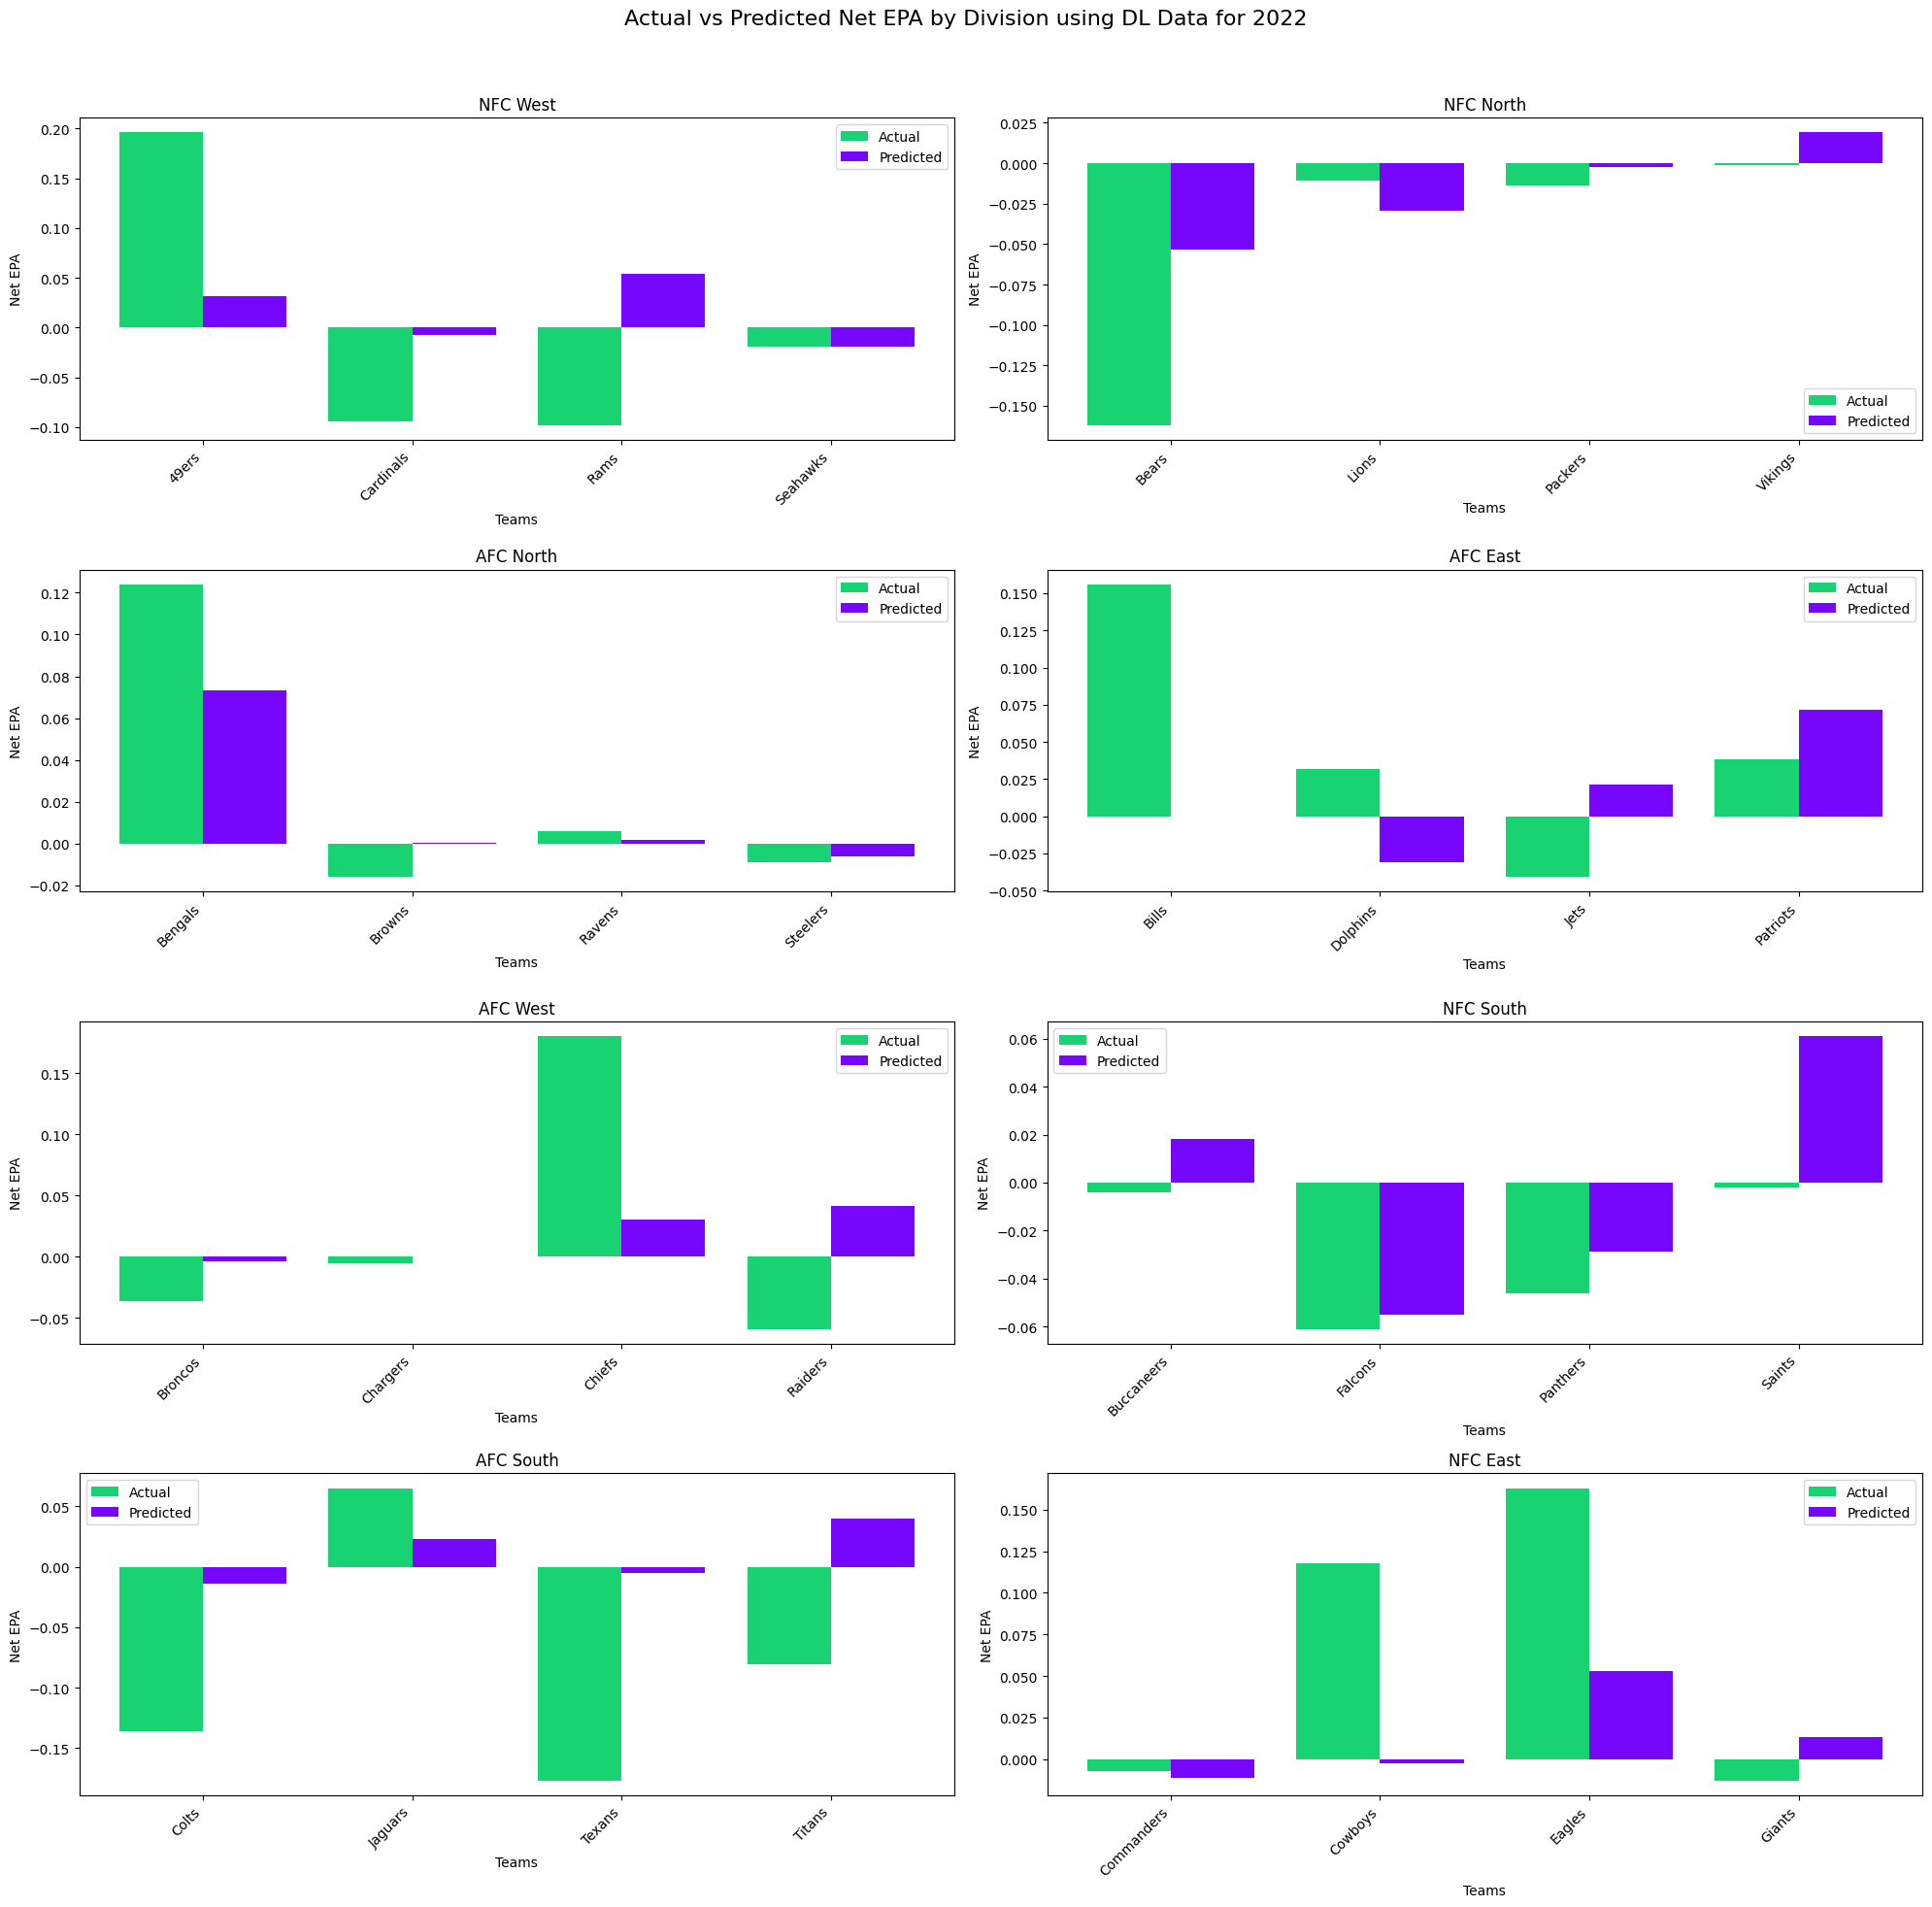

Epoch 1/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0096 - val_loss: 0.0059
Epoch 2/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - val_loss: 0.0103
Epoch 3/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - val_loss: 0.0128
Epoch 4/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - val_loss: 0.0093
Epoch 5/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - val_loss: 0.0091
Epoch 6/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 7/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0061
Epoch 8/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 9/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - val_loss: 0.0100
Epoch 10/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 11/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 12/700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.007

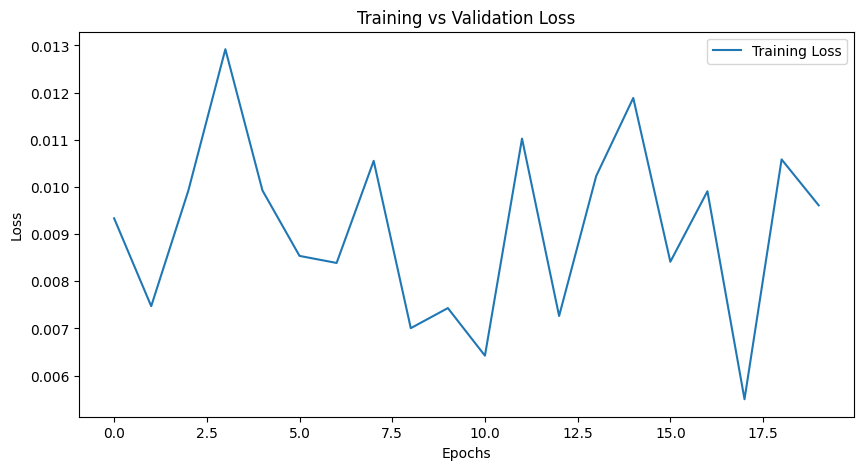

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: 0.1484


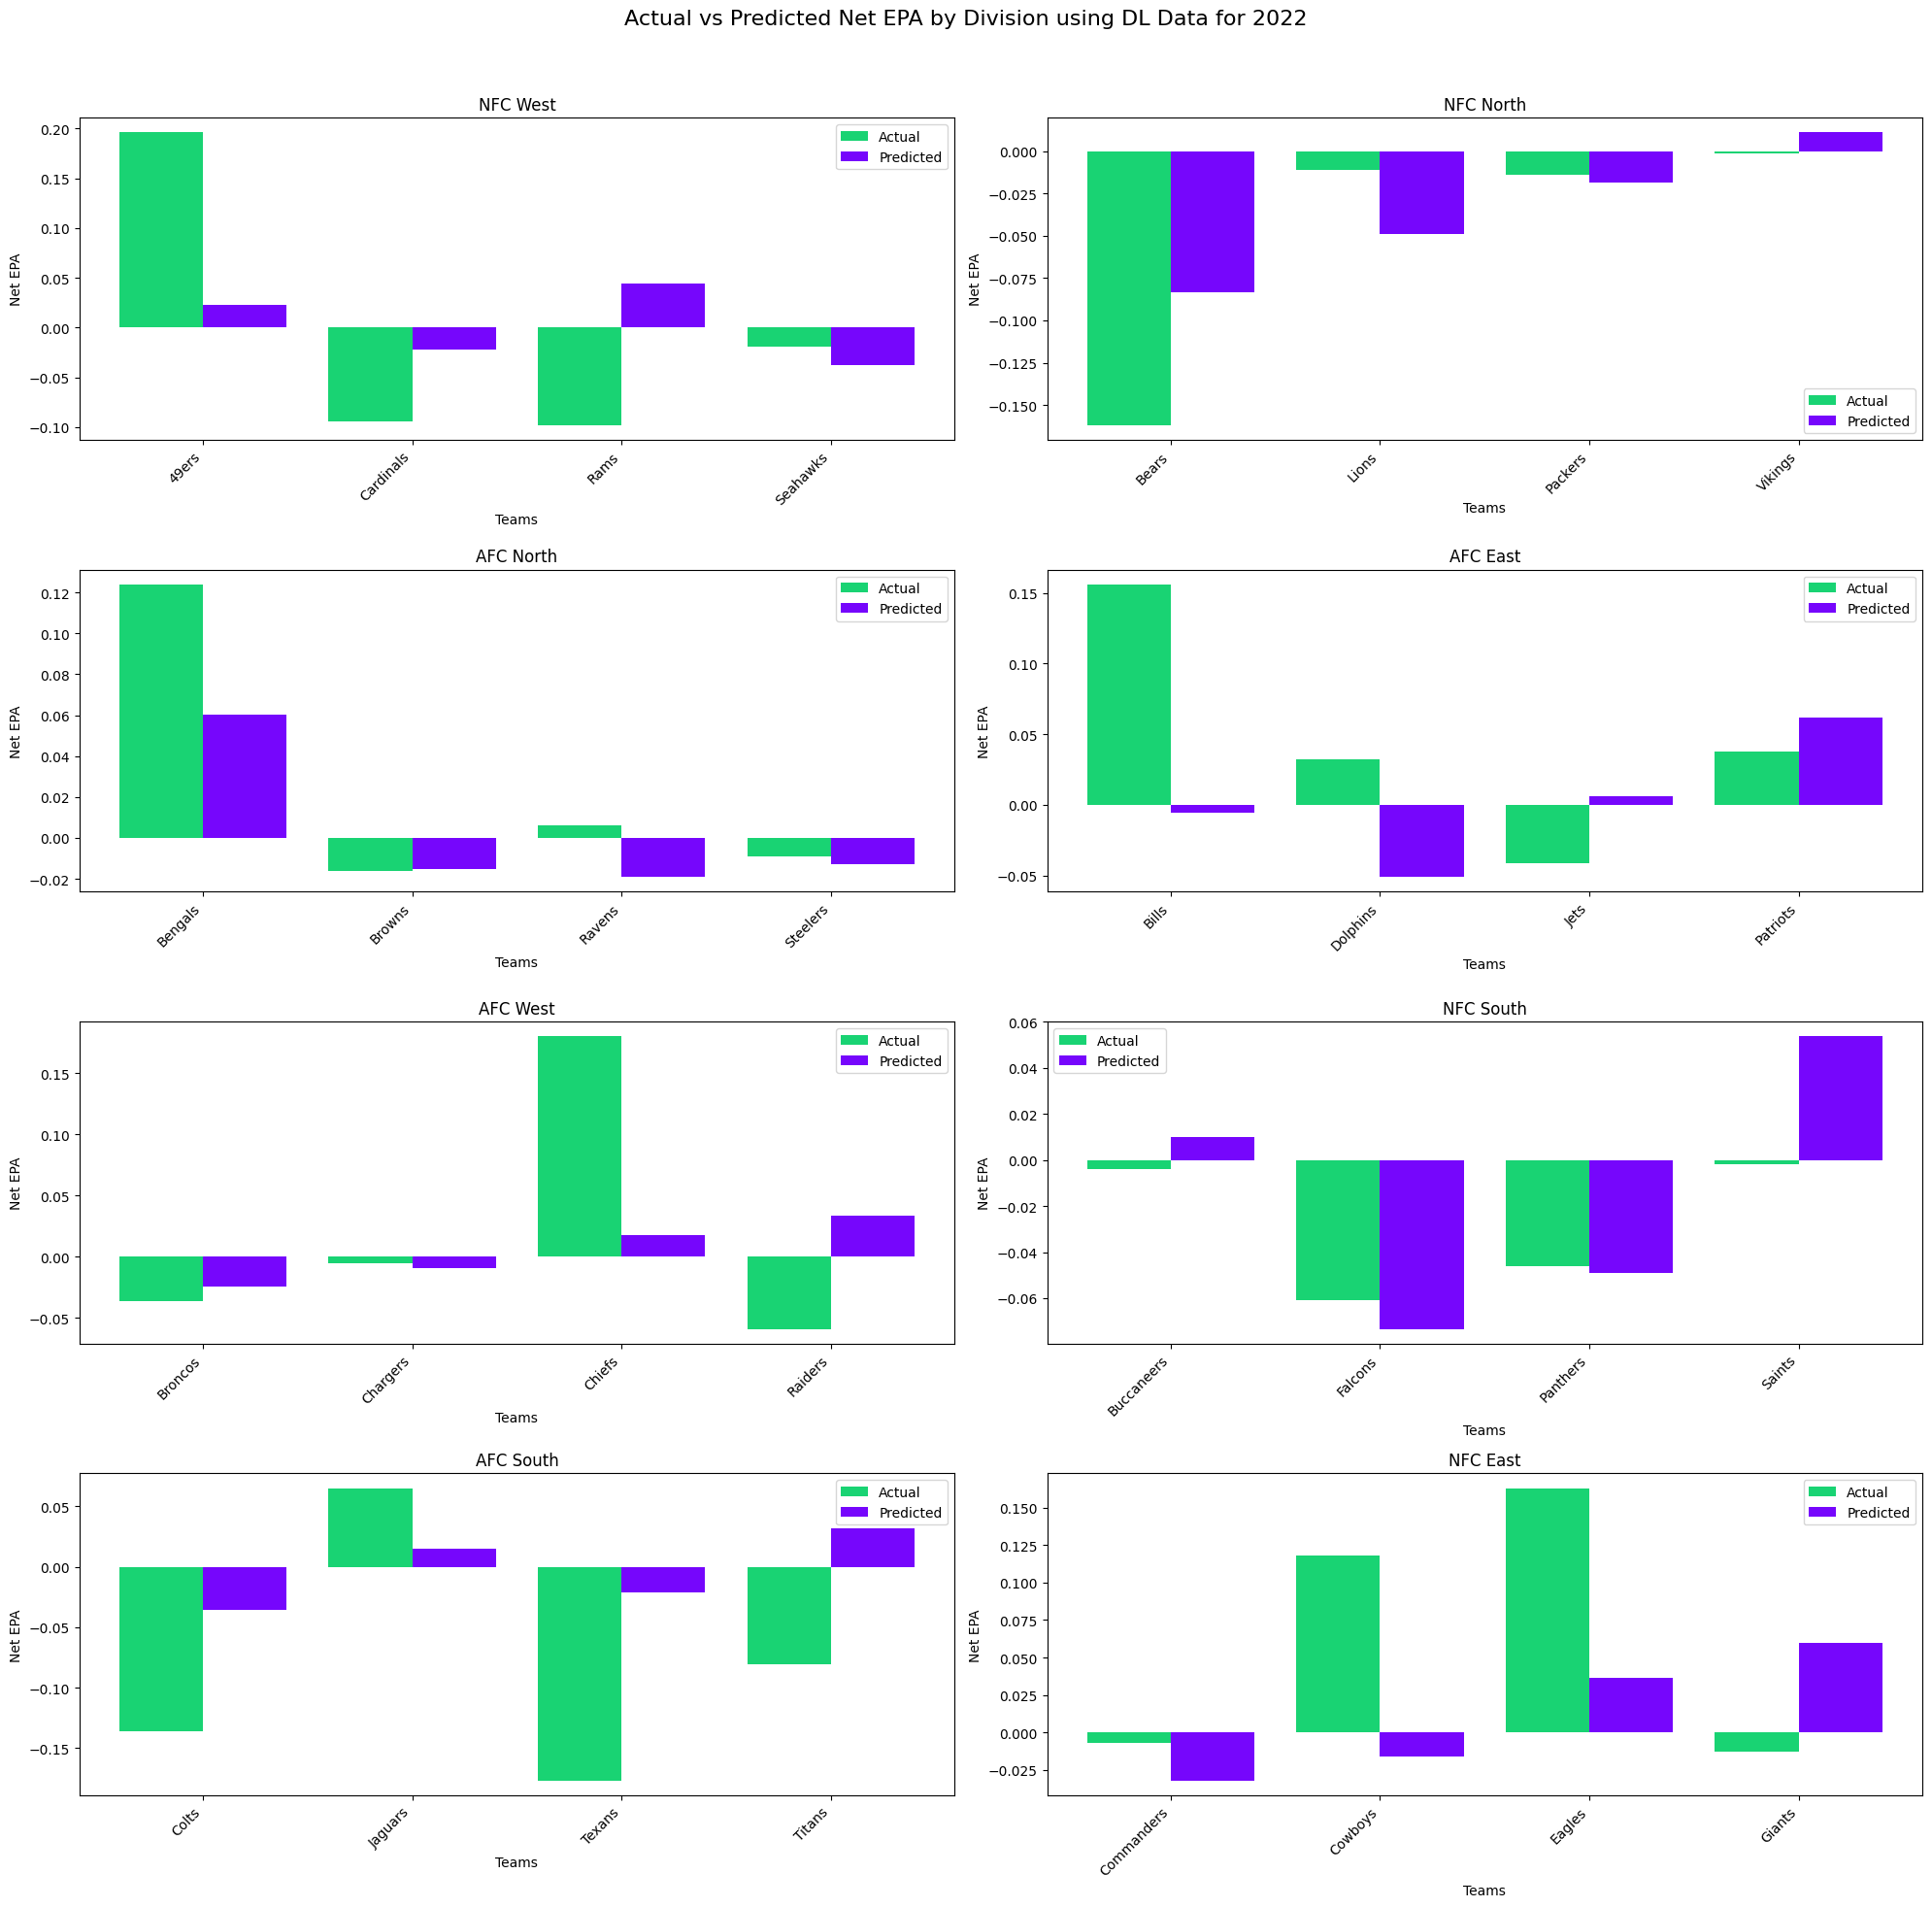

Epoch 1/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - val_loss: 0.0050
Epoch 2/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - val_loss: 0.0062
Epoch 3/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_loss: 0.0105
Epoch 4/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0079
Epoch 5/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0049
Epoch 6/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0040
Epoch 7/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.0057
Epoch 8/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 9/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0100 - val_loss: 0.0120
Epoch 10/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0111
Epoch 11/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 12/750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - val_loss: 0.0063


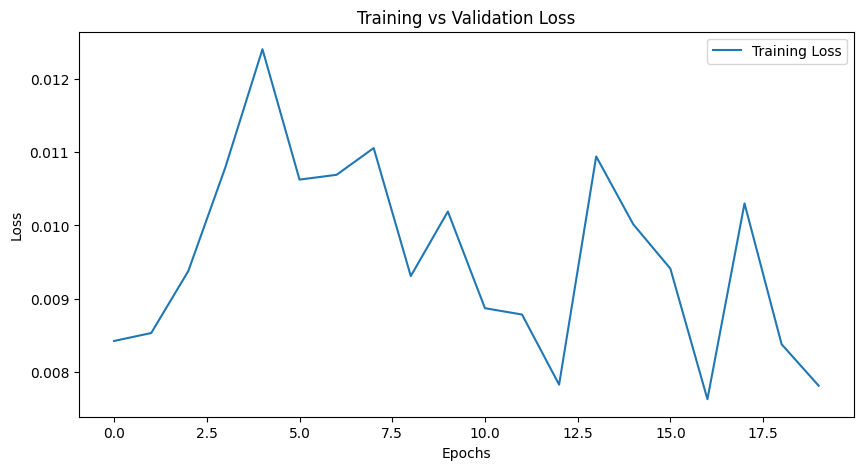

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: 0.0997


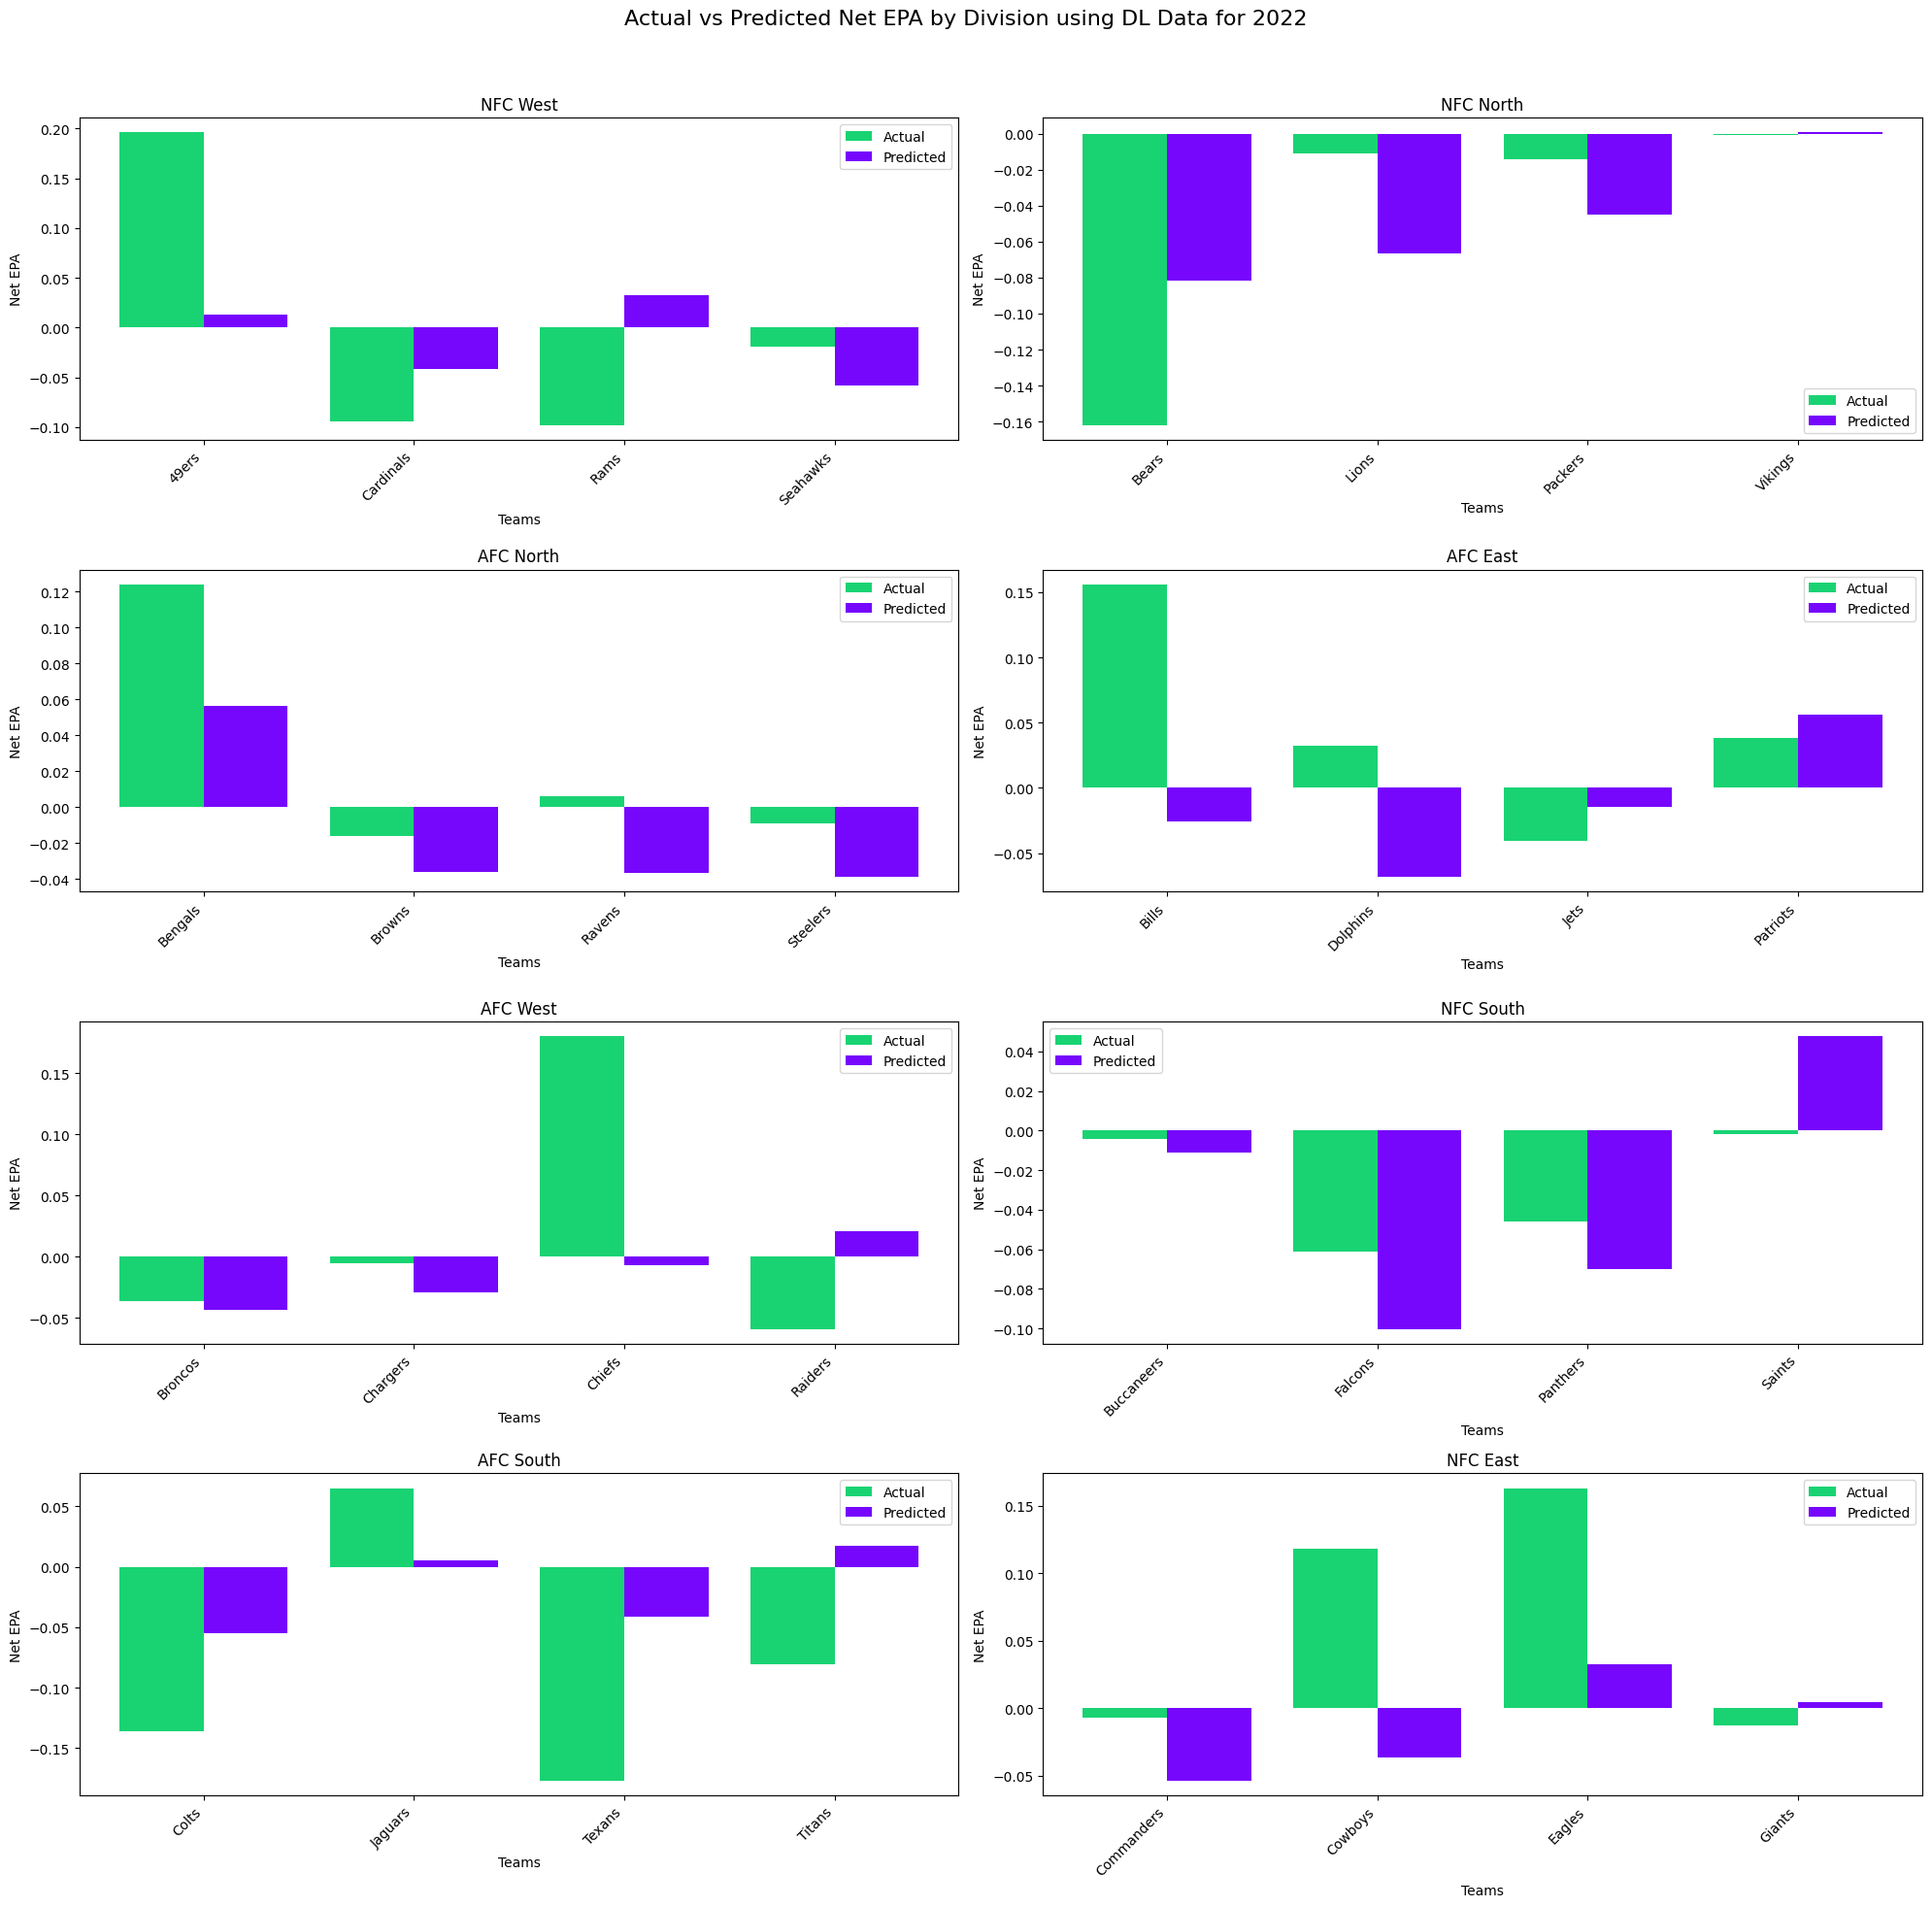

Epoch 1/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068 - val_loss: 0.0101
Epoch 2/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - val_loss: 0.0161
Epoch 3/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - val_loss: 0.0087
Epoch 4/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0048
Epoch 5/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - val_loss: 0.0063
Epoch 6/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - val_loss: 0.0096
Epoch 7/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 8/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - val_loss: 0.0066
Epoch 9/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0055
Epoch 10/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - val_loss: 0.0066
Epoch 11/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0075
Epoch 12/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - val_loss: 0.0077


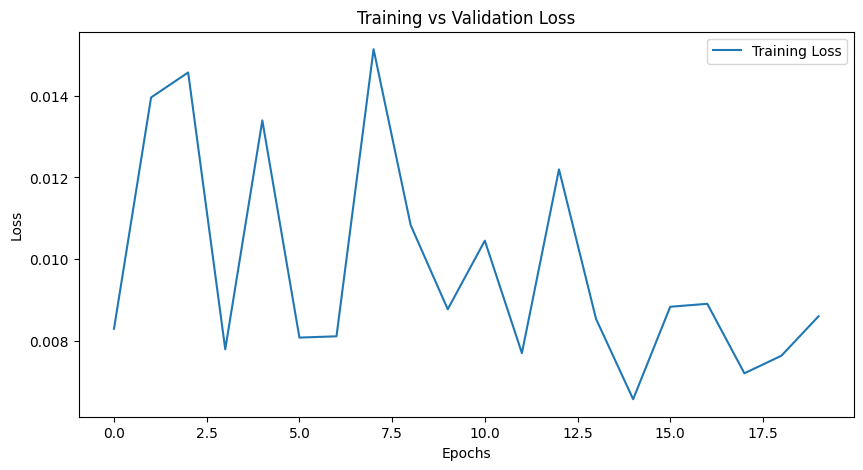

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32
R² Score: -0.0263


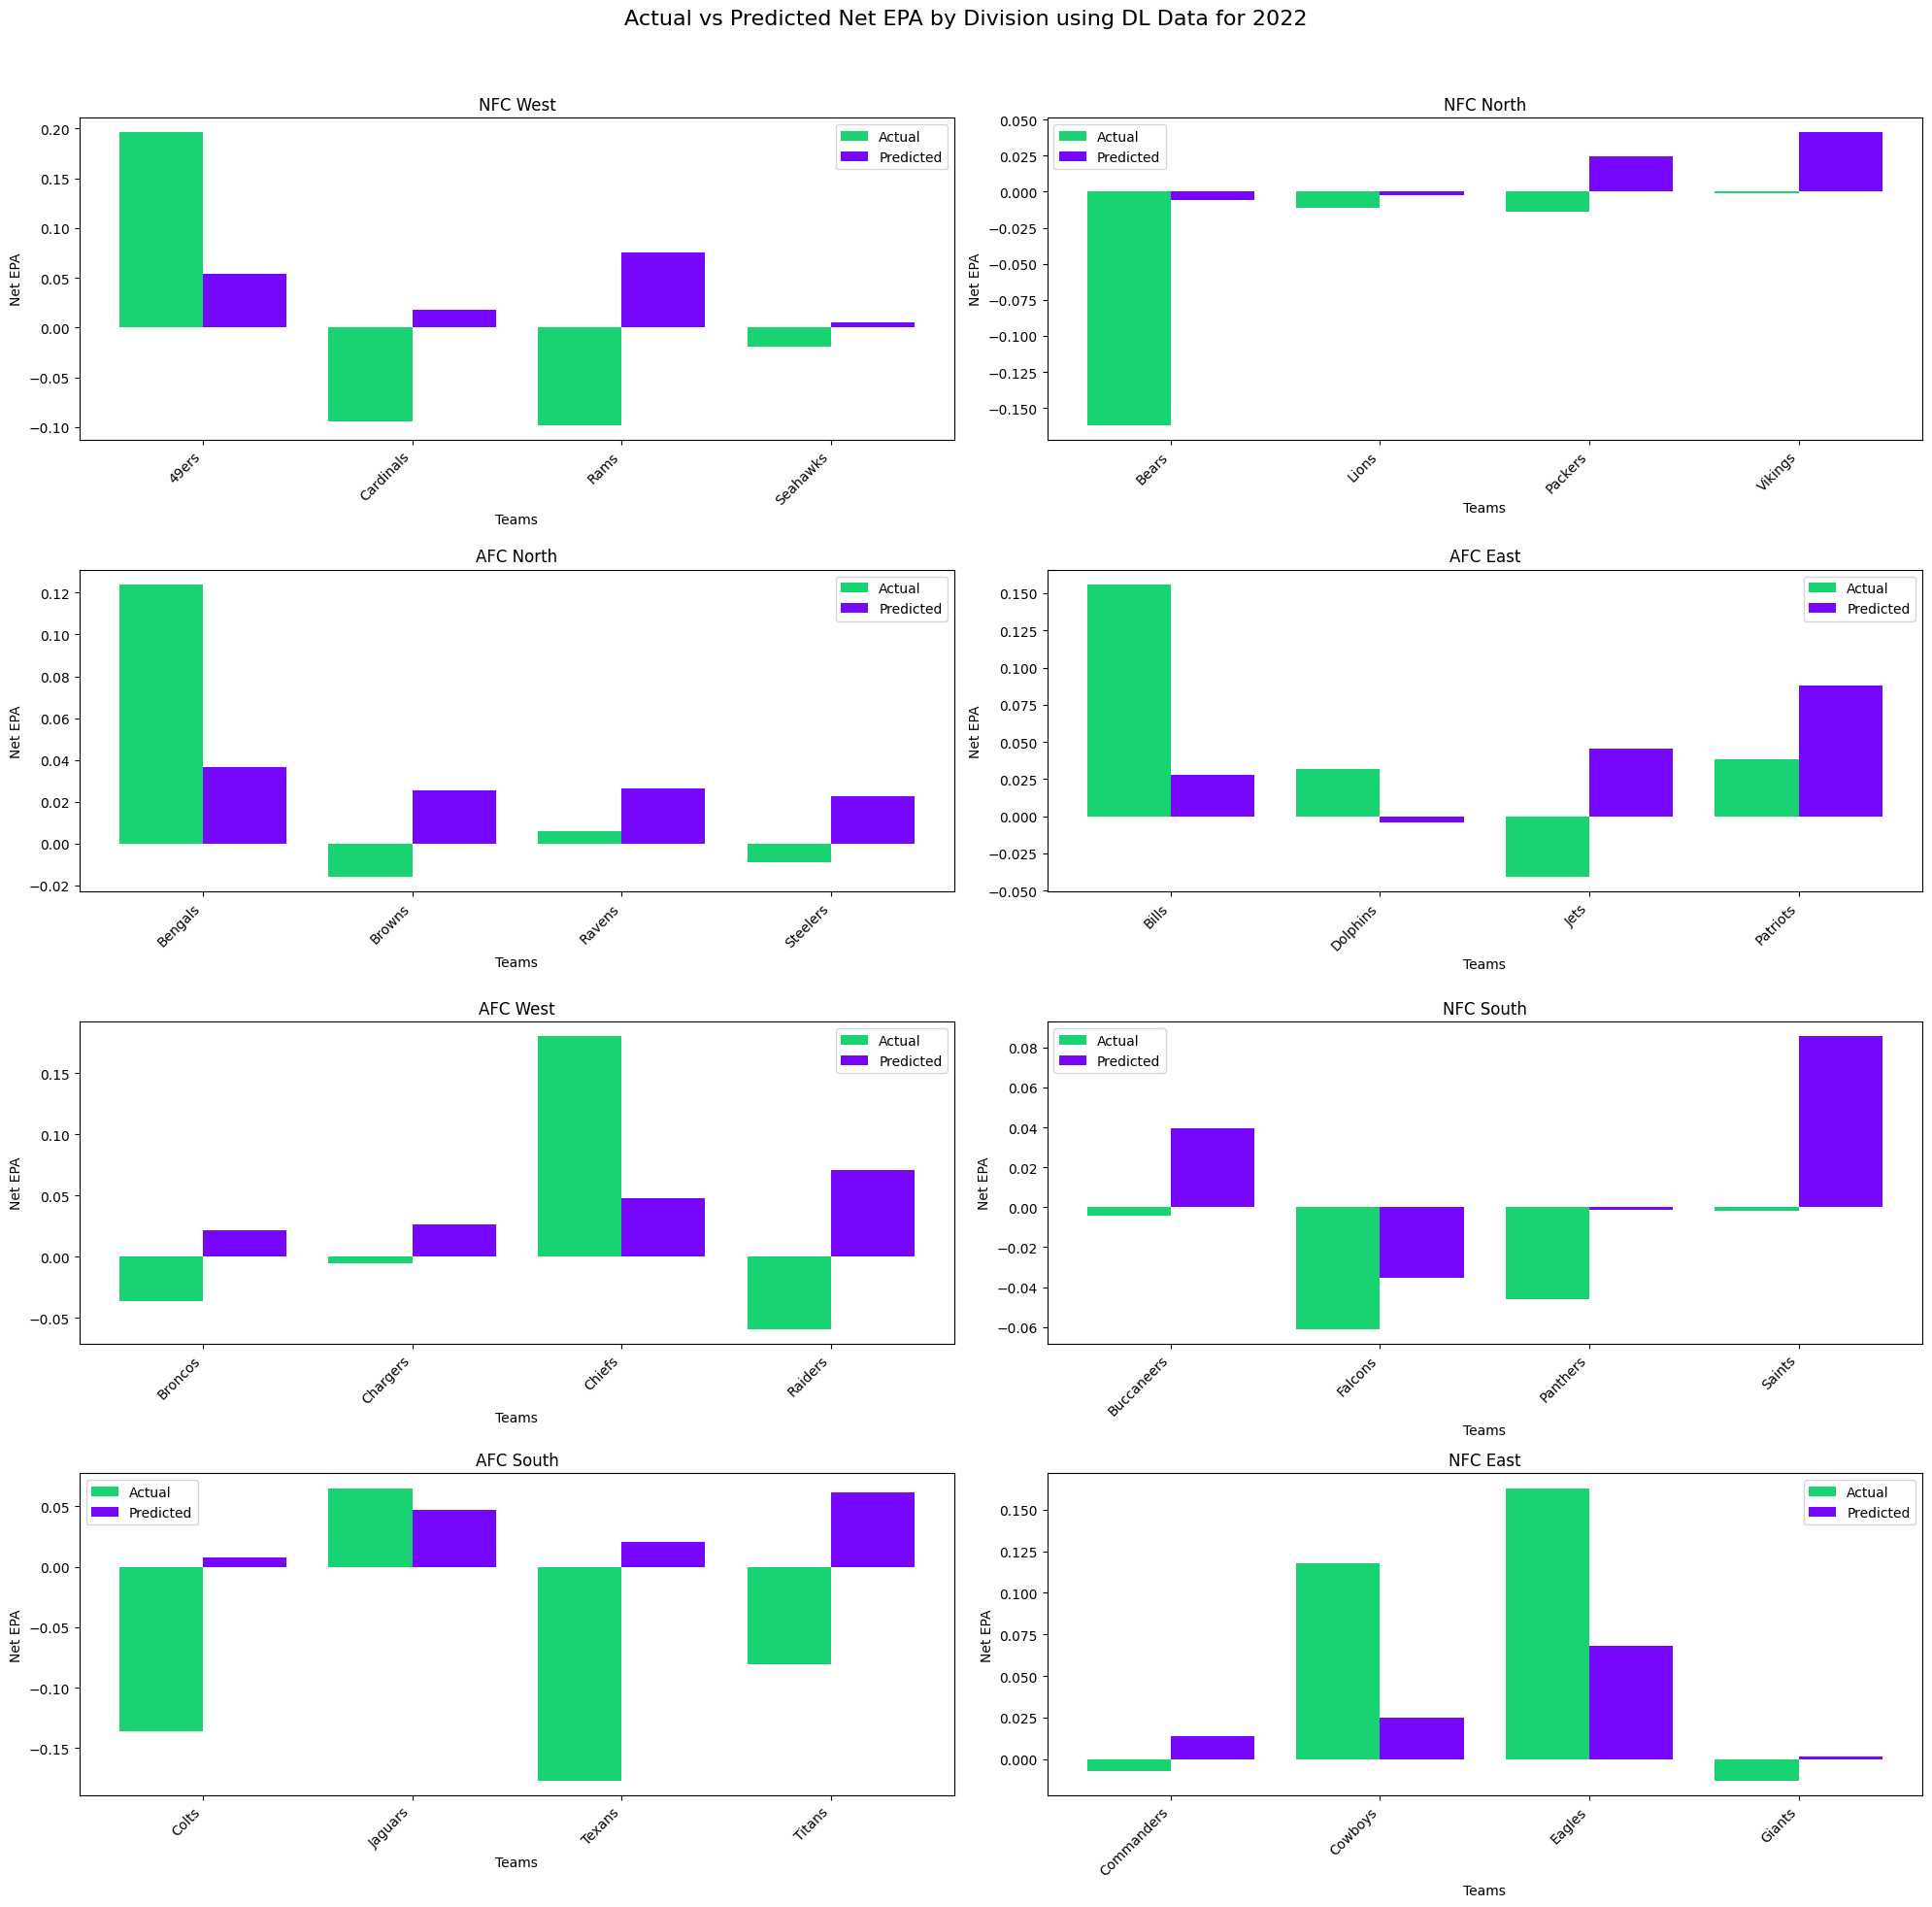

Epoch 1/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0092 - val_loss: 0.0097
Epoch 2/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0163 - val_loss: 0.0076
Epoch 3/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0062
Epoch 4/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - val_loss: 0.0055
Epoch 5/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - val_loss: 0.0054
Epoch 6/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - val_loss: 0.0059
Epoch 7/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - val_loss: 0.0071
Epoch 8/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - val_loss: 0.0088
Epoch 9/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 10/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 11/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0084 - val_loss: 0.0063
Epoch 12/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_loss: 0.0

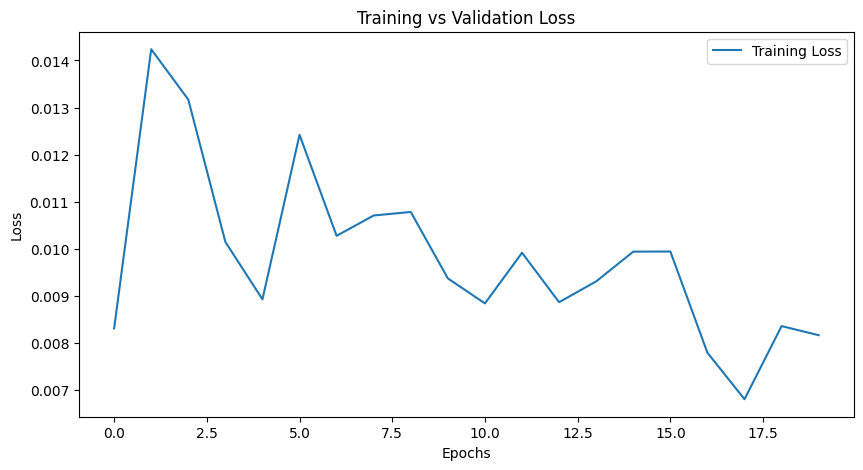

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: 0.0699


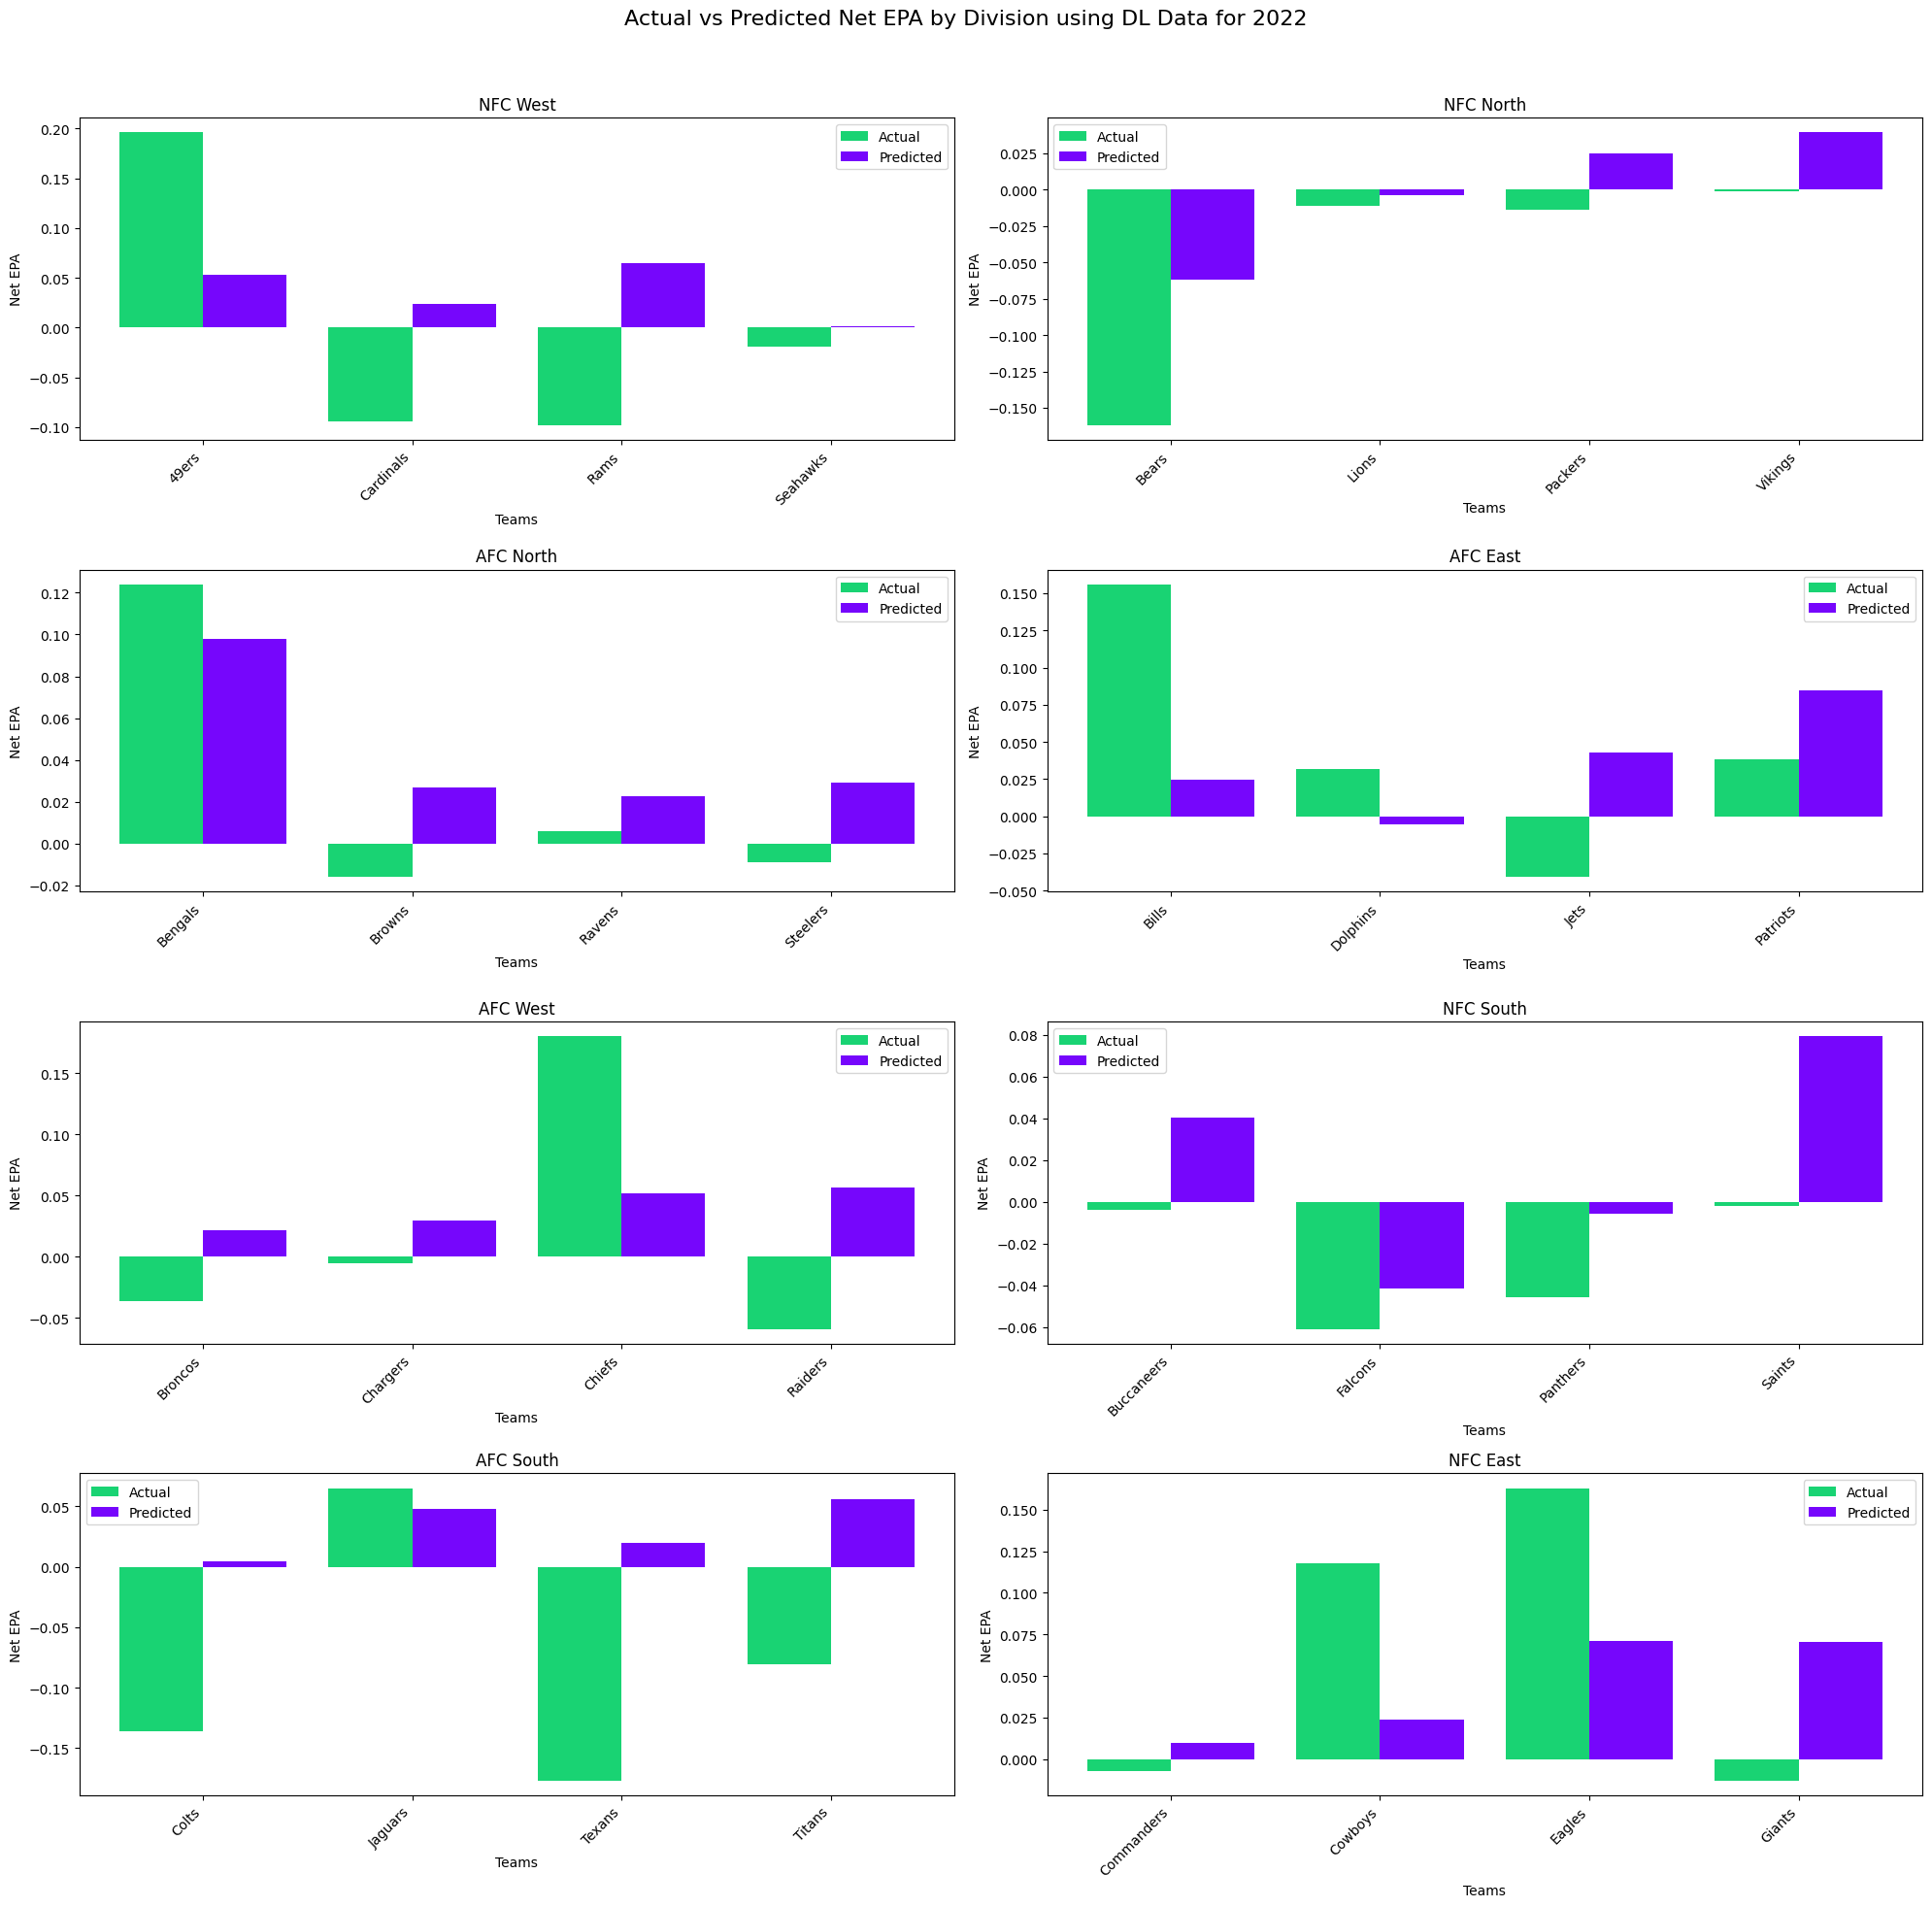

Epoch 1/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0095 - val_loss: 0.0099
Epoch 2/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0077
Epoch 3/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - val_loss: 0.0056
Epoch 4/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - val_loss: 0.0047
Epoch 5/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0094 - val_loss: 0.0067
Epoch 6/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - val_loss: 0.0099
Epoch 7/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114 - val_loss: 0.0097
Epoch 8/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - val_loss: 0.0068
Epoch 9/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0055
Epoch 10/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - val_loss: 0.0052
Epoch 11/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - val_loss: 0.0058
Epoch 12/900
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - val_loss: 0.

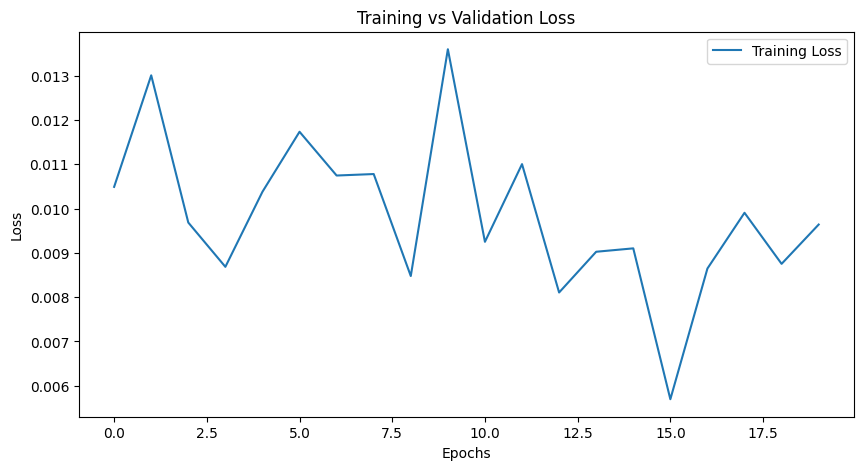

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: 0.0256


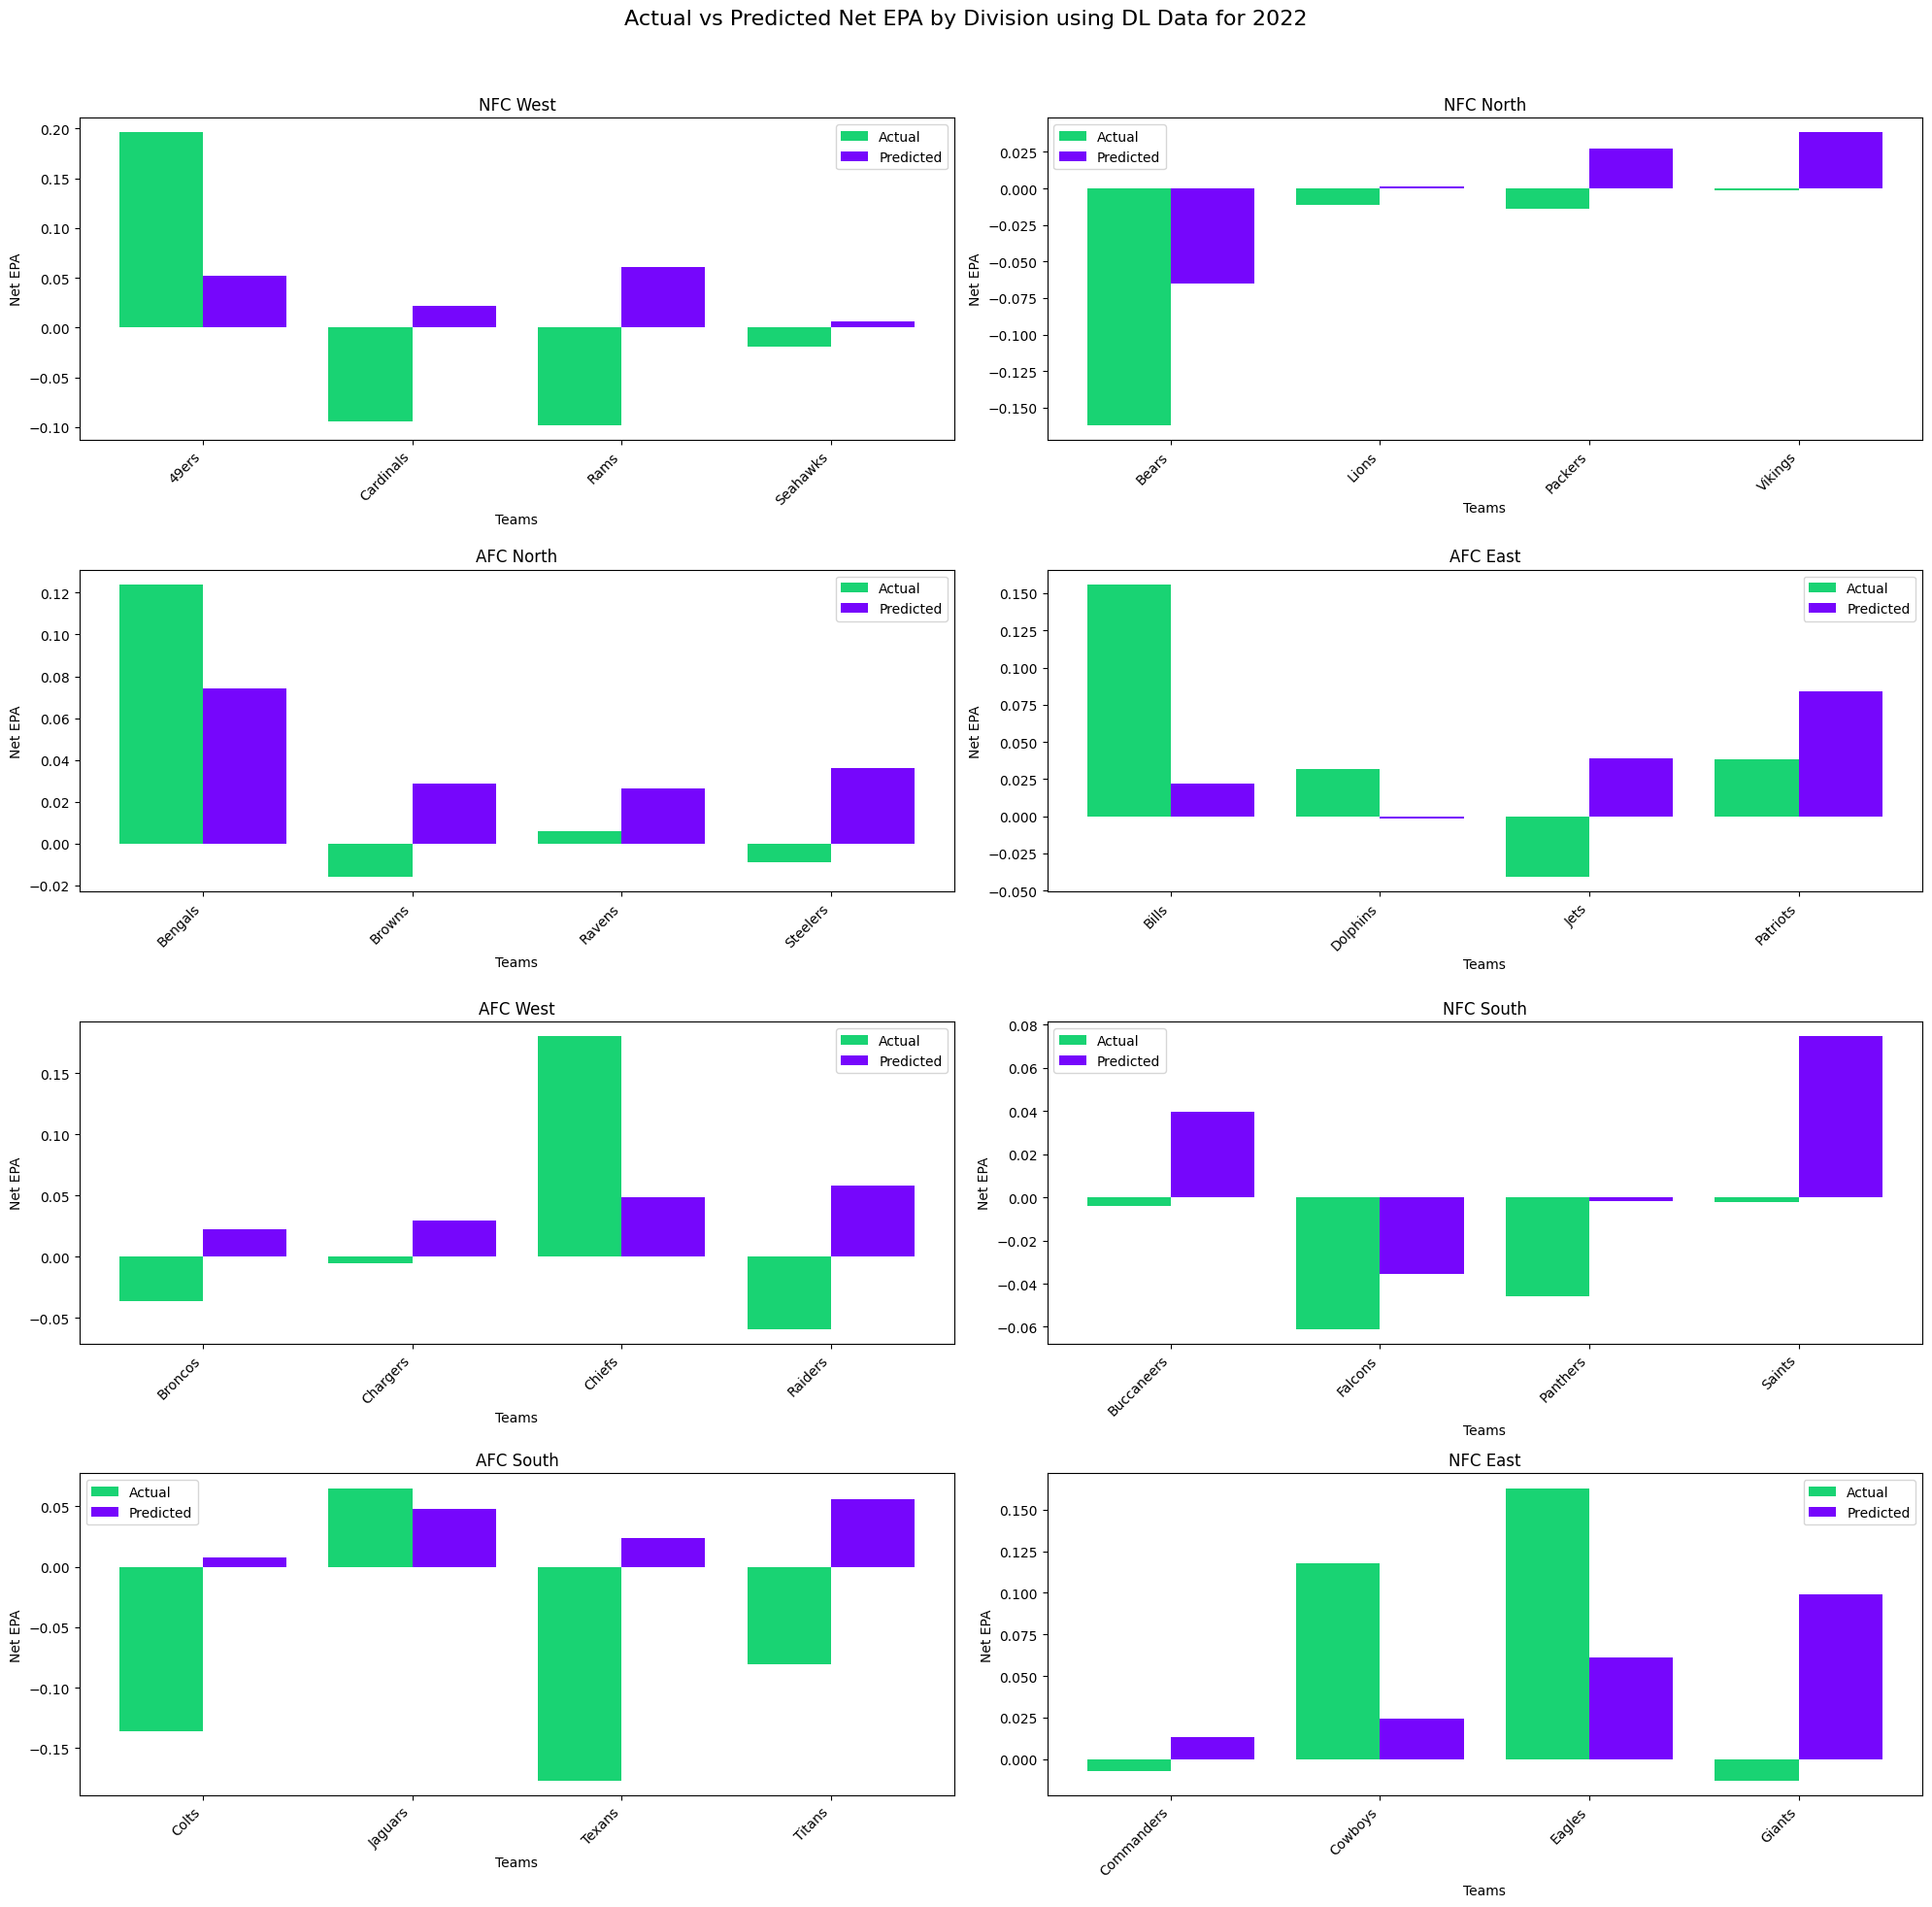

Epoch 1/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0071 - val_loss: 0.0060
Epoch 2/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0103 - val_loss: 0.0068
Epoch 3/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - val_loss: 0.0091
Epoch 4/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - val_loss: 0.0069
Epoch 5/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - val_loss: 0.0062
Epoch 6/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0097 - val_loss: 0.0071
Epoch 7/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 8/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 9/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 10/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - val_loss: 0.0053
Epoch 11/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089 - val_loss: 0.0073
Epoch 12/950
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078 - val_loss: 0.

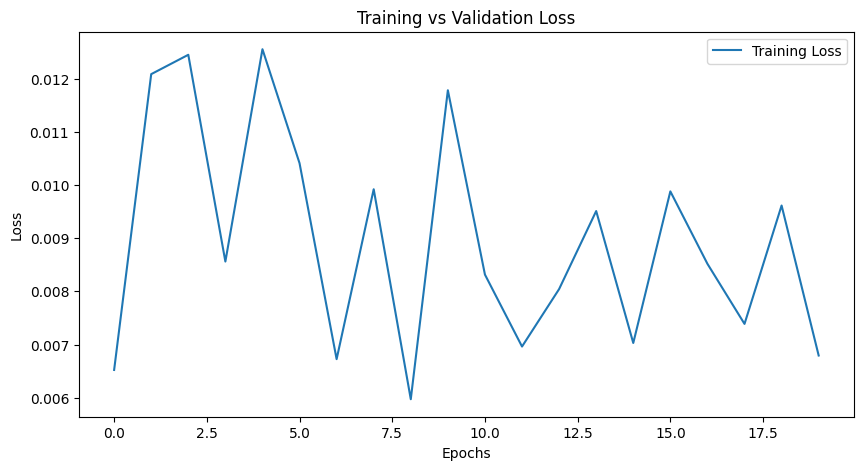

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: 0.1357


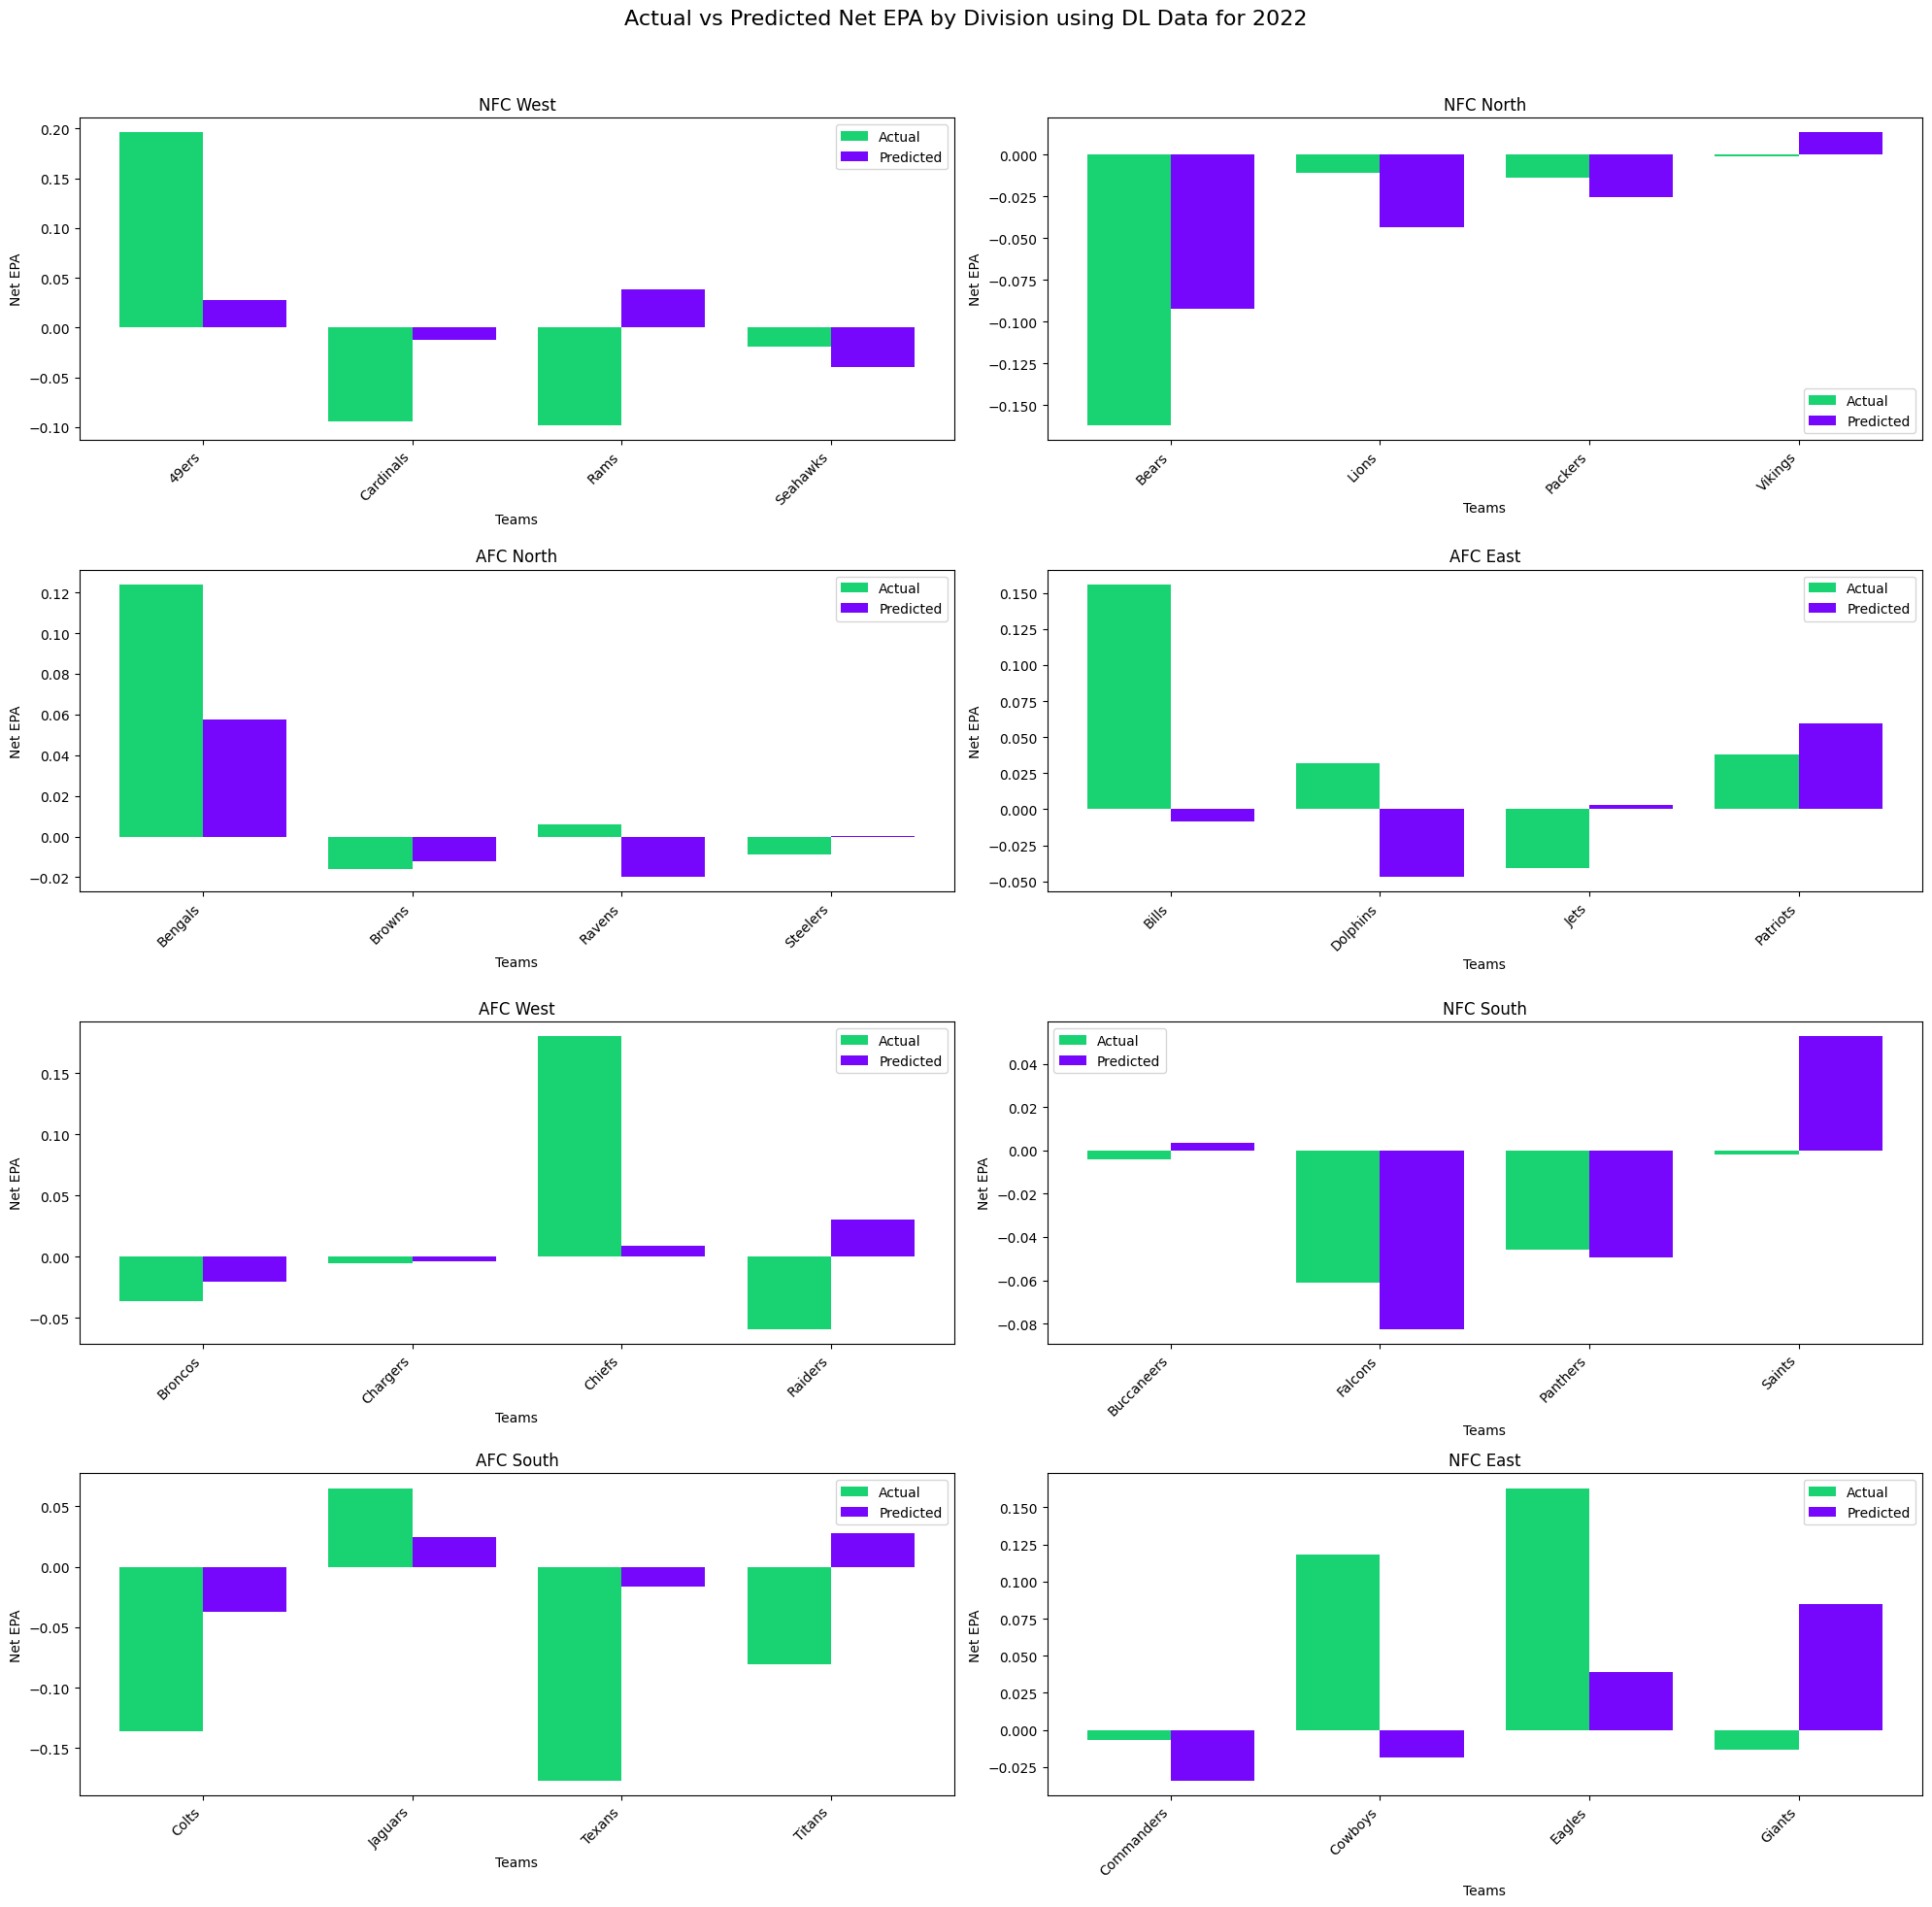

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0095 - val_loss: 0.0067
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - val_loss: 0.0057
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_loss: 0.0049
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - val_loss: 0.0052
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - val_loss: 0.0067
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087 - 

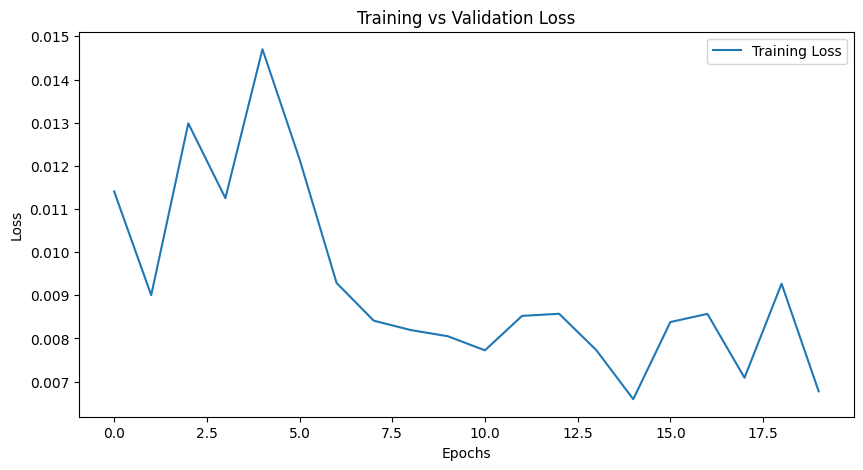

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32
R² Score: 0.1387


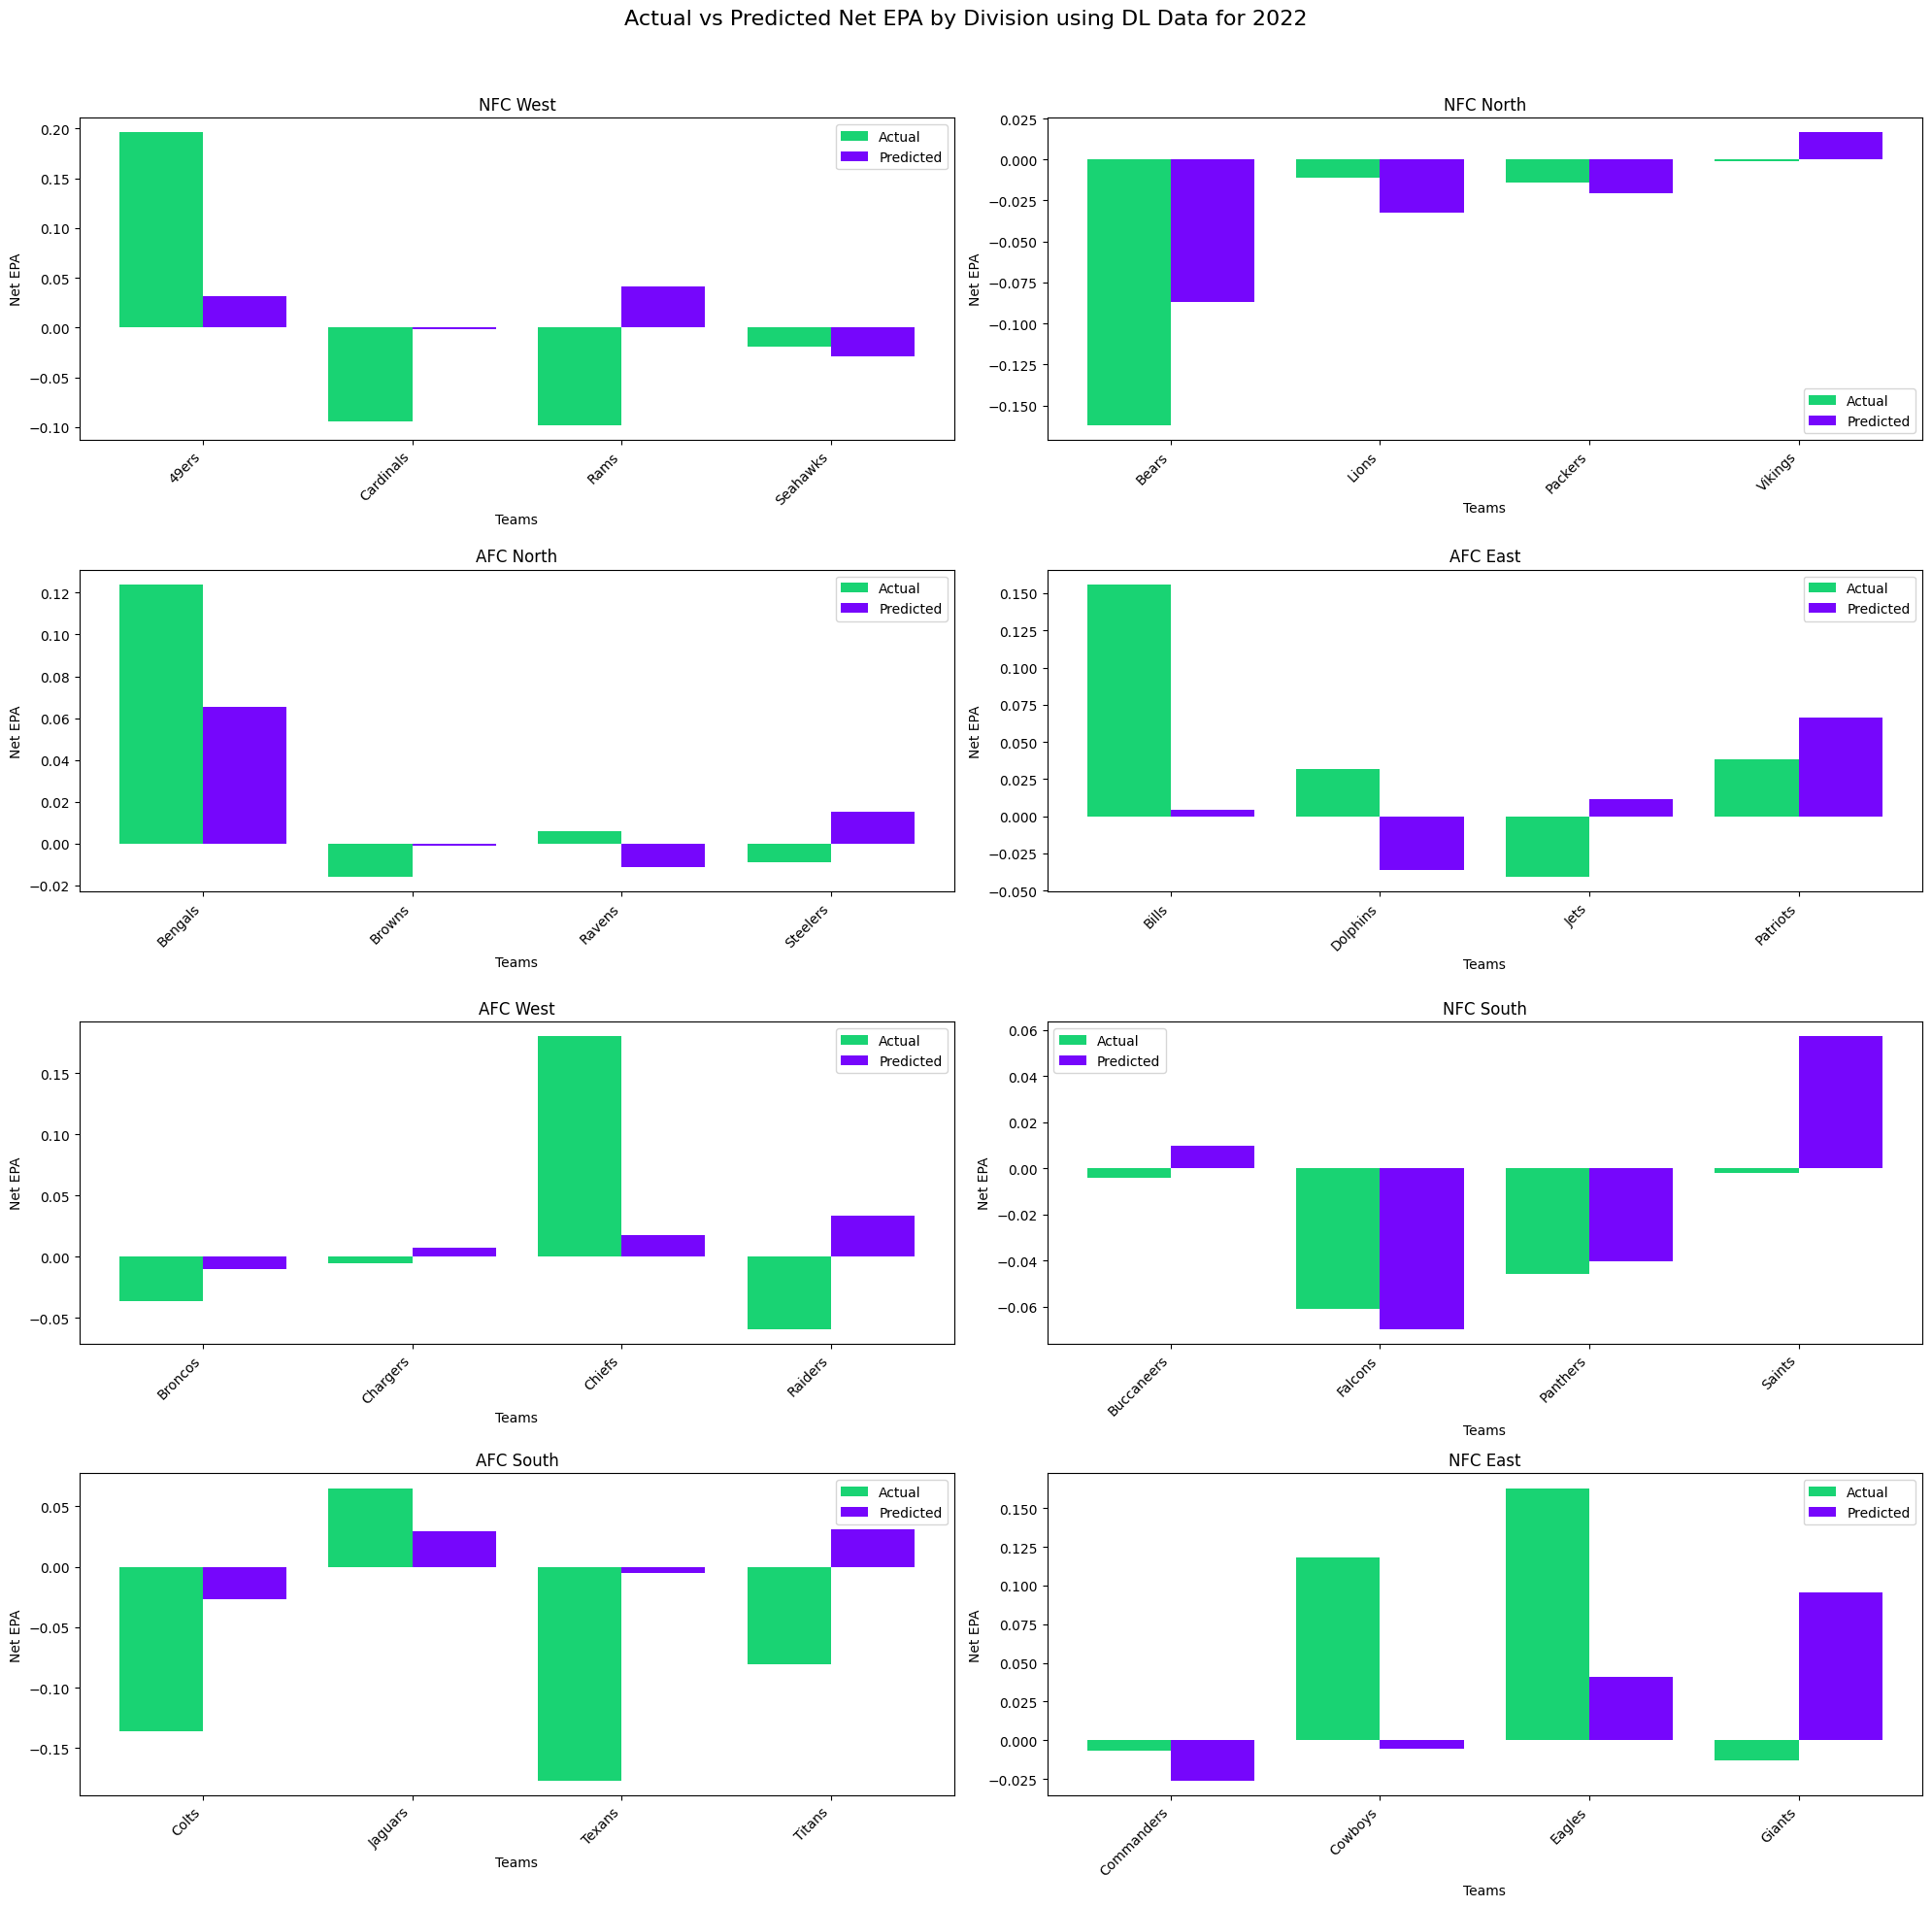

In [57]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=16, validation_split=0.2, callbacks=[early_stopping])
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    print(len(y_pred))
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = df[df['Year'] == 2022].copy()
    data['Predicted_Net_EPA'] = y_pred
    data['Model Actual Net EPA'] = y
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Net EPA by Division using DL Data for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Net EPA')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()